CD1_(/km^2)	0.335-0.999 mm

CD2_(/km^2)	1.00-4.75 mm

CD3_(/km^2)	4.75-200 mm

CD4_(/km^2) >200 mm

WD1_(g/km^2) 0.335-0.999 mm

WD2_(g/km^2) 1.00-4.75 mm

WD3_(g/km^2) 4.75-200 mm
		
WD4_(g/km^2) >200 mm			

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 2007-09-16 to 2013-12-10
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Count_Density_Class3Plastic  308 non-null    float64       
 1   Date                         308 non-null    datetime64[ns]
 2   Moving_Average_9             300 non-null    float64       
 3   Moving_Av

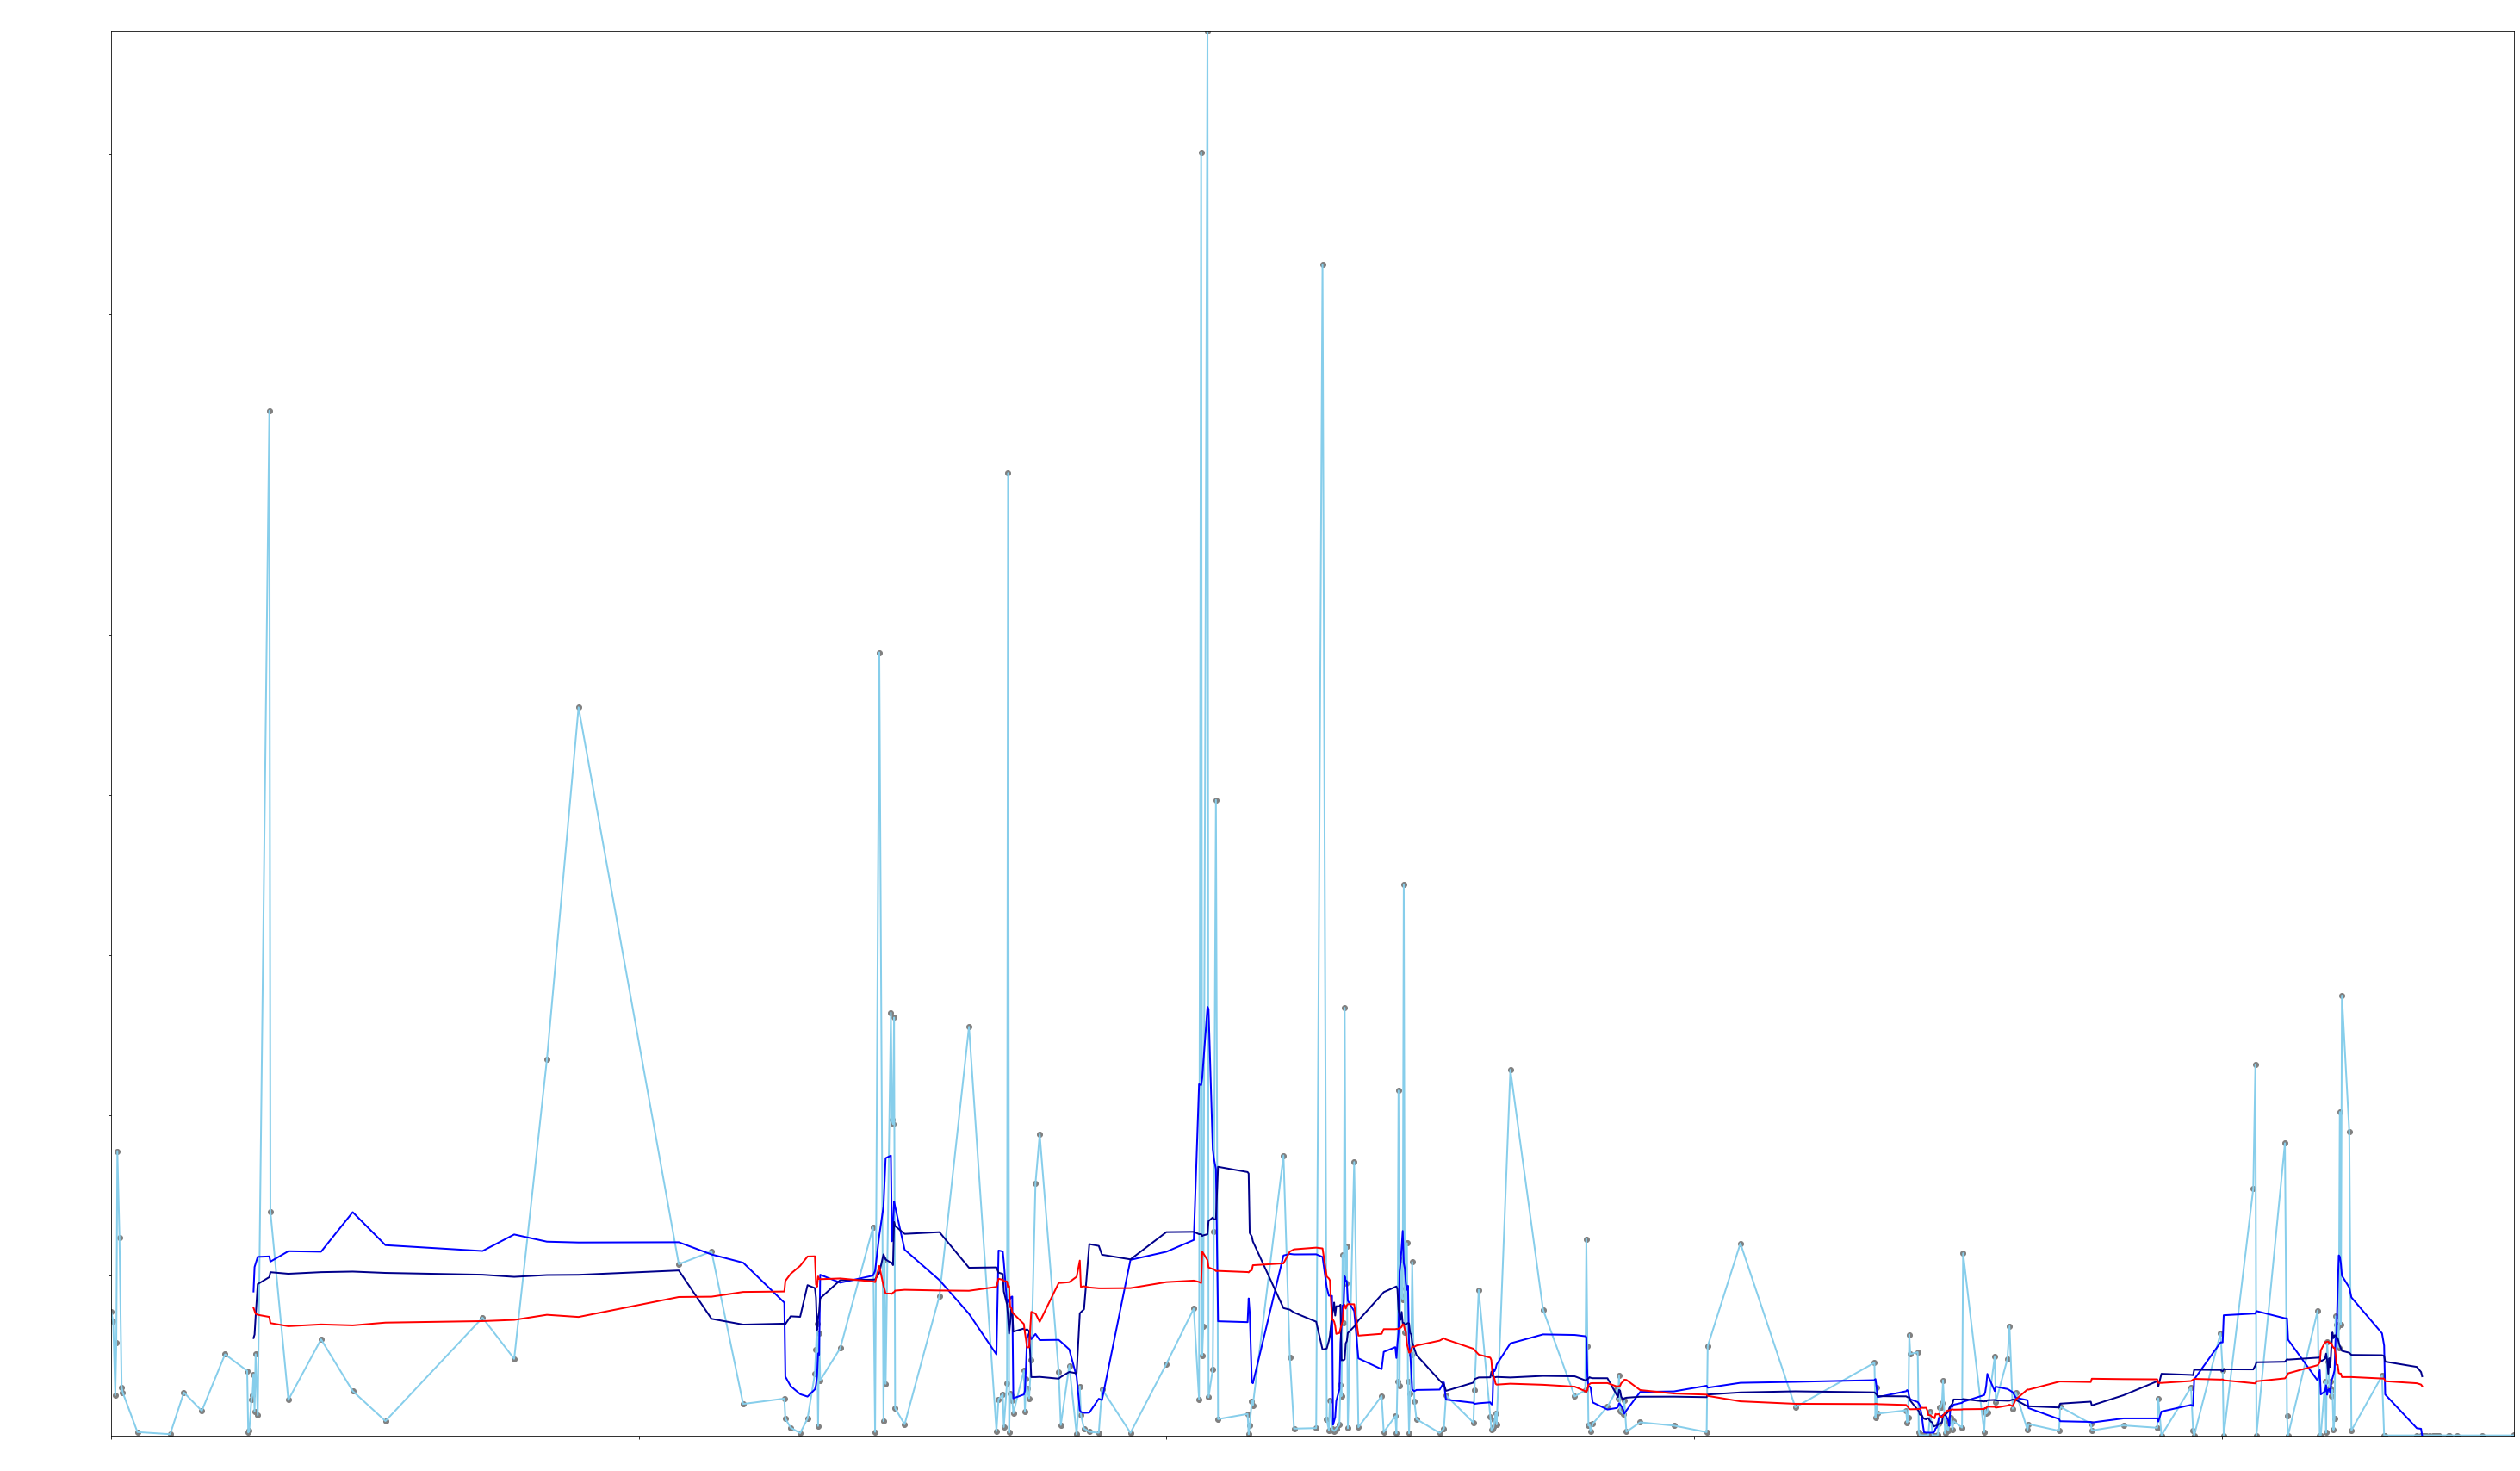

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 2007-09-16 to 2013-12-10
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Count_Density_Class3Plastic  308 non-null    float64       
 1   Date                         308 non-null    datetime64[ns]
 2   Moving_Average_9             300 non-null    float64       
 3   Moving_Average_21            288 non-null    float64       
 4   Moving_Average_36            273 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 2007-09-16 to 2013-12-10
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       -------

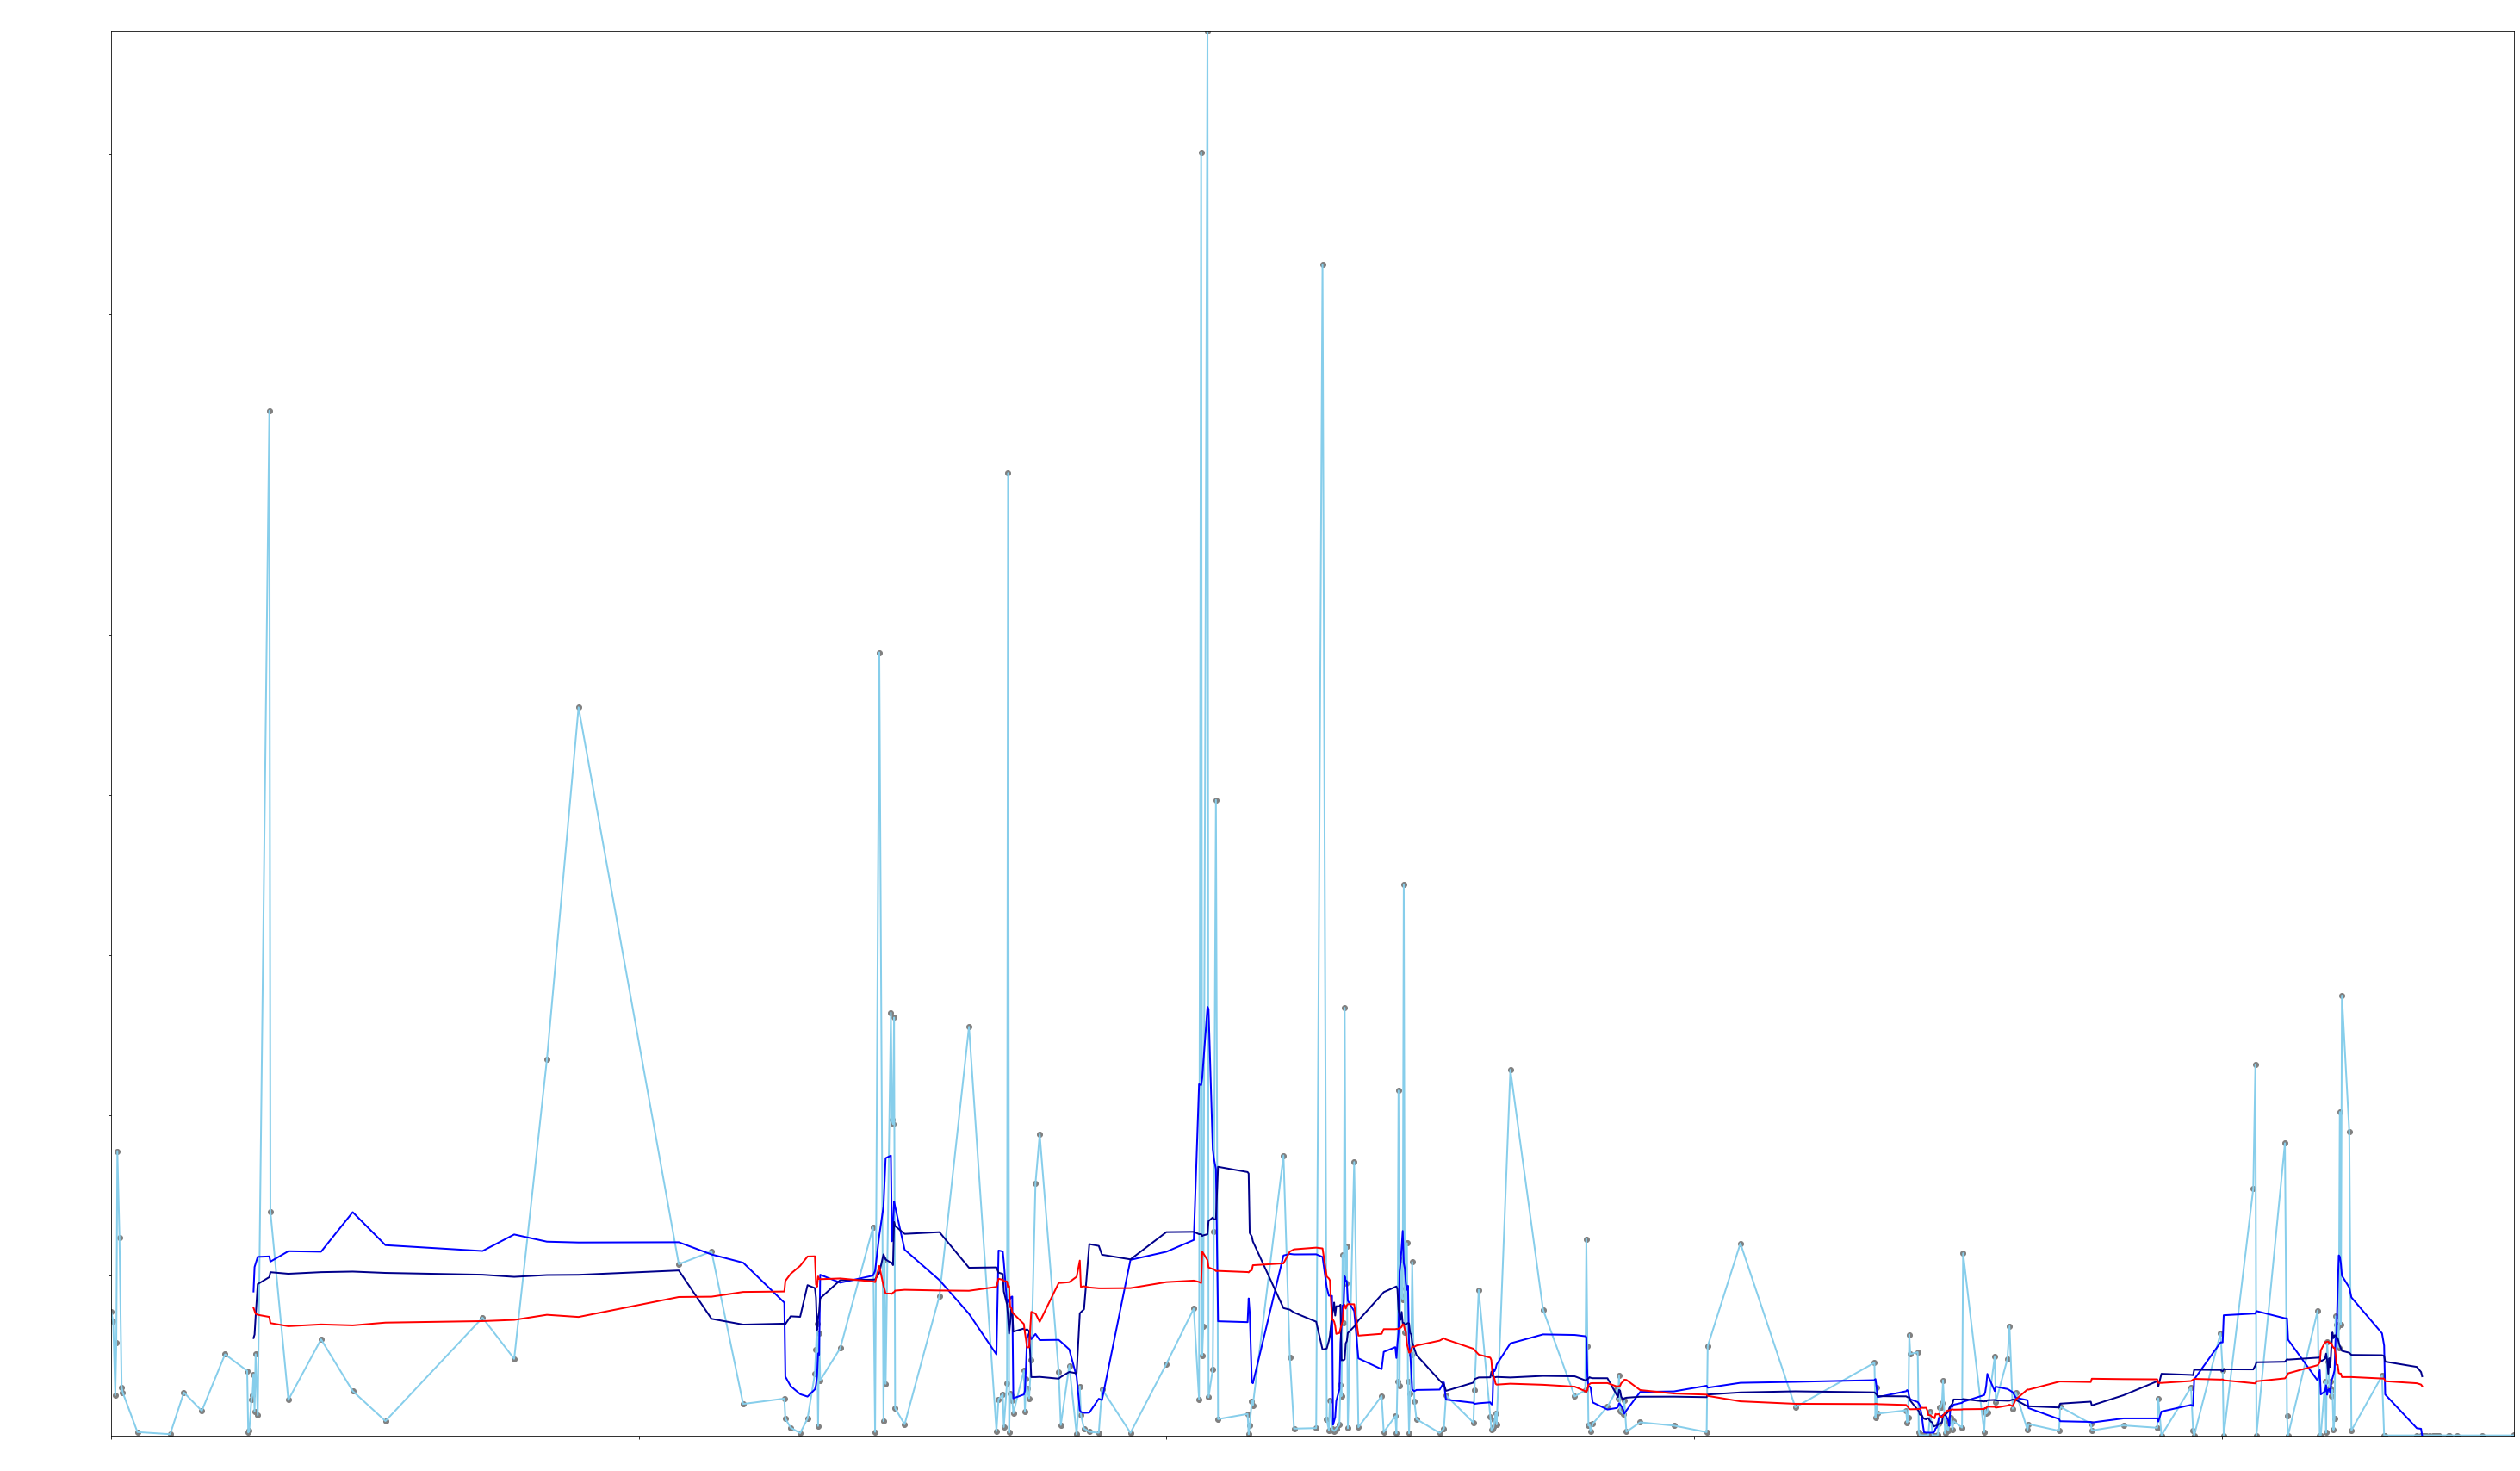

In [0]:
import pandas as pd

from google.colab import drive

drive.mount('/content/gdrive/')
pollution_data = pd.read_csv('/content/gdrive/My Drive/AI_NoteBook/PROJECT/Import_File/PlasticMarinePollutionDataset.csv')

########## [PREPROCESSING] ##########
pollution_data.rename(columns = {'CD1_(/km^2)' : 'Count_Density_Class1Plastic'}, inplace = True)
pollution_data.rename(columns = {'CD2_(/km^2)' : 'Count_Density_Class2Plastic'}, inplace = True)
pollution_data.rename(columns = {'CD3_(/km^2)' : 'Count_Density_Class3Plastic'}, inplace = True)
pollution_data.rename(columns = {'CD4 _(/km^2)' : 'Count_Density_Class4Plastic'}, inplace = True)

pollution_data.rename(columns = {'WD1_(g/km^2)' : 'Weight_Density_Class1Plastic'}, inplace = True)
pollution_data.rename(columns = {'WD2_(g/km^2)' : 'Weight_Density_Class2Plastic'}, inplace = True)
pollution_data.rename(columns = {'WD3_(g/km^2)' : 'Weight_Density_Class3Plastic'}, inplace = True)
pollution_data.rename(columns = {'WD4_(g/km^2)' : 'Weight_Density_Class4Plastic'}, inplace = True)

pollution_data['Count_Density_Class1Plastic'] = pollution_data.Count_Density_Class1Plastic.str.replace(' ', '')
pollution_data['Count_Density_Class2Plastic'] = pollution_data.Count_Density_Class2Plastic.str.replace(' ', '')
pollution_data['Count_Density_Class3Plastic'] = pollution_data.Count_Density_Class3Plastic.str.replace(' ', '')
pollution_data['Weight_Density_Class2Plastic'] = pollution_data.Weight_Density_Class2Plastic.str.replace(' ', '')
pollution_data['Weight_Density_Class3Plastic'] = pollution_data.Weight_Density_Class3Plastic.str.replace(' ', '')
pollution_data['Weight_Density_Class4Plastic'] = pollution_data.Weight_Density_Class4Plastic.str.replace(' ', '')

pollution_data['Count_Density_Class1Plastic'] = pollution_data.Count_Density_Class1Plastic.str.replace(',', '').astype(float)
pollution_data['Count_Density_Class2Plastic'] = pollution_data.Count_Density_Class2Plastic.str.replace(',', '').astype(float)
pollution_data['Count_Density_Class3Plastic'] = pollution_data.Count_Density_Class3Plastic.str.replace(',', '').astype(float)
pollution_data['Weight_Density_Class2Plastic'] = pollution_data.Weight_Density_Class2Plastic.str.replace(',', '').astype(float)
pollution_data['Weight_Density_Class3Plastic'] = pollution_data.Weight_Density_Class3Plastic.str.replace(',', '').astype(float)
pollution_data['Weight_Density_Class4Plastic'] = pollution_data.Weight_Density_Class4Plastic.str.replace(',', '').astype(float)

pollution_data = pollution_data.drop_duplicates(keep = 'first')

pollution_data['Data'] = pollution_data.Date.astype(str)

pollution_data_3 = pollution_data[['Date','Count_Density_Class3Plastic']]

pollution_data_3 = pollution_data_3.dropna(how = 'any')

########## [REMOVE ZEROS] #########
pollution_data_3 = pollution_data_3.drop(index = pollution_data_3[pollution_data_3['Count_Density_Class3Plastic'] == 0].index)

pollution_data_3['Date'] = pd.to_datetime(pollution_data_3.Date)

pollution_data_3_GroupByDate = pollution_data_3.groupby('Date').Count_Density_Class3Plastic.sum()

pollution_data_3_GroupByDate = pd.DataFrame(pollution_data_3_GroupByDate)

pollution_data_3_GroupByDate ['Date'] = pollution_data_3_GroupByDate.index

######### [MOVING AVERAGES APPROACH] ##########
pollution_data_3_GroupByDate ['Moving_Average_9'] = pollution_data_3_GroupByDate.Count_Density_Class3Plastic.rolling(9, center=True).mean()
pollution_data_3_GroupByDate ['Moving_Average_21'] = pollution_data_3_GroupByDate.Count_Density_Class3Plastic.rolling(21, center=True).mean()
pollution_data_3_GroupByDate ['Moving_Average_36'] = pollution_data_3_GroupByDate.Count_Density_Class3Plastic.rolling(36, center=True).mean()

pollution_data_3_GroupByDate.info()
pollution_data_3_GroupByDate.shape
pollution_data_3_GroupByDate.head(254)

startdate = pd.to_datetime('2007/09/16')

pollution_data_3_GroupByDate ['Days after 2007-09-16'] = (pollution_data_3_GroupByDate.Date).subtract(startdate)

pollution_data_3_GroupByDate ['Days after 2007-09-16']  = pollution_data_3_GroupByDate['Days after 2007-09-16'].astype(str)

pollution_data_3_GroupByDate ['Days after 2007-09-16'] = pollution_data_3_GroupByDate ['Days after 2007-09-16'].str.replace(' days 00:00:00.000000000', '')

pollution_data_3_GroupByDate.info()
pollution_data_3_GroupByDate.head(254)


X_original = pollution_data_3_GroupByDate ['Days after 2007-09-16'].astype(float)
y_original = pollution_data_3_GroupByDate ['Count_Density_Class3Plastic']

pollution_data_3_GroupByDate_moving_average_9 = pollution_data_3_GroupByDate.dropna(how='any')
#print (pollution_data_1_GroupByDate_moving_average_9.head(50)) 
X_moving_average_9 = pollution_data_3_GroupByDate_moving_average_9 ['Days after 2007-09-16'].astype(float)
y_moving_average_9 = pollution_data_3_GroupByDate_moving_average_9 ['Moving_Average_9']

pollution_data_3_GroupByDate_moving_average_21 = pollution_data_3_GroupByDate.dropna(how='any')
#print (pollution_data_1_GroupByDate_moving_average_9.head(50)) 
X_moving_average_21 = pollution_data_3_GroupByDate_moving_average_21 ['Days after 2007-09-16'].astype(float)
y_moving_average_21 = pollution_data_3_GroupByDate_moving_average_21 ['Moving_Average_21']

pollution_data_3_GroupByDate_moving_average_36 = pollution_data_3_GroupByDate.dropna(how='any')
#print (pollution_data_1_GroupByDate_moving_average_9.head(50)) 
X_moving_average_36 = pollution_data_3_GroupByDate_moving_average_36 ['Days after 2007-09-16'].astype(float)
y_moving_average_36 = pollution_data_3_GroupByDate_moving_average_36 ['Moving_Average_36']

print (X_original)
print (y_original)
print (X_moving_average_9)
print (y_moving_average_9)
print (X_moving_average_21)
print (y_moving_average_21)
print (X_moving_average_36)
print (y_moving_average_36)

import matplotlib.pyplot as plt

########## [PLOT DATAS] ##########
plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.xlim(X_original.min(), X_original.max())
plt.ylim(y_original.min(), y_original.max())

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue', linewidth = '2')

plt.plot(X_moving_average_9, y_moving_average_9, color='blue', linewidth = '2')

plt.plot(X_moving_average_21, y_moving_average_21, color='darkblue', linewidth = '2')

plt.plot(X_moving_average_36, y_moving_average_36, color='red', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 1

Linear Regressor performance:
Mean absolute error =  12440.08
Mean squared error =  500058517.51
Median absolute error =  8294.25
Explained variance score =  0.04
R2 score =  0.03


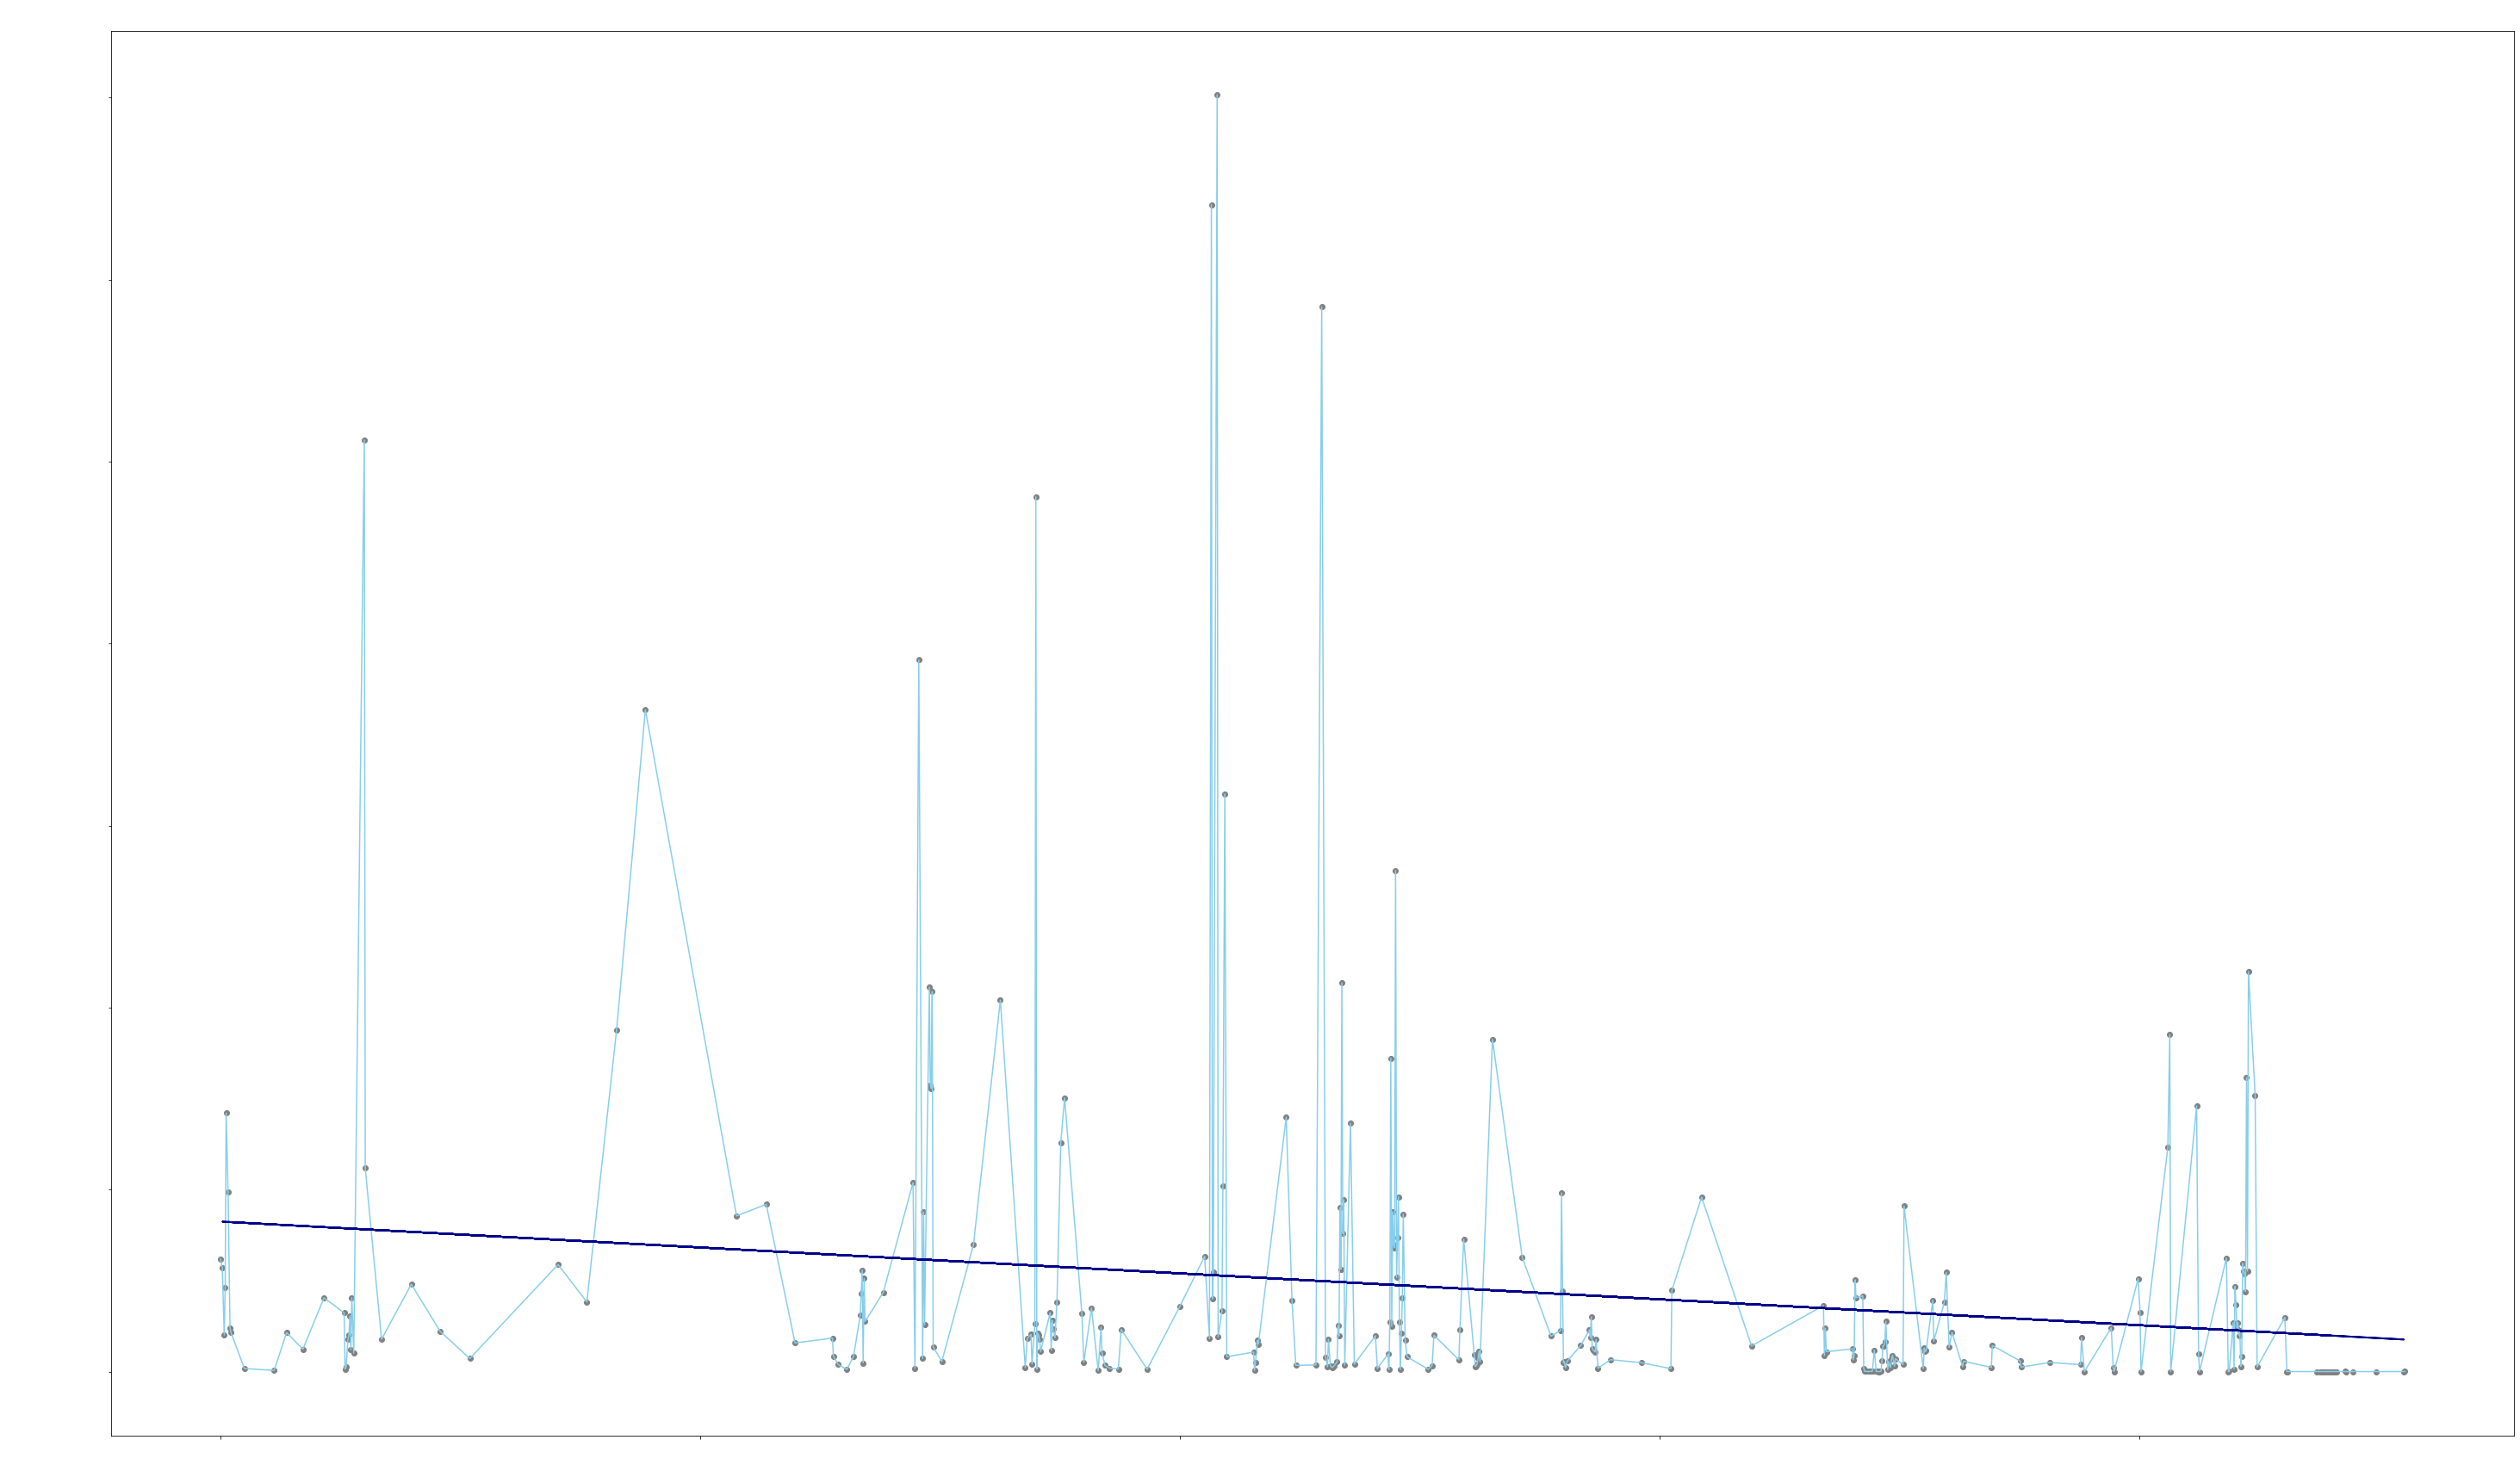

Linear Regressor performance:
Mean absolute error =  5843.39
Mean squared error =  46828151.8
Median absolute error =  5040.23
Explained variance score =  0.23
R2 score =  0.23


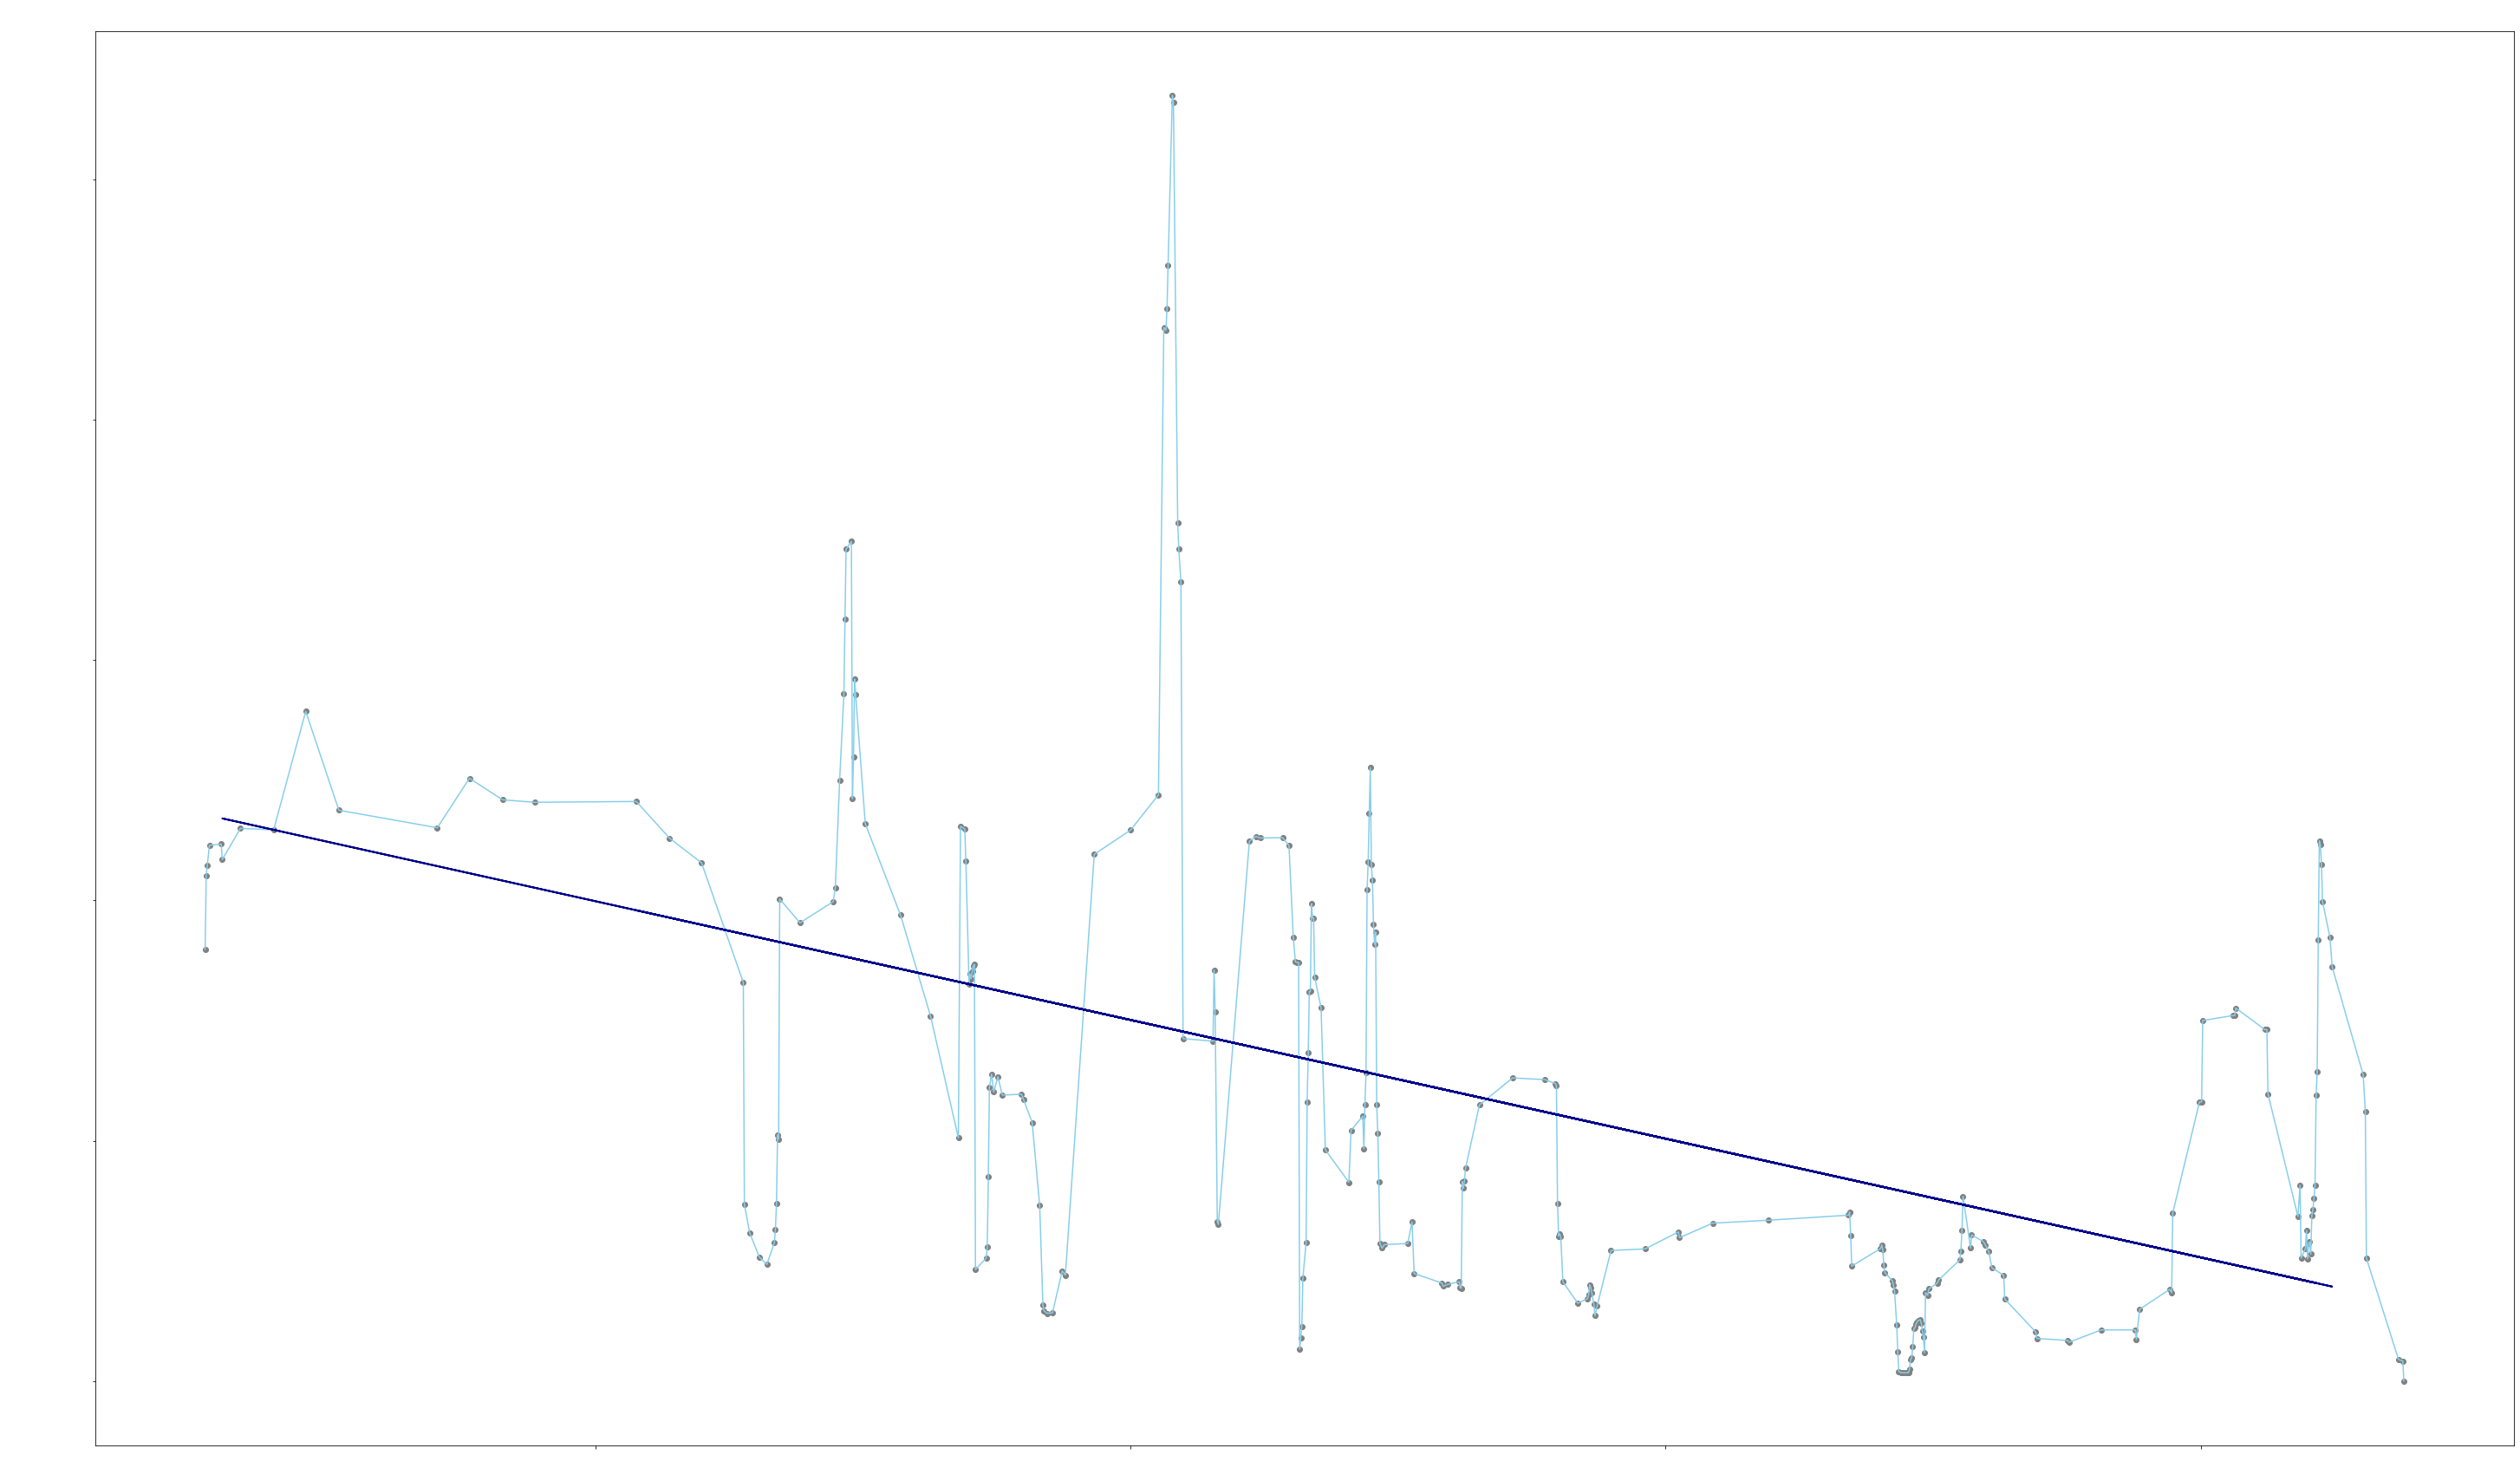

Linear Regressor performance:
Mean absolute error =  4487.96
Mean squared error =  30282238.96
Median absolute error =  3857.67
Explained variance score =  0.48
R2 score =  0.47


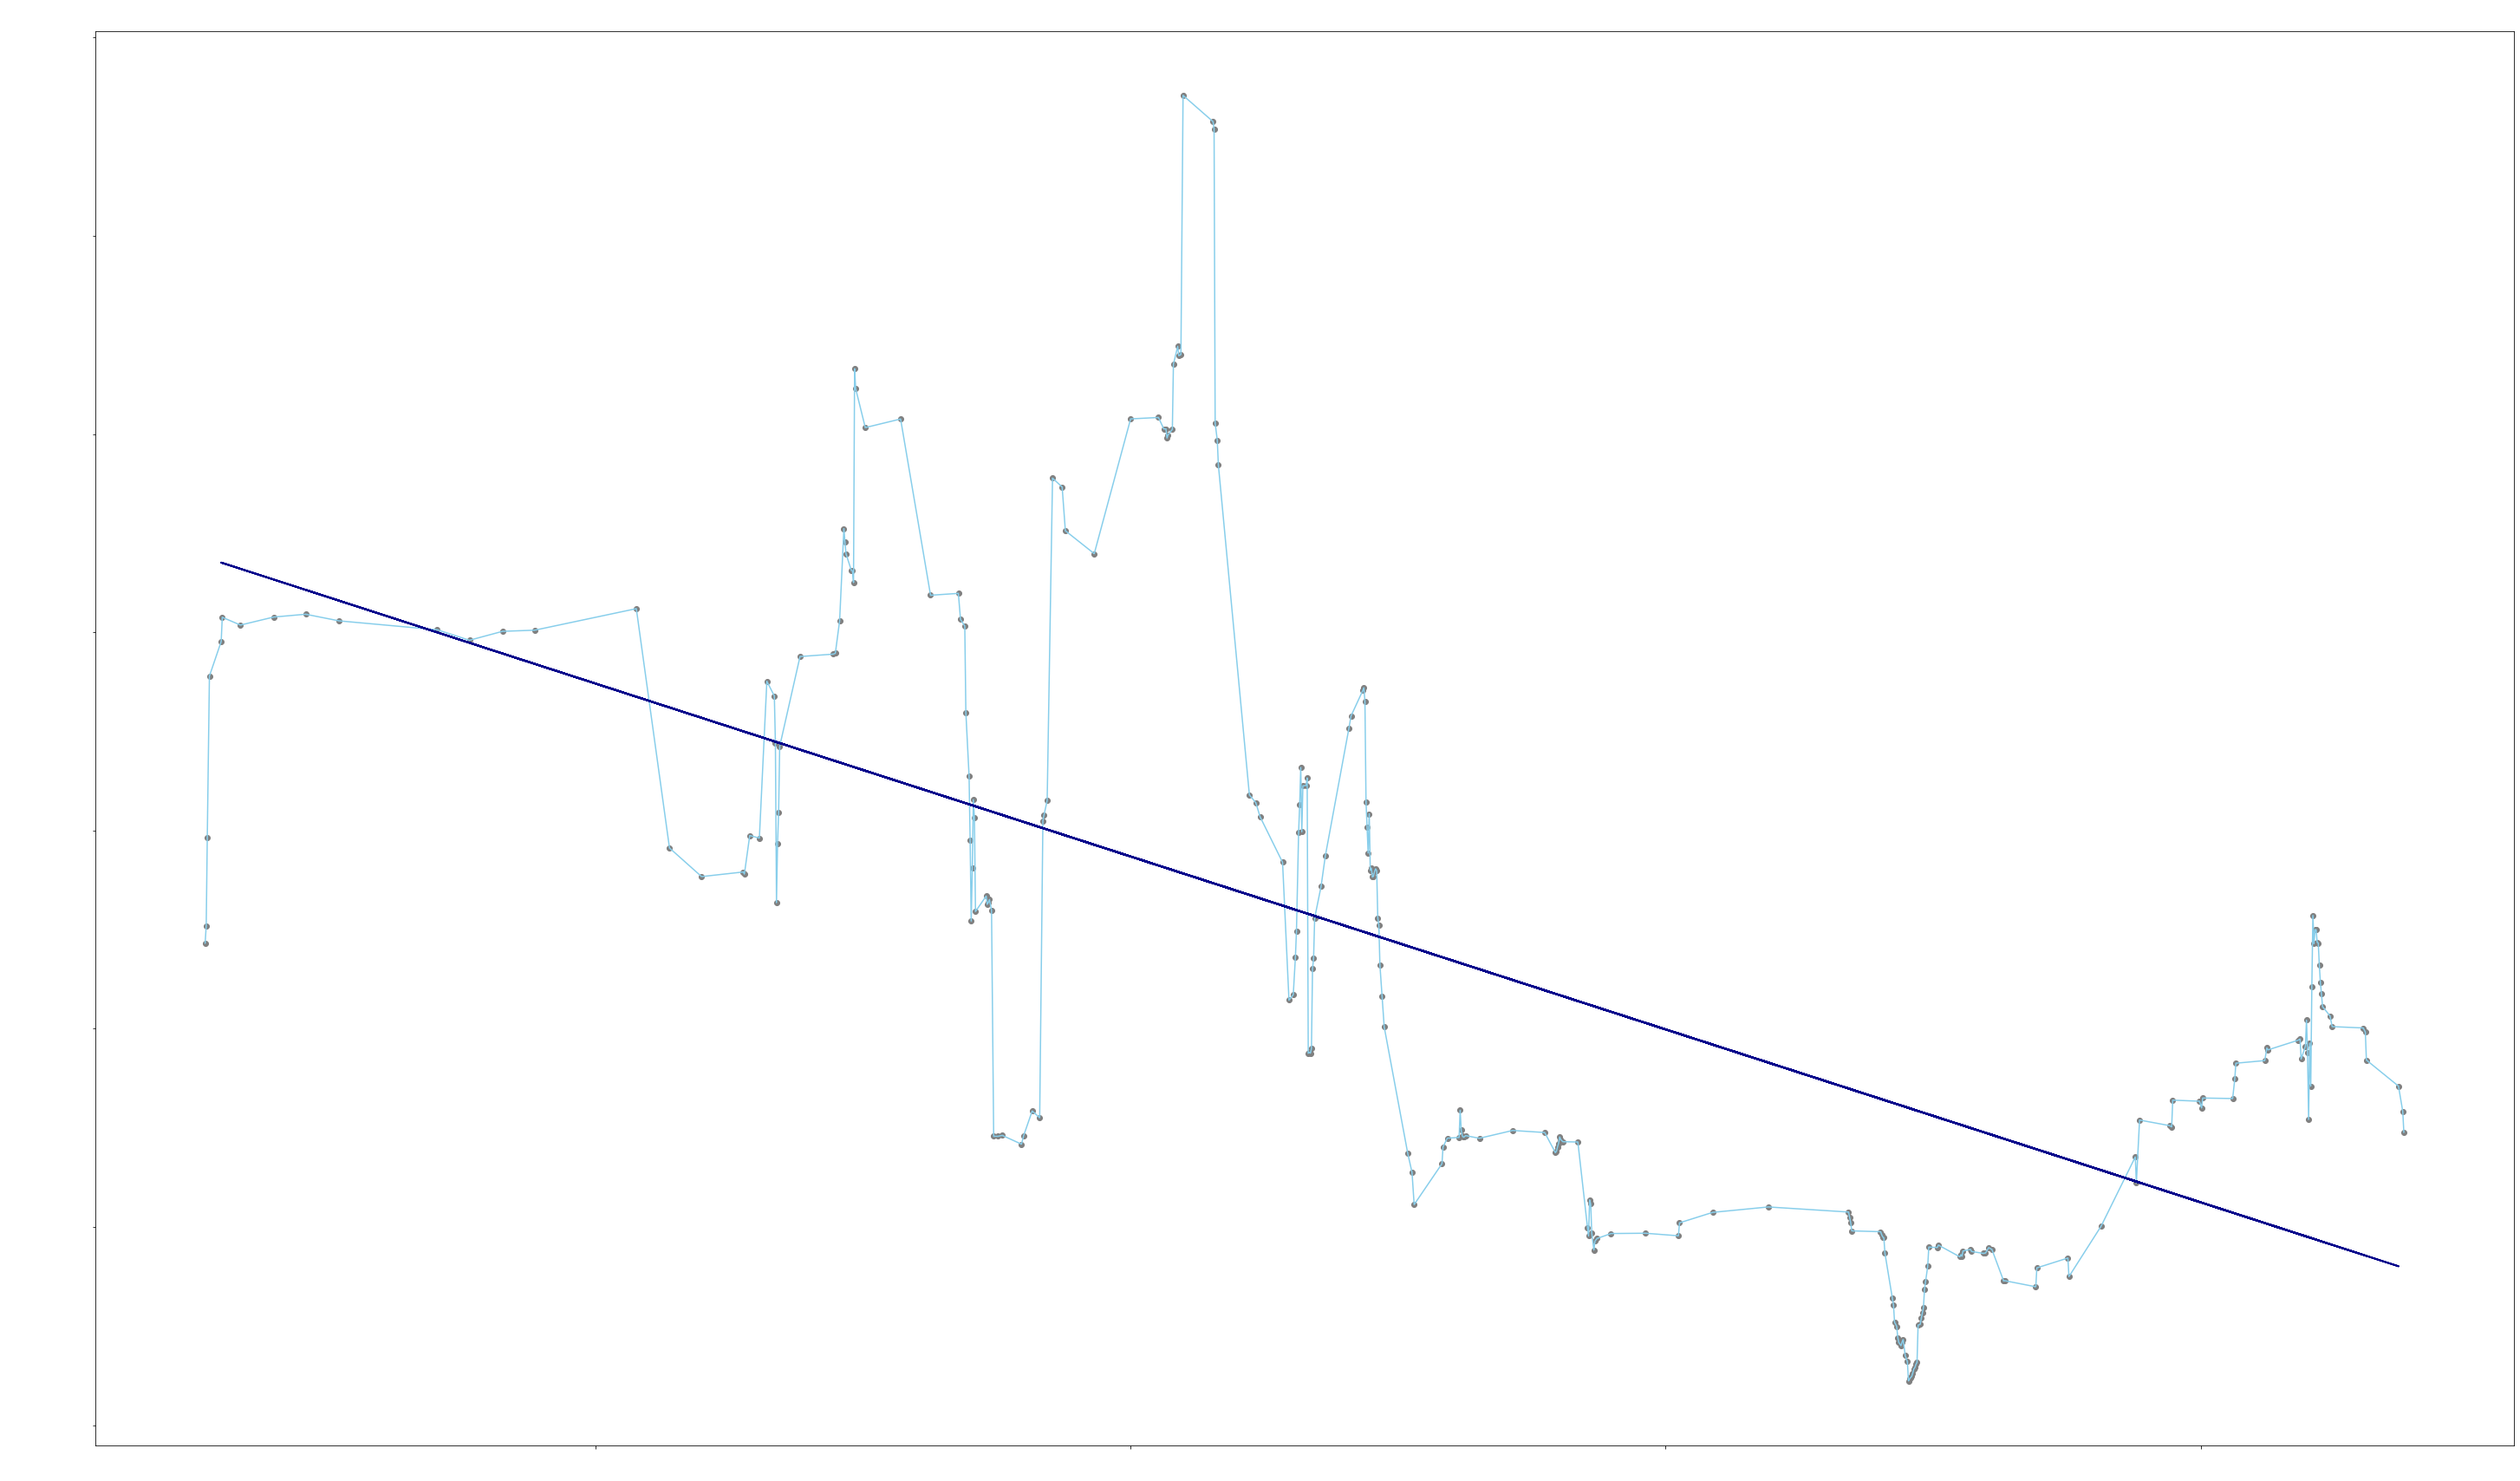

Linear Regressor performance:
Mean absolute error =  3714.05
Mean squared error =  18497702.15
Median absolute error =  3691.88
Explained variance score =  0.54
R2 score =  0.54


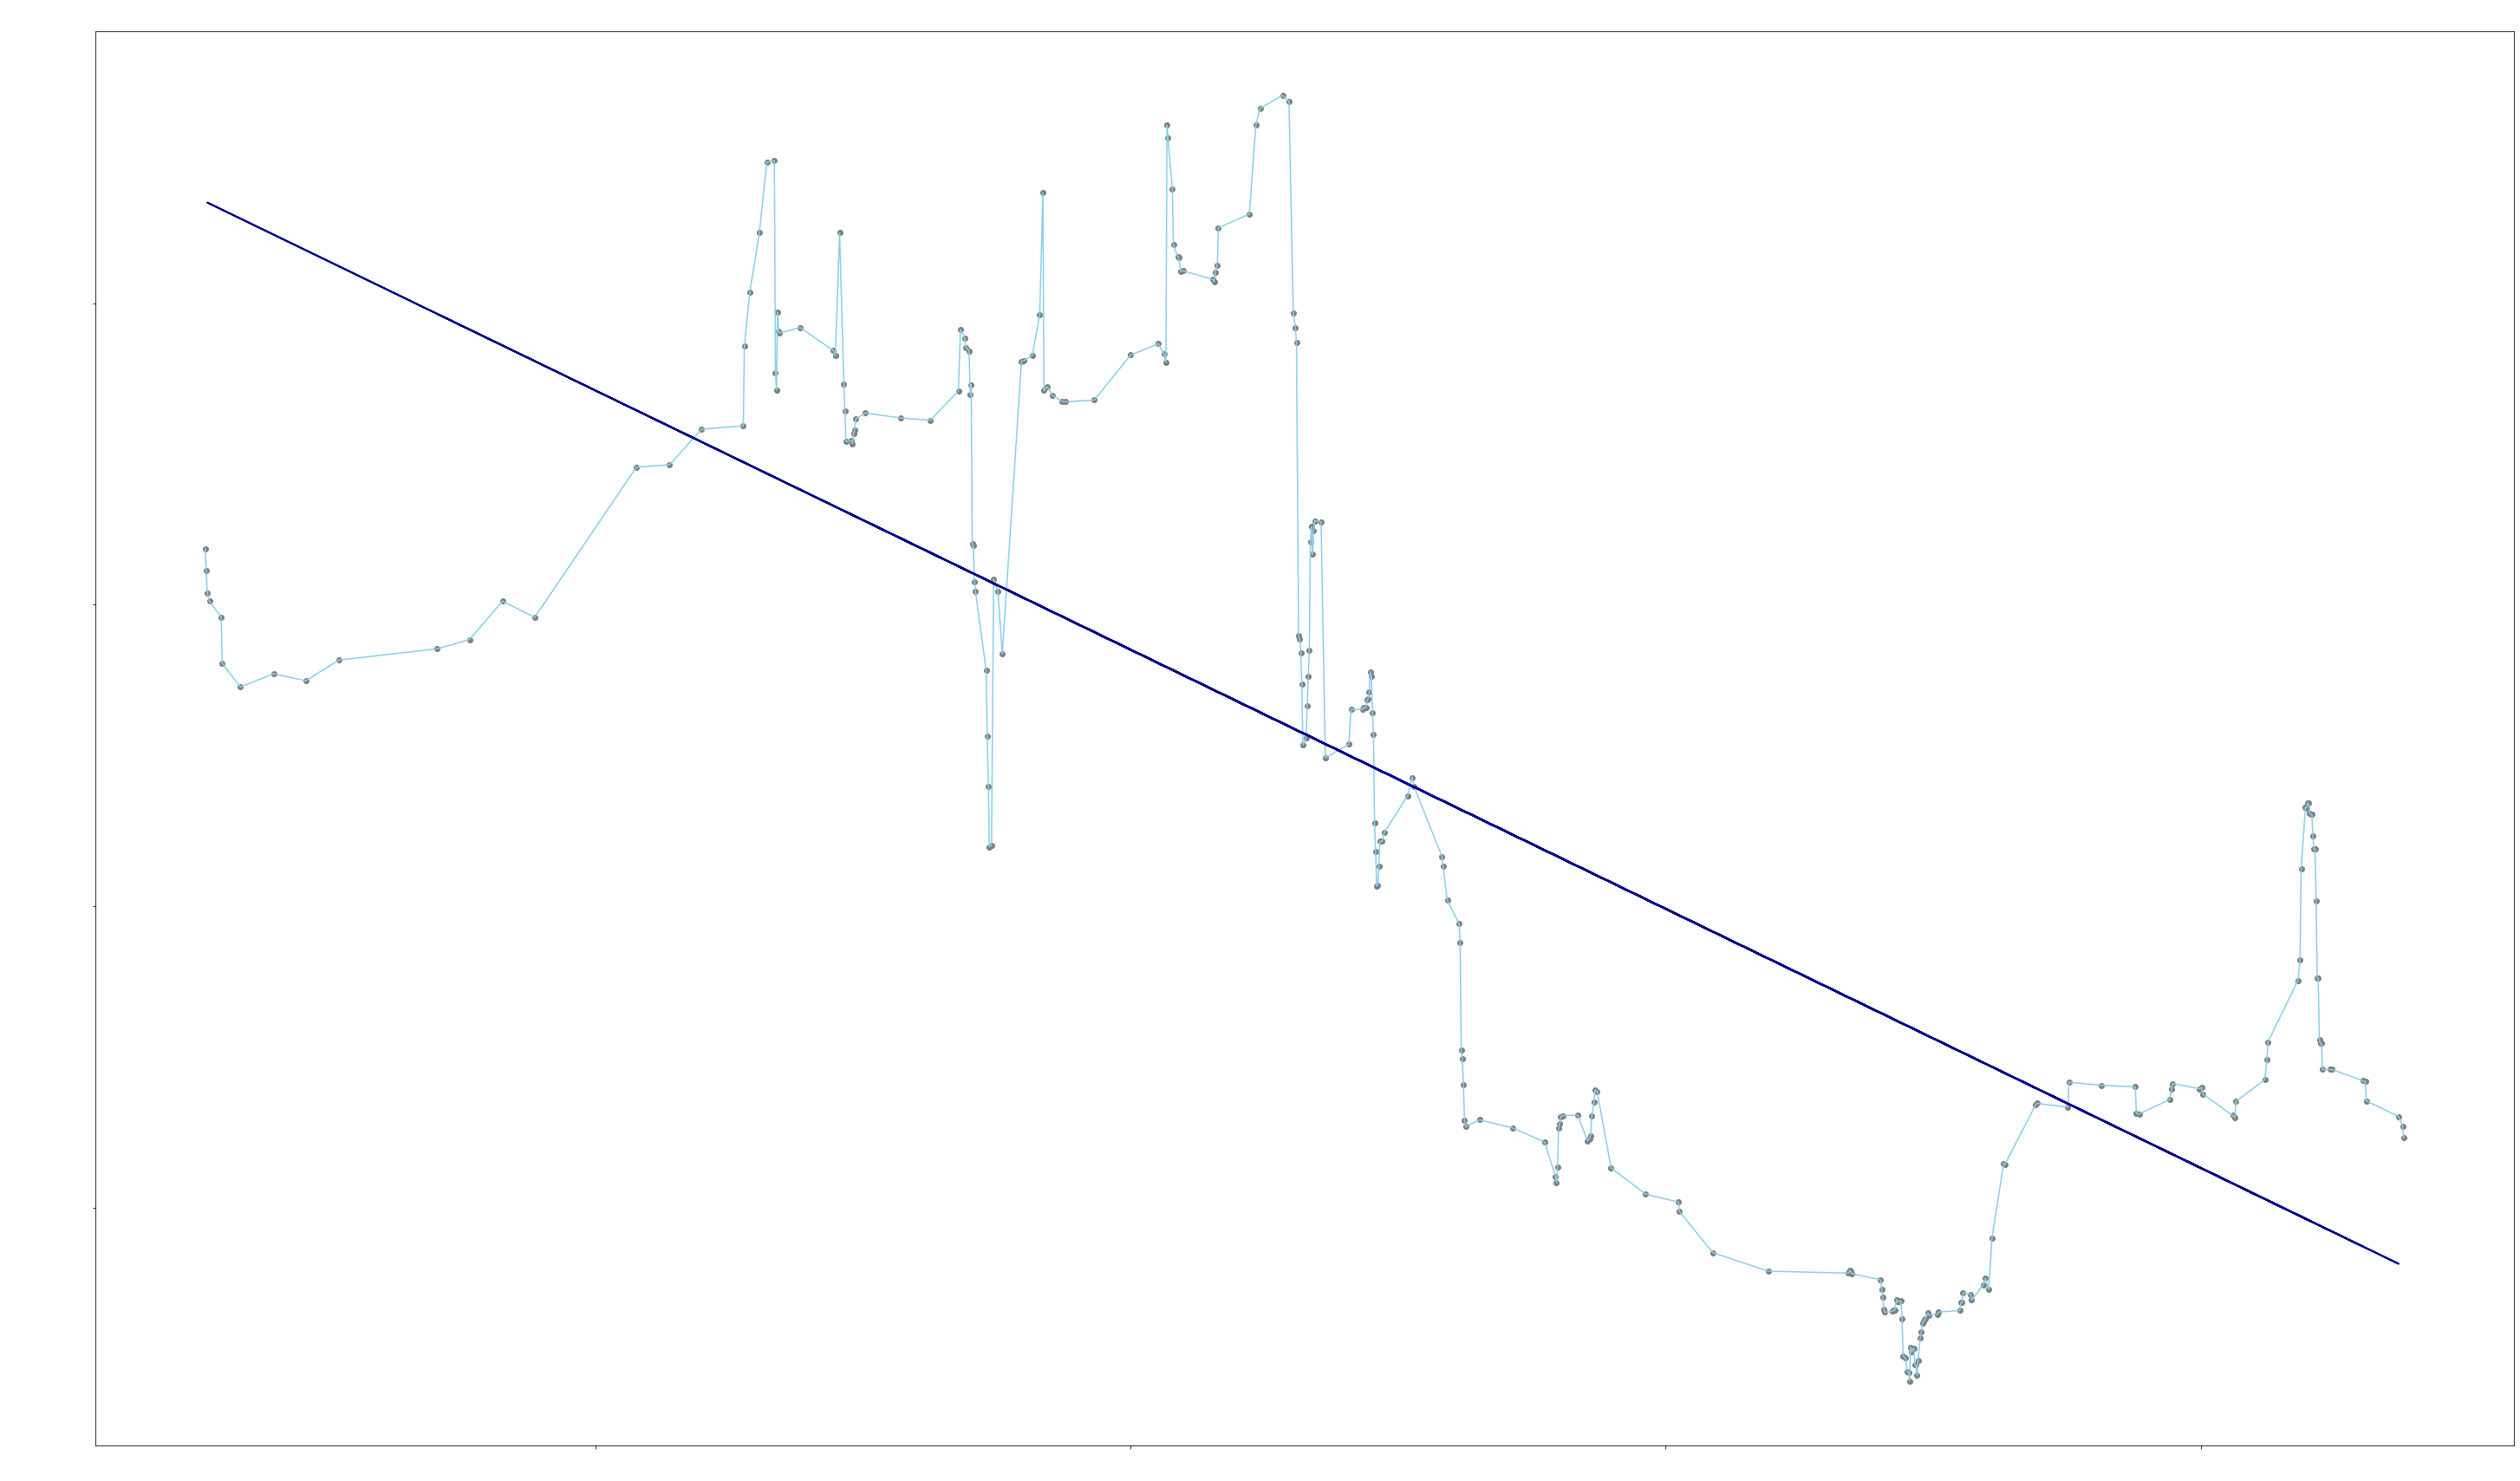

Linear Regressor performance:
Mean absolute error =  11505.08
Mean squared error =  369491515.46
Median absolute error =  8243.27
Explained variance score =  0.05
R2 score =  0.04


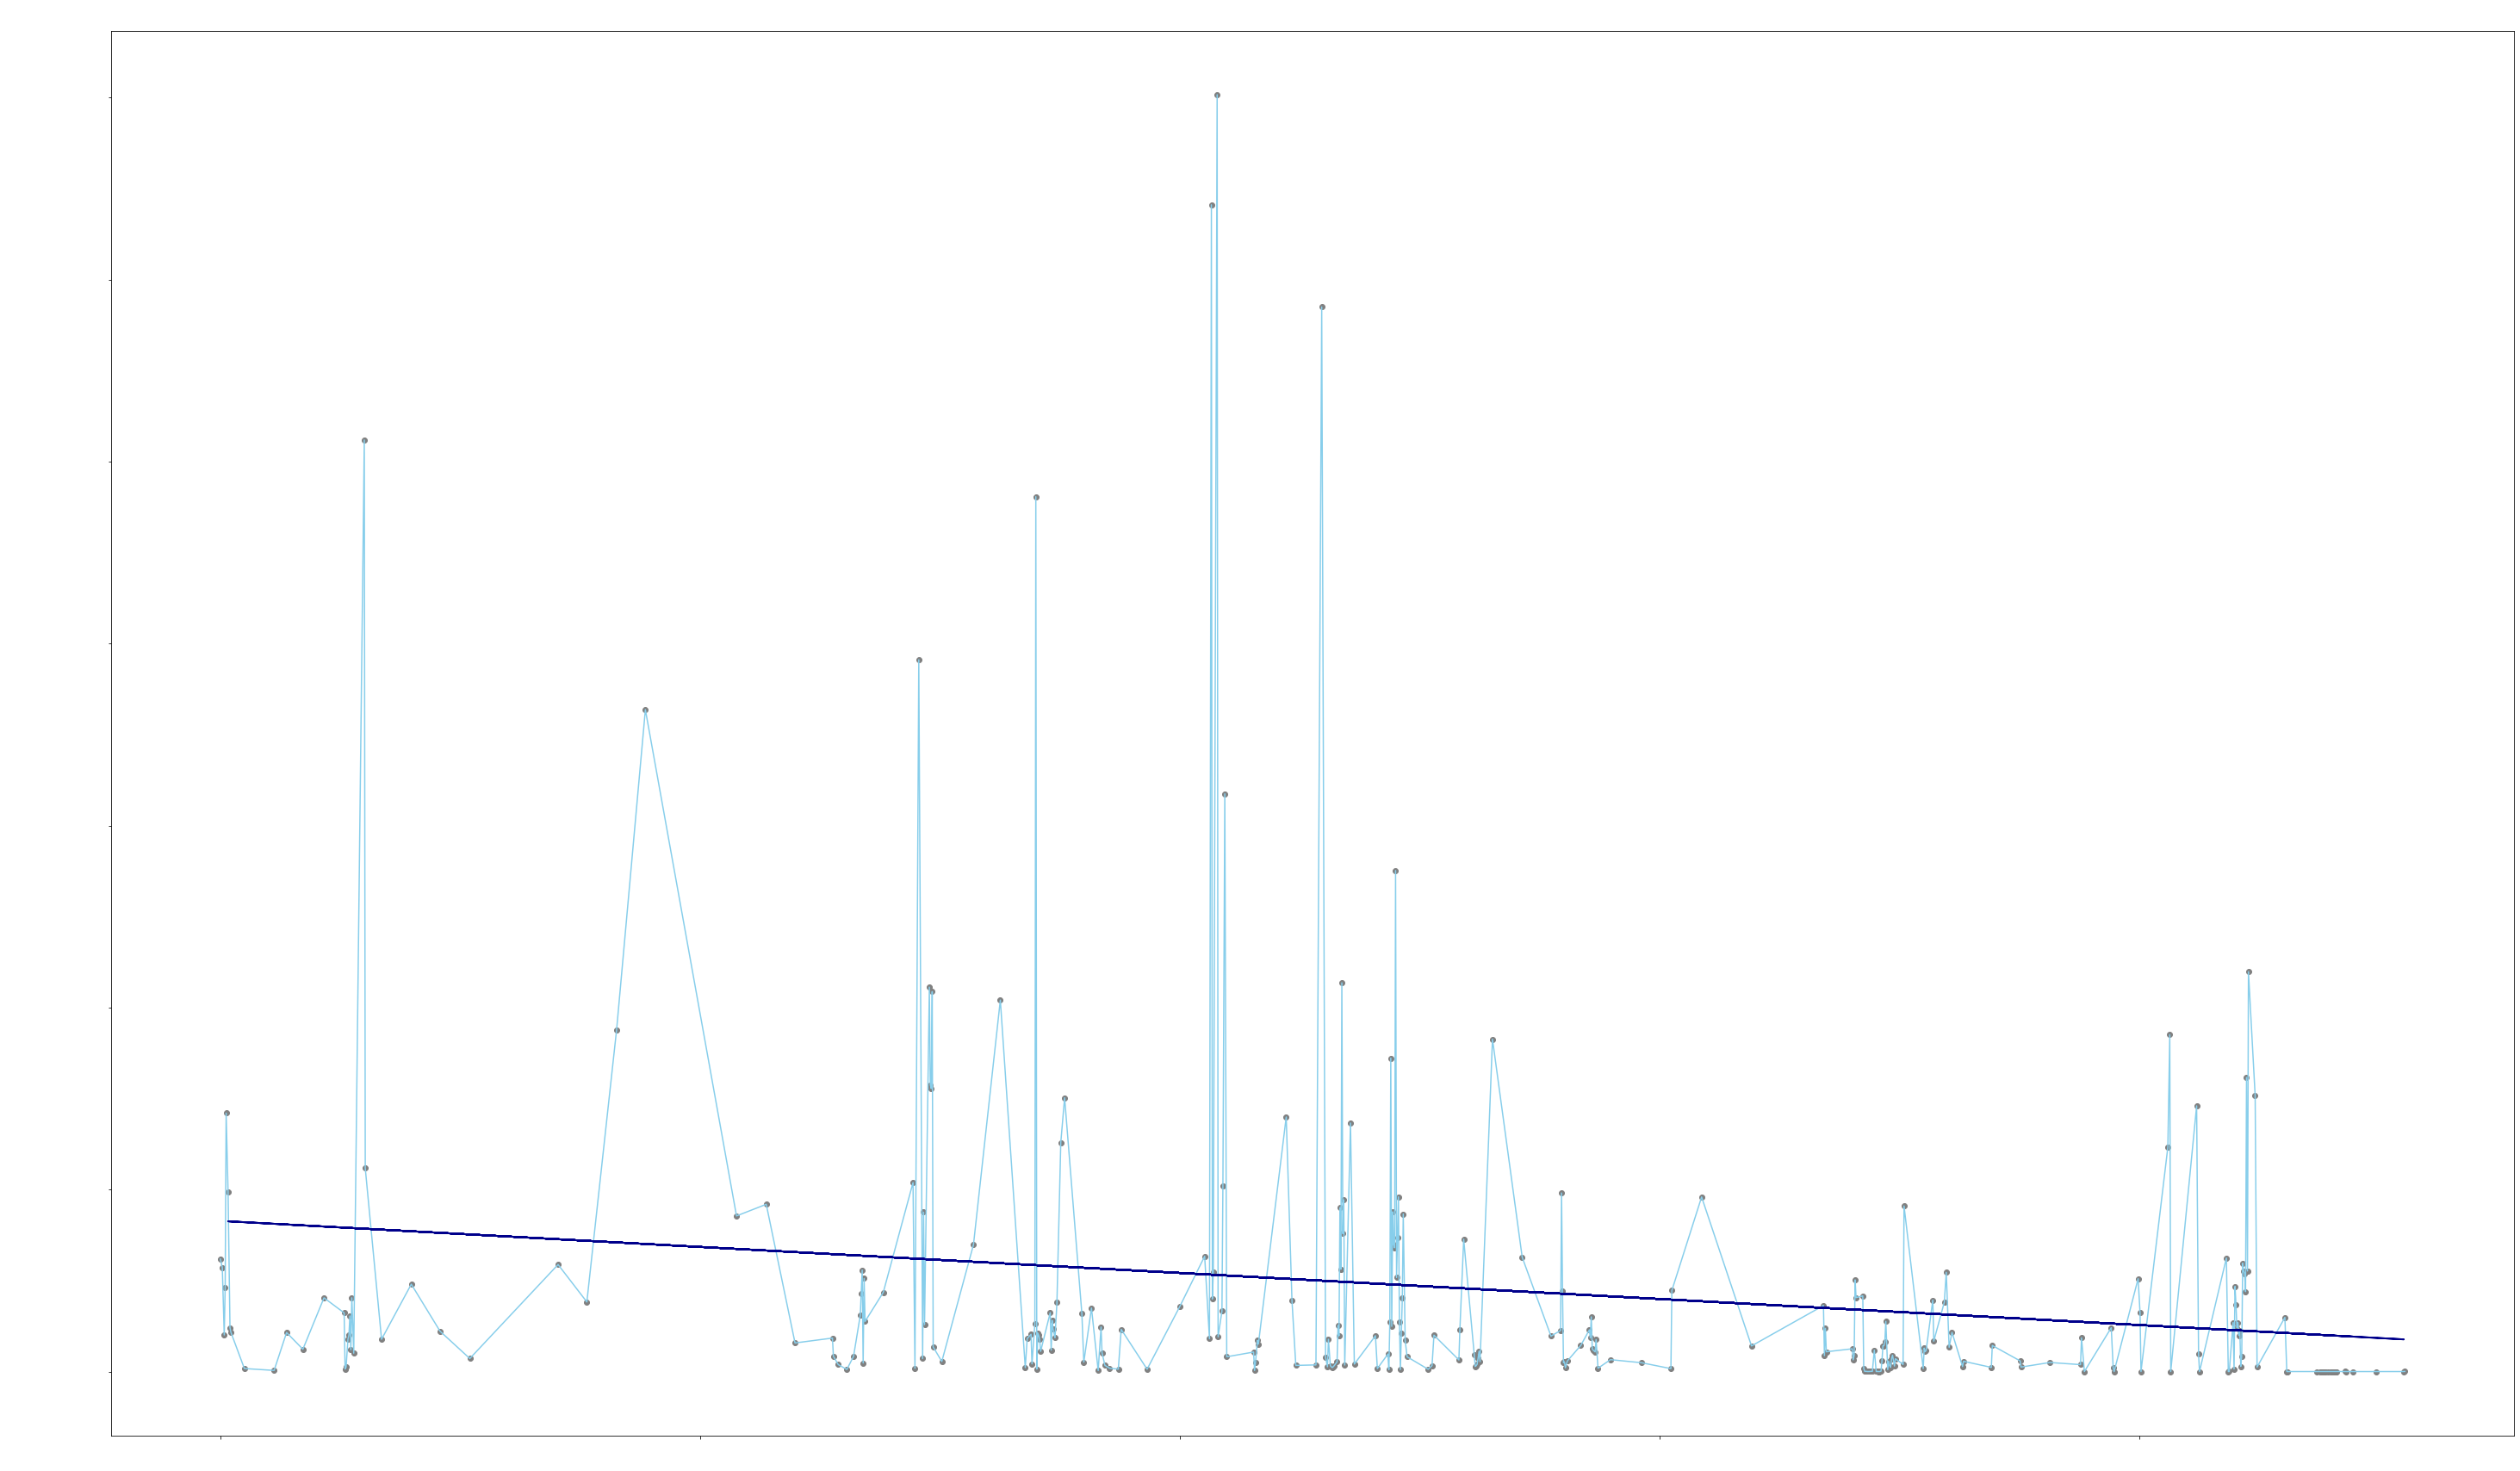

Linear Regressor performance:
Mean absolute error =  7363.16
Mean squared error =  100798248.22
Median absolute error =  5780.98
Explained variance score =  0.18
R2 score =  0.16


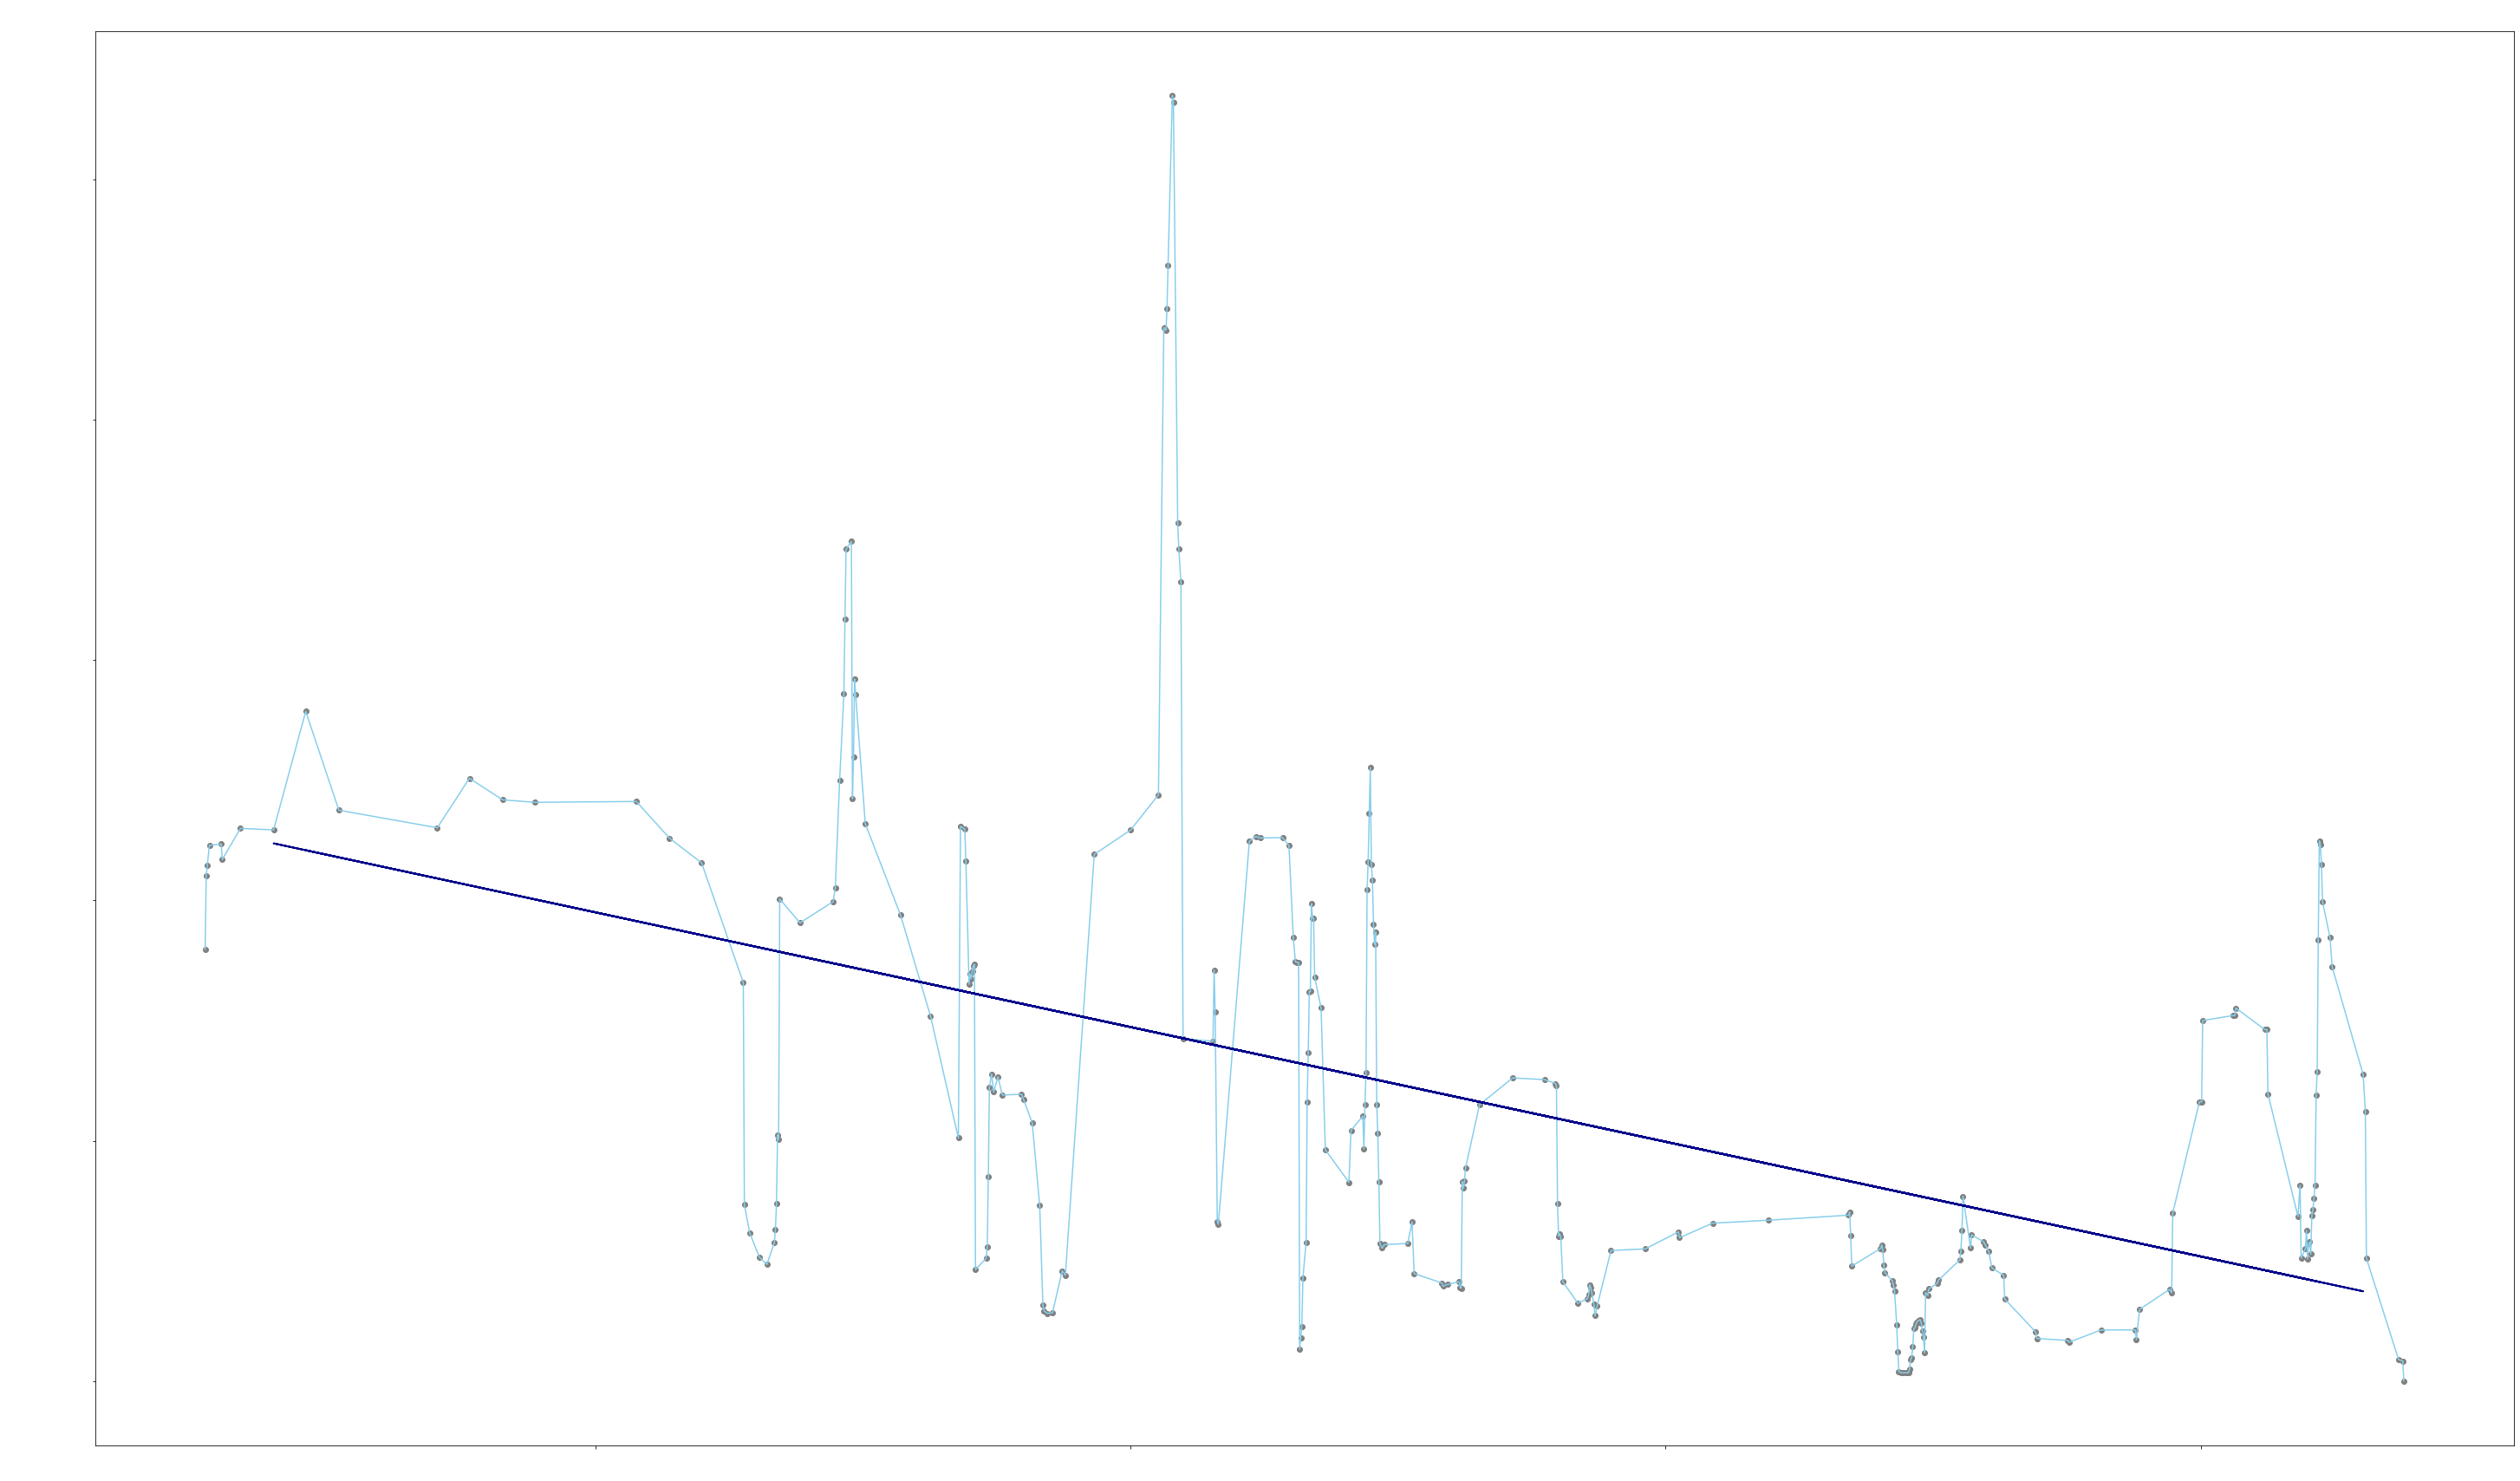

Linear Regressor performance:
Mean absolute error =  4461.73
Mean squared error =  33283429.55
Median absolute error =  3834.65
Explained variance score =  0.37
R2 score =  0.28


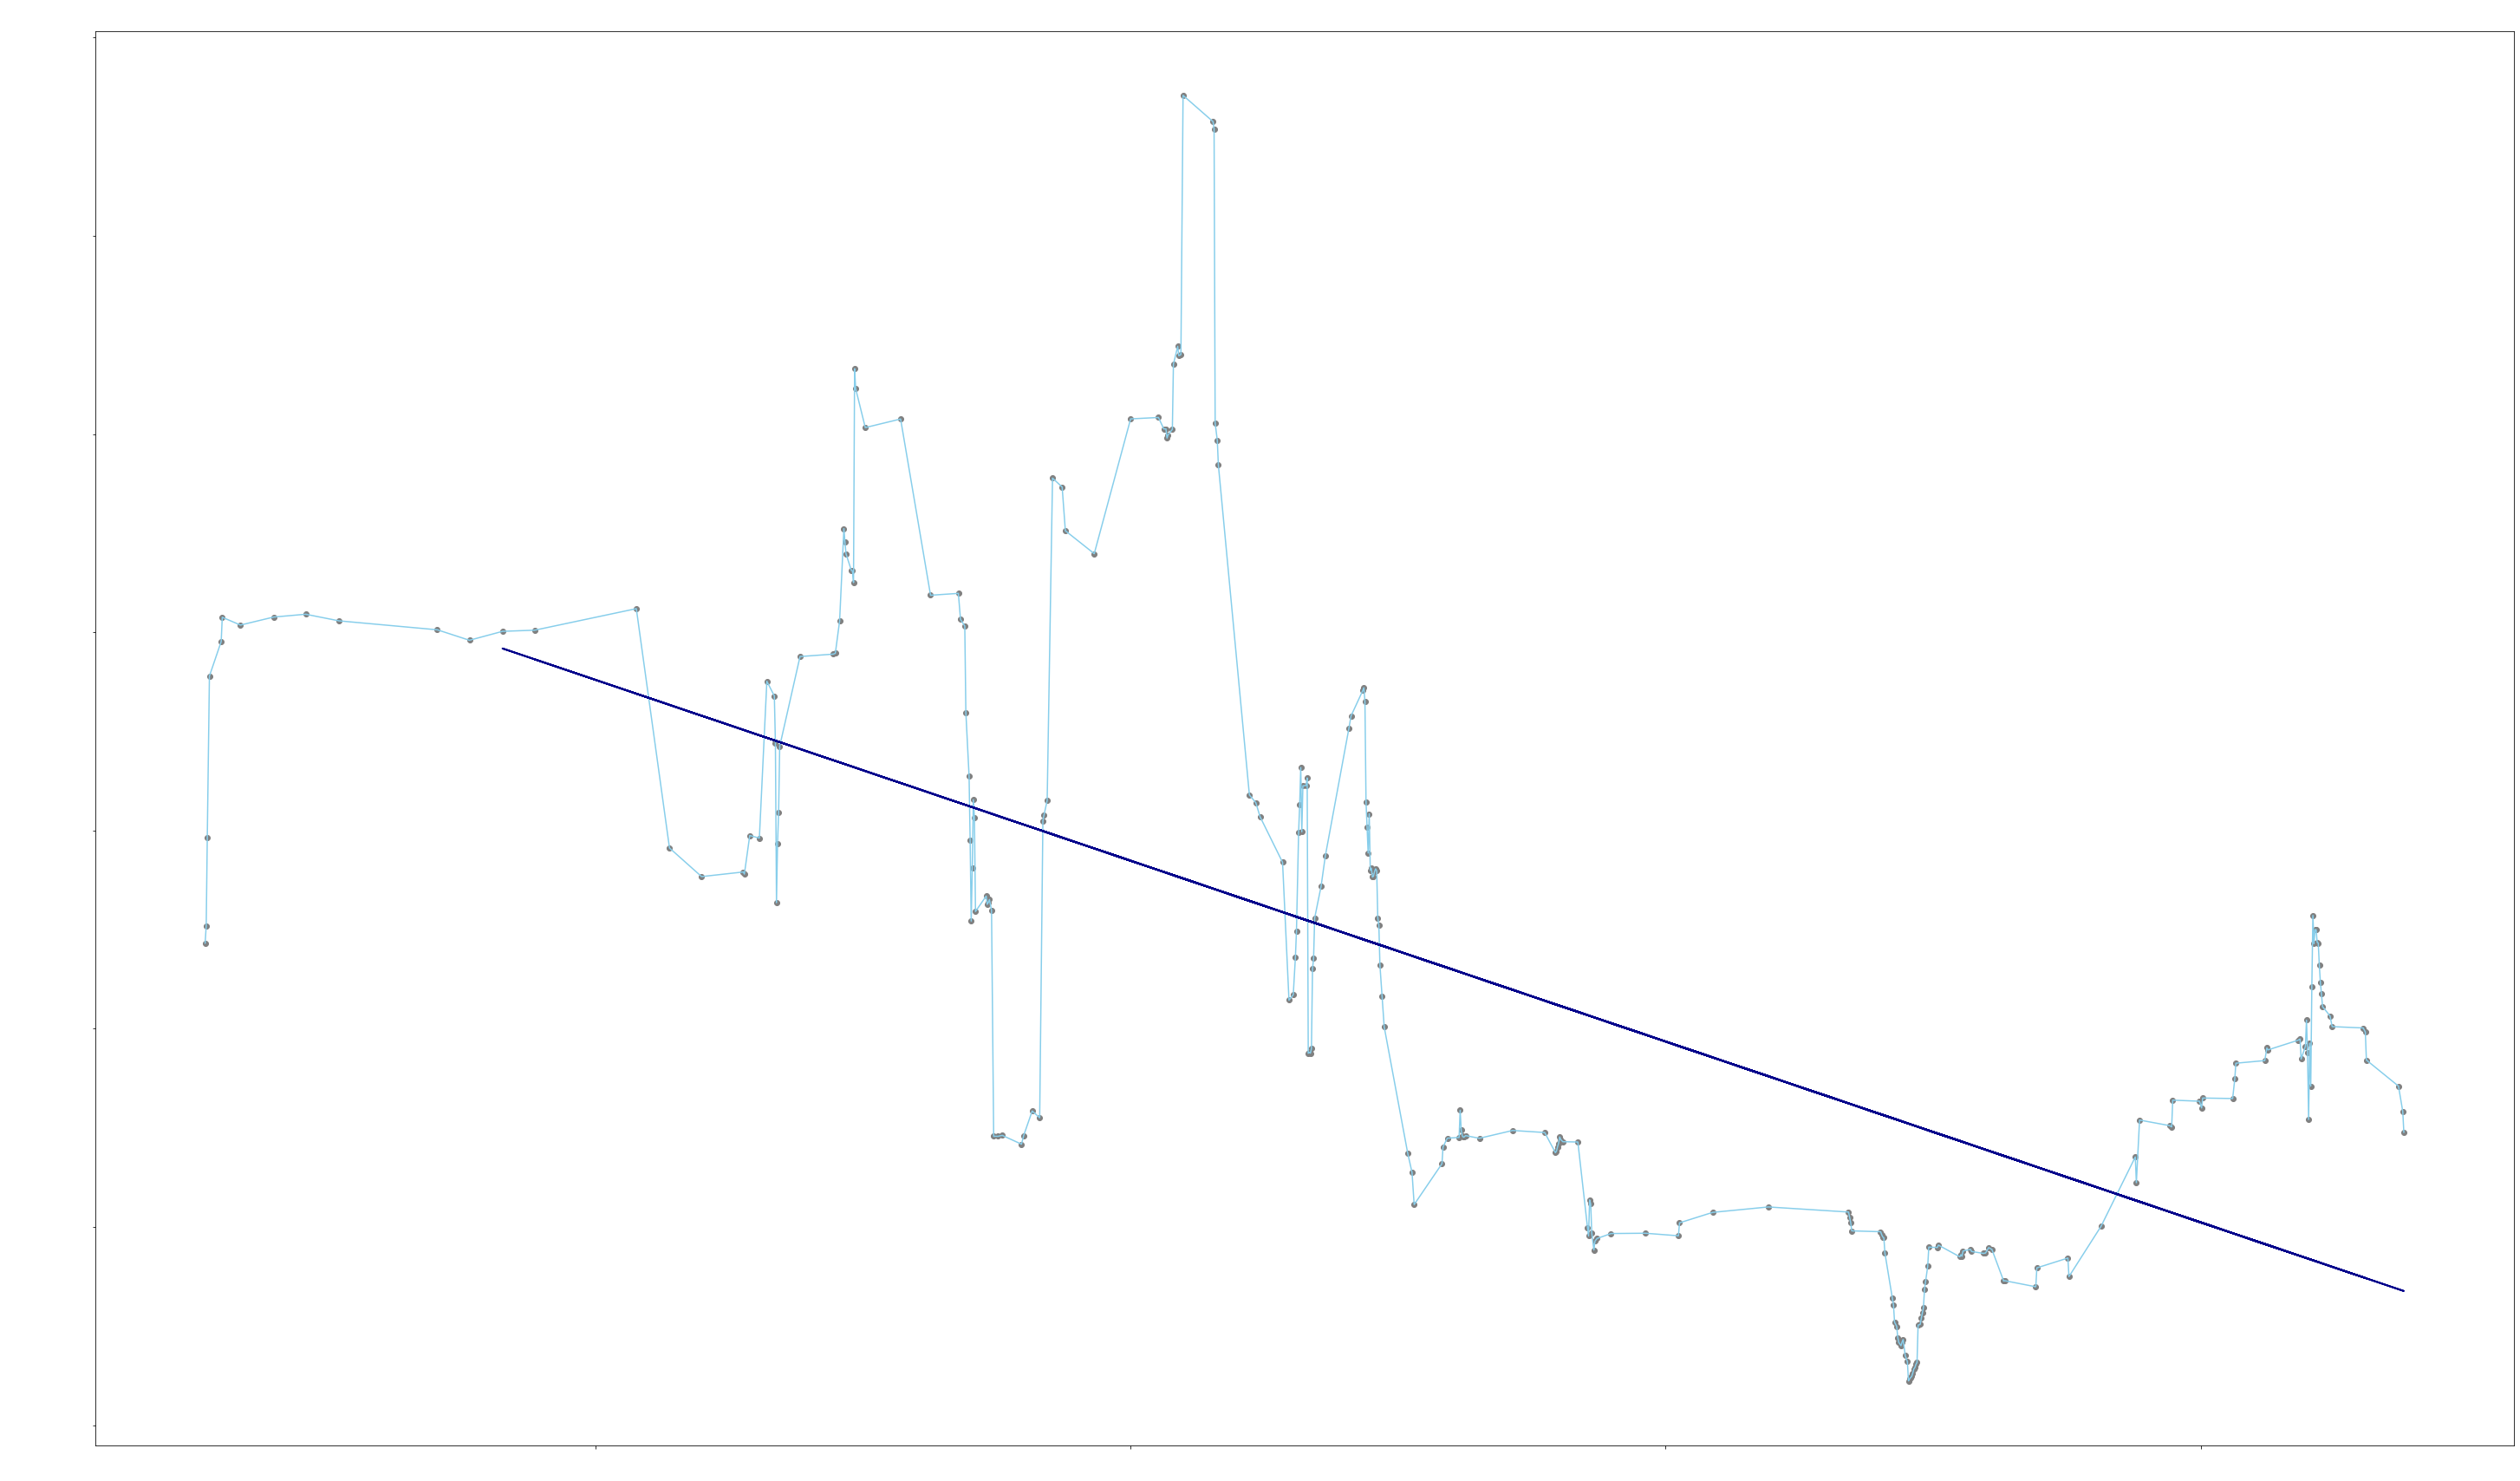

Linear Regressor performance:
Mean absolute error =  3394.19
Mean squared error =  16141118.19
Median absolute error =  3649.92
Explained variance score =  0.51
R2 score =  0.51


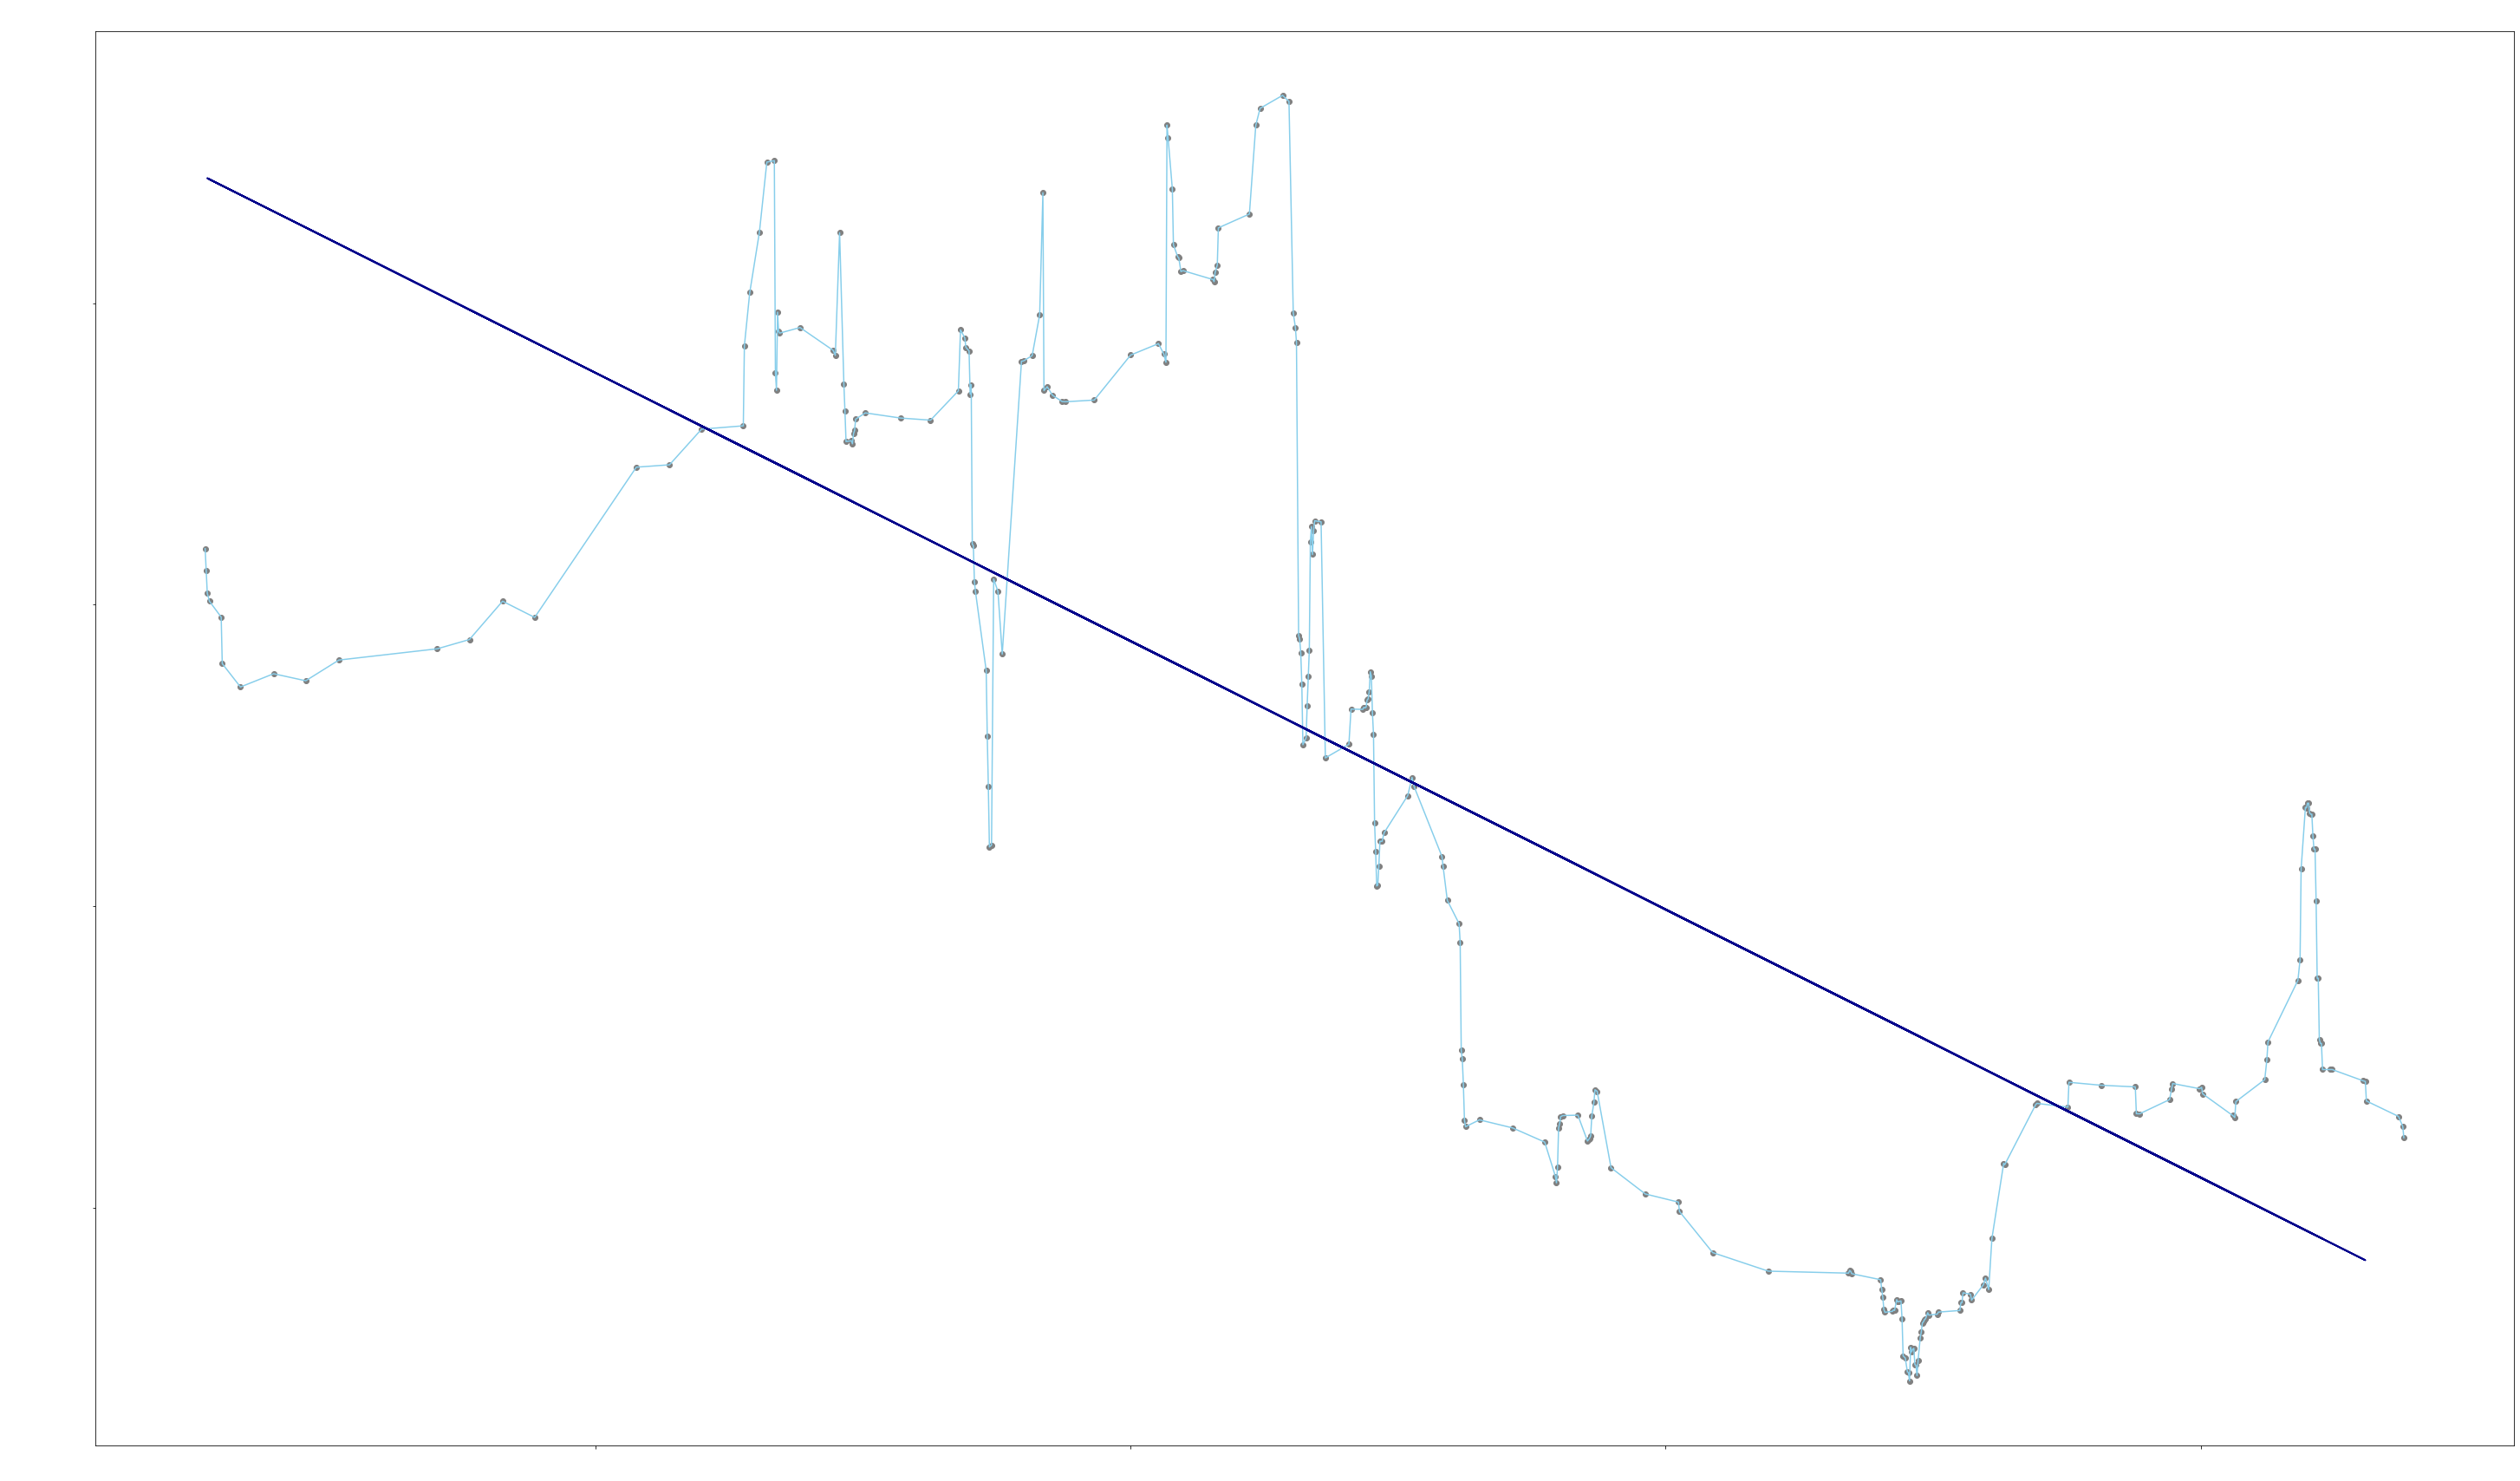

In [0]:
import pickle

import numpy as np
from numpy import array

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.to_numpy()

X_test = X_test.reshape(-1,1)

y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 1 > ] ##########
polynomial = PolynomialFeatures(degree=1)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 1 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.to_numpy()

X_test = X_test.reshape(-1,1)

y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 1 > ] ##########
polynomial = PolynomialFeatures(degree=1)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 1 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.to_numpy()

X_test = X_test.reshape(-1,1)

y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 1 > ] ##########
polynomial = PolynomialFeatures(degree=1)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 1 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.to_numpy()

X_test = X_test.reshape(-1,1)

y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 1 > ] ##########
polynomial = PolynomialFeatures(degree=1)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 1 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

**THE REGRESSiON WITH DGREE = 3**

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 3 > ] ##########
polynomial = PolynomialFeatures(degree=3)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 3 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 3 > ] ##########
polynomial = PolynomialFeatures(degree=3)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 3 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 3 > ] ##########
polynomial = PolynomialFeatures(degree=3)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 3 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 3 > ] ##########
polynomial = PolynomialFeatures(degree=3)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 3 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 4

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 4 > ] ##########
polynomial = PolynomialFeatures(degree=4)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 4 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 4 > ] ##########
polynomial = PolynomialFeatures(degree=4)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 4 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 4 > ] ##########
polynomial = PolynomialFeatures(degree=4)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 4 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 4 > ] ##########
polynomial = PolynomialFeatures(degree=4)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 4 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 5

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 5 > ] ##########
polynomial = PolynomialFeatures(degree=5)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 5 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 5 > ] ##########
polynomial = PolynomialFeatures(degree=5)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 5 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 5 > ] ##########
polynomial = PolynomialFeatures(degree=5)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 5 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 5 > ] ##########
polynomial = PolynomialFeatures(degree=5)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 5 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 6

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 6 > ] ##########
polynomial = PolynomialFeatures(degree=6)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 6 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 6 > ] ##########
polynomial = PolynomialFeatures(degree=6)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 6 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 6 > ] ##########
polynomial = PolynomialFeatures(degree=6)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 6 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 6 > ] ##########
polynomial = PolynomialFeatures(degree=6)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 6 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 7

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 7 > ] ##########
polynomial = PolynomialFeatures(degree=7)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 7 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 7 > ] ##########
polynomial = PolynomialFeatures(degree=7)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 7 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 7 > ] ##########
polynomial = PolynomialFeatures(degree=7)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 7 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 7 > ] ##########
polynomial = PolynomialFeatures(degree=7)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 7 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DGREE = 8

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 8 > ] ##########
polynomial = PolynomialFeatures(degree=8)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 8 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 8 > ] ##########
polynomial = PolynomialFeatures(degree=8)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 8 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 8 > ] ##########
polynomial = PolynomialFeatures(degree=8)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 8 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 8 > ] ##########
polynomial = PolynomialFeatures(degree=8)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 8 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 10



Linear Regressor performance:
Mean absolute error =  13185.92
Mean squared error =  413337466.21
Median absolute error =  11868.5
Explained variance score =  -0.39
R2 score =  -0.42


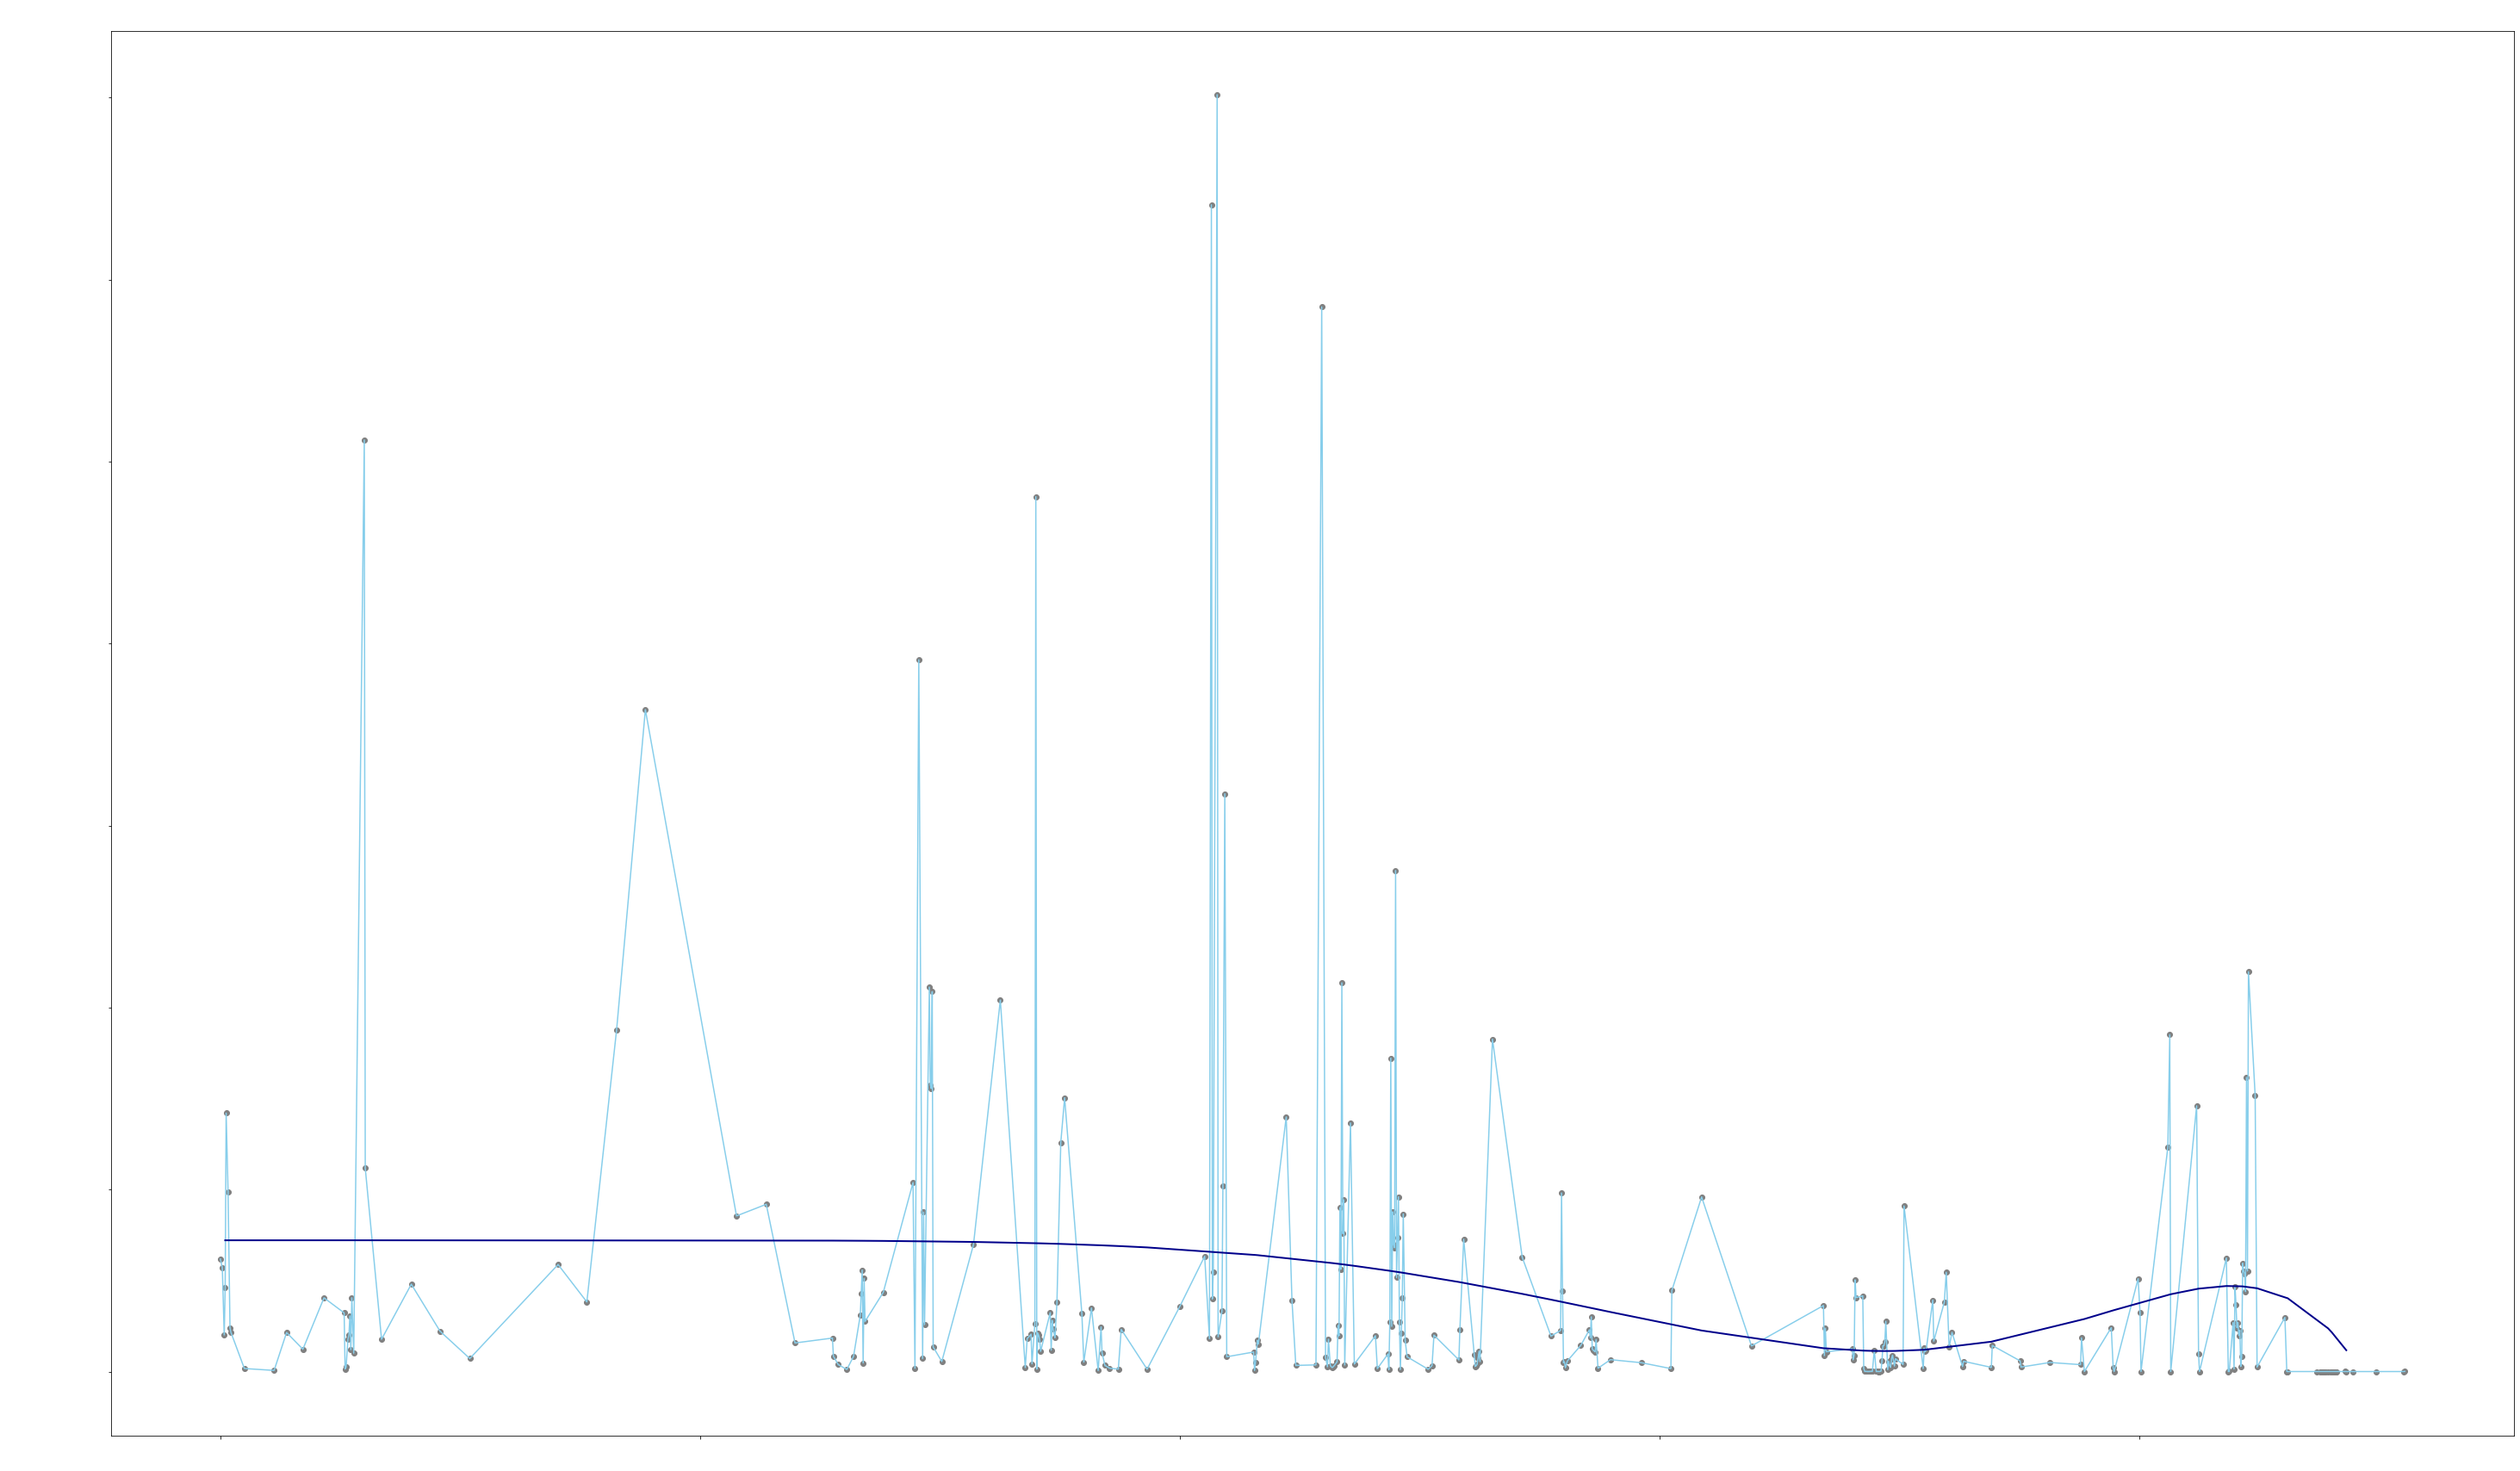

Linear Regressor performance:
Mean absolute error =  14294.97
Mean squared error =  268559024.32
Median absolute error =  14597.62
Explained variance score =  -0.75
R2 score =  -0.75


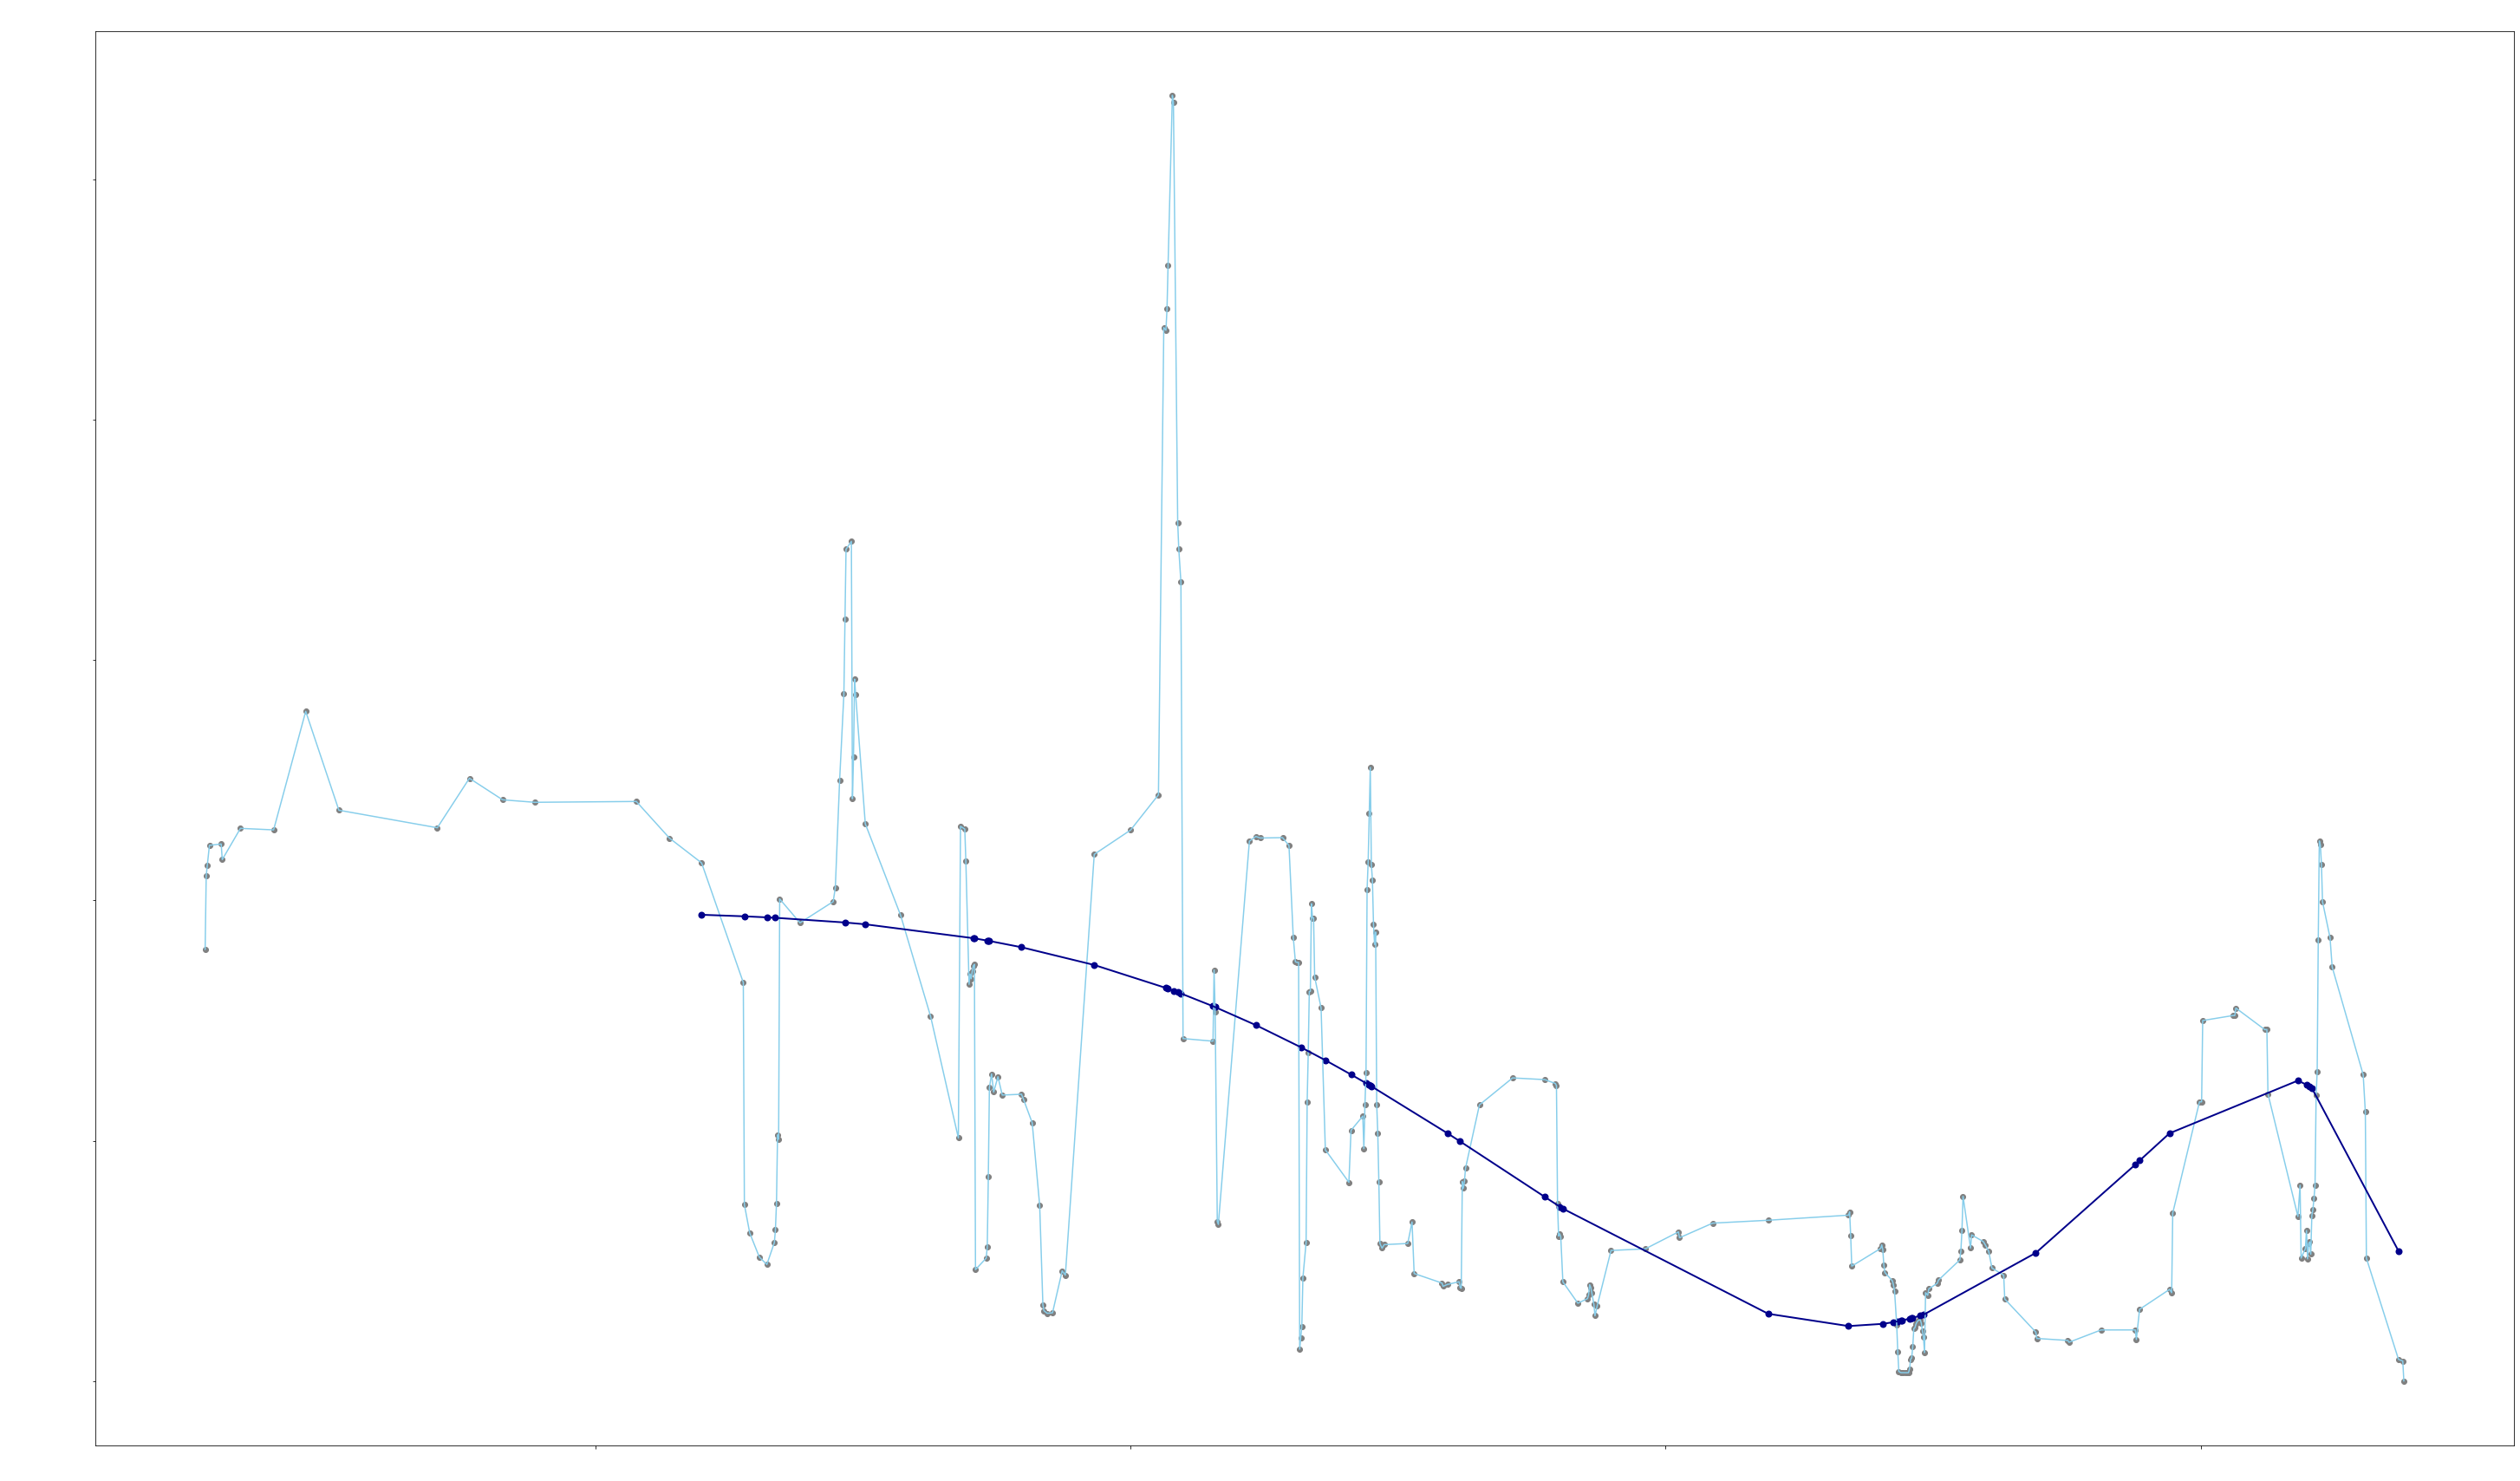

Linear Regressor performance:
Mean absolute error =  9622.43
Mean squared error =  112737337.29
Median absolute error =  9941.54
Explained variance score =  -2.15
R2 score =  -2.15


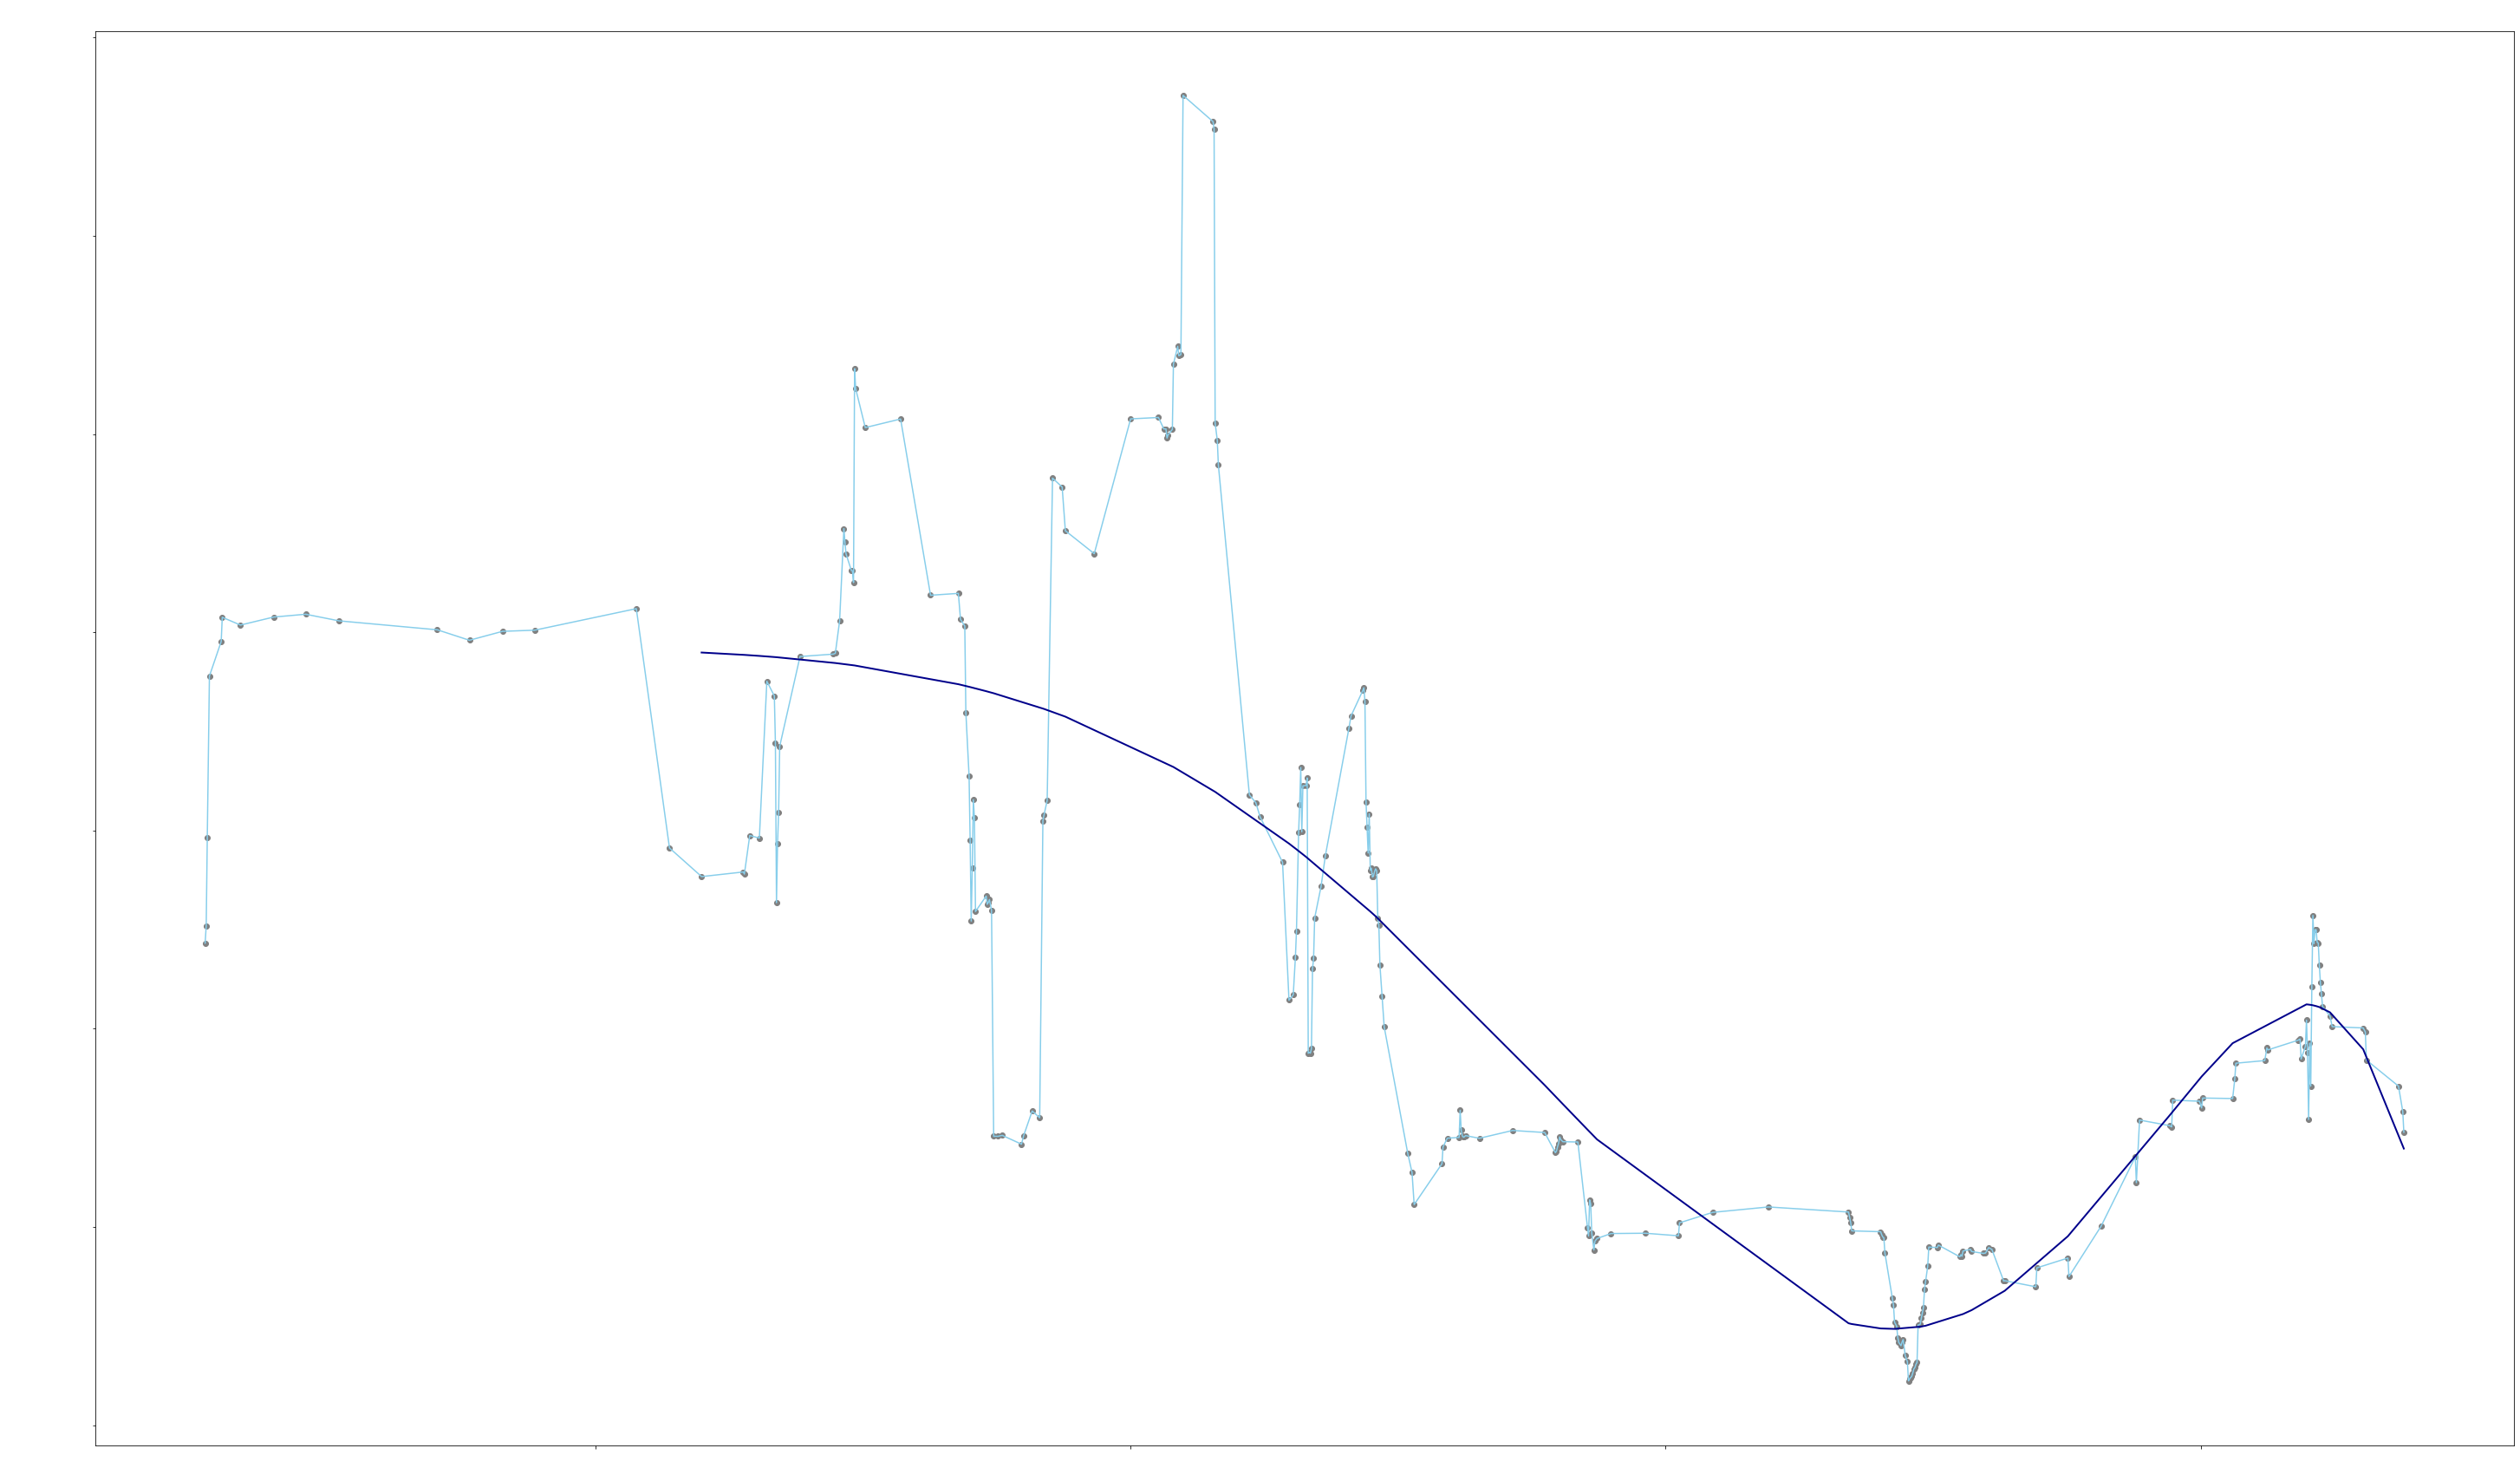

Linear Regressor performance:
Mean absolute error =  10294.97
Mean squared error =  127077799.41
Median absolute error =  11110.41
Explained variance score =  -2.11
R2 score =  -2.12


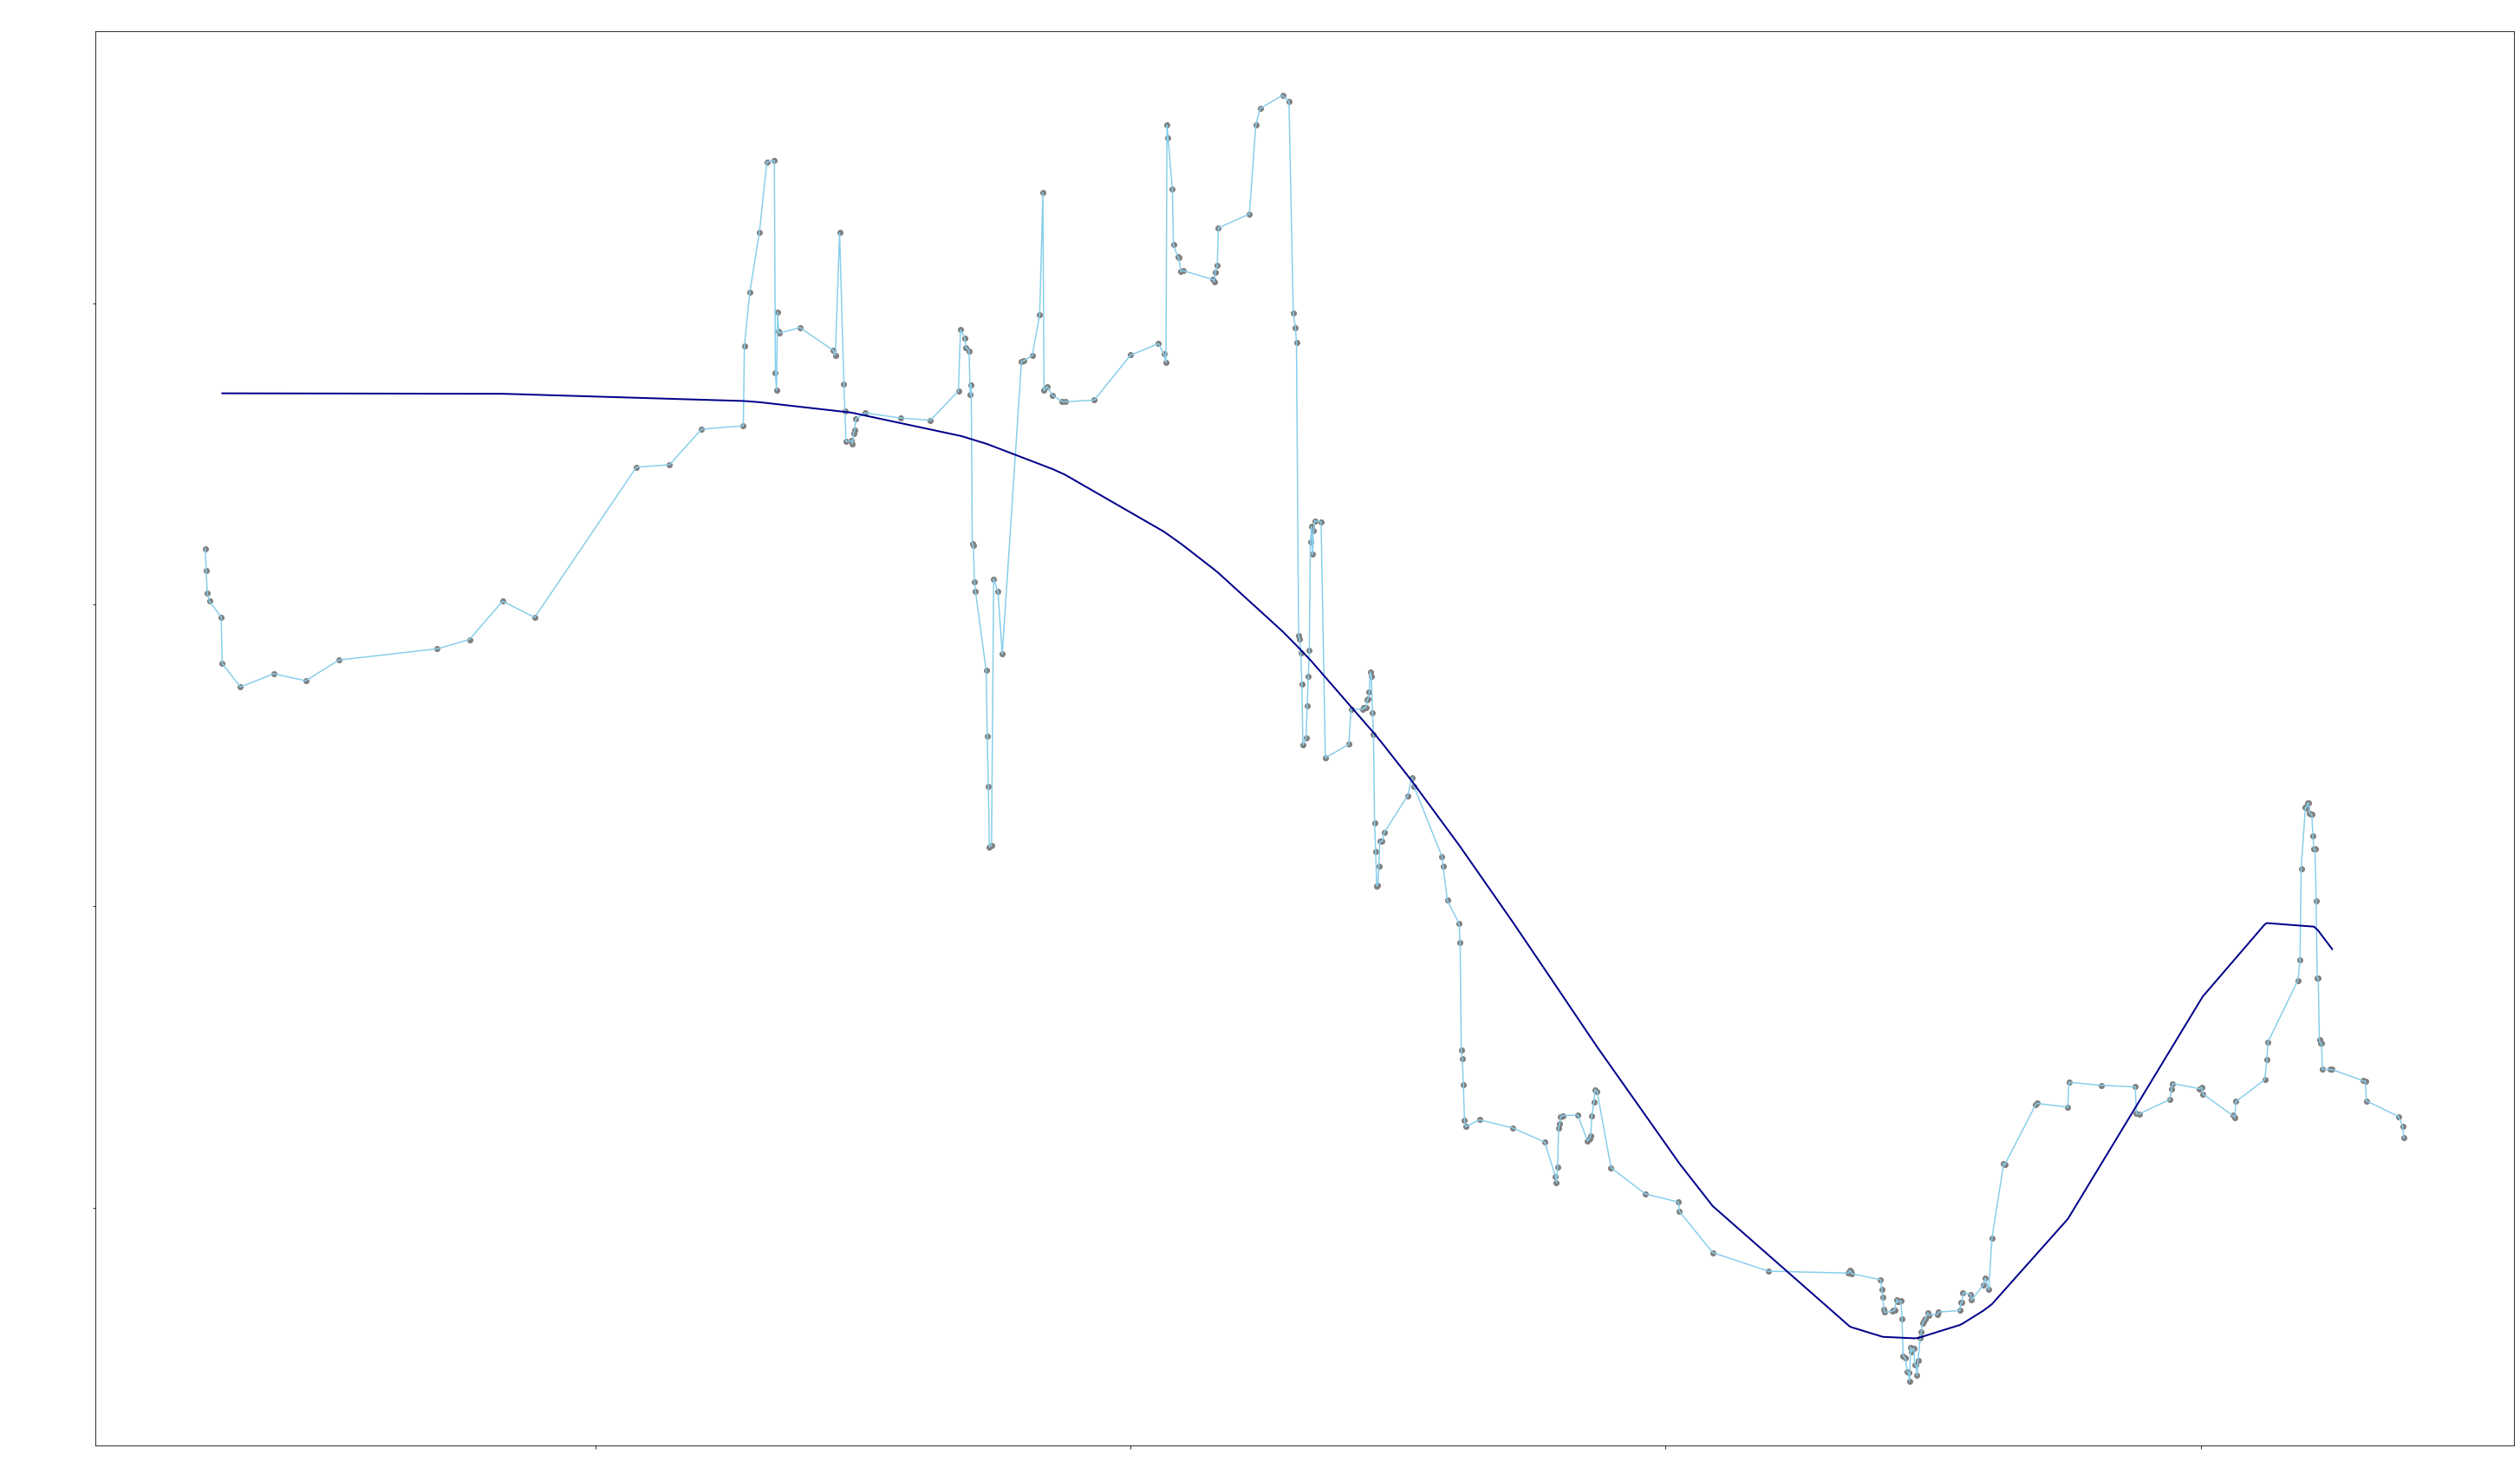

Linear Regressor performance:
Mean absolute error =  14413.25
Mean squared error =  334201218.56
Median absolute error =  12548.36
Explained variance score =  -0.59
R2 score =  -0.63


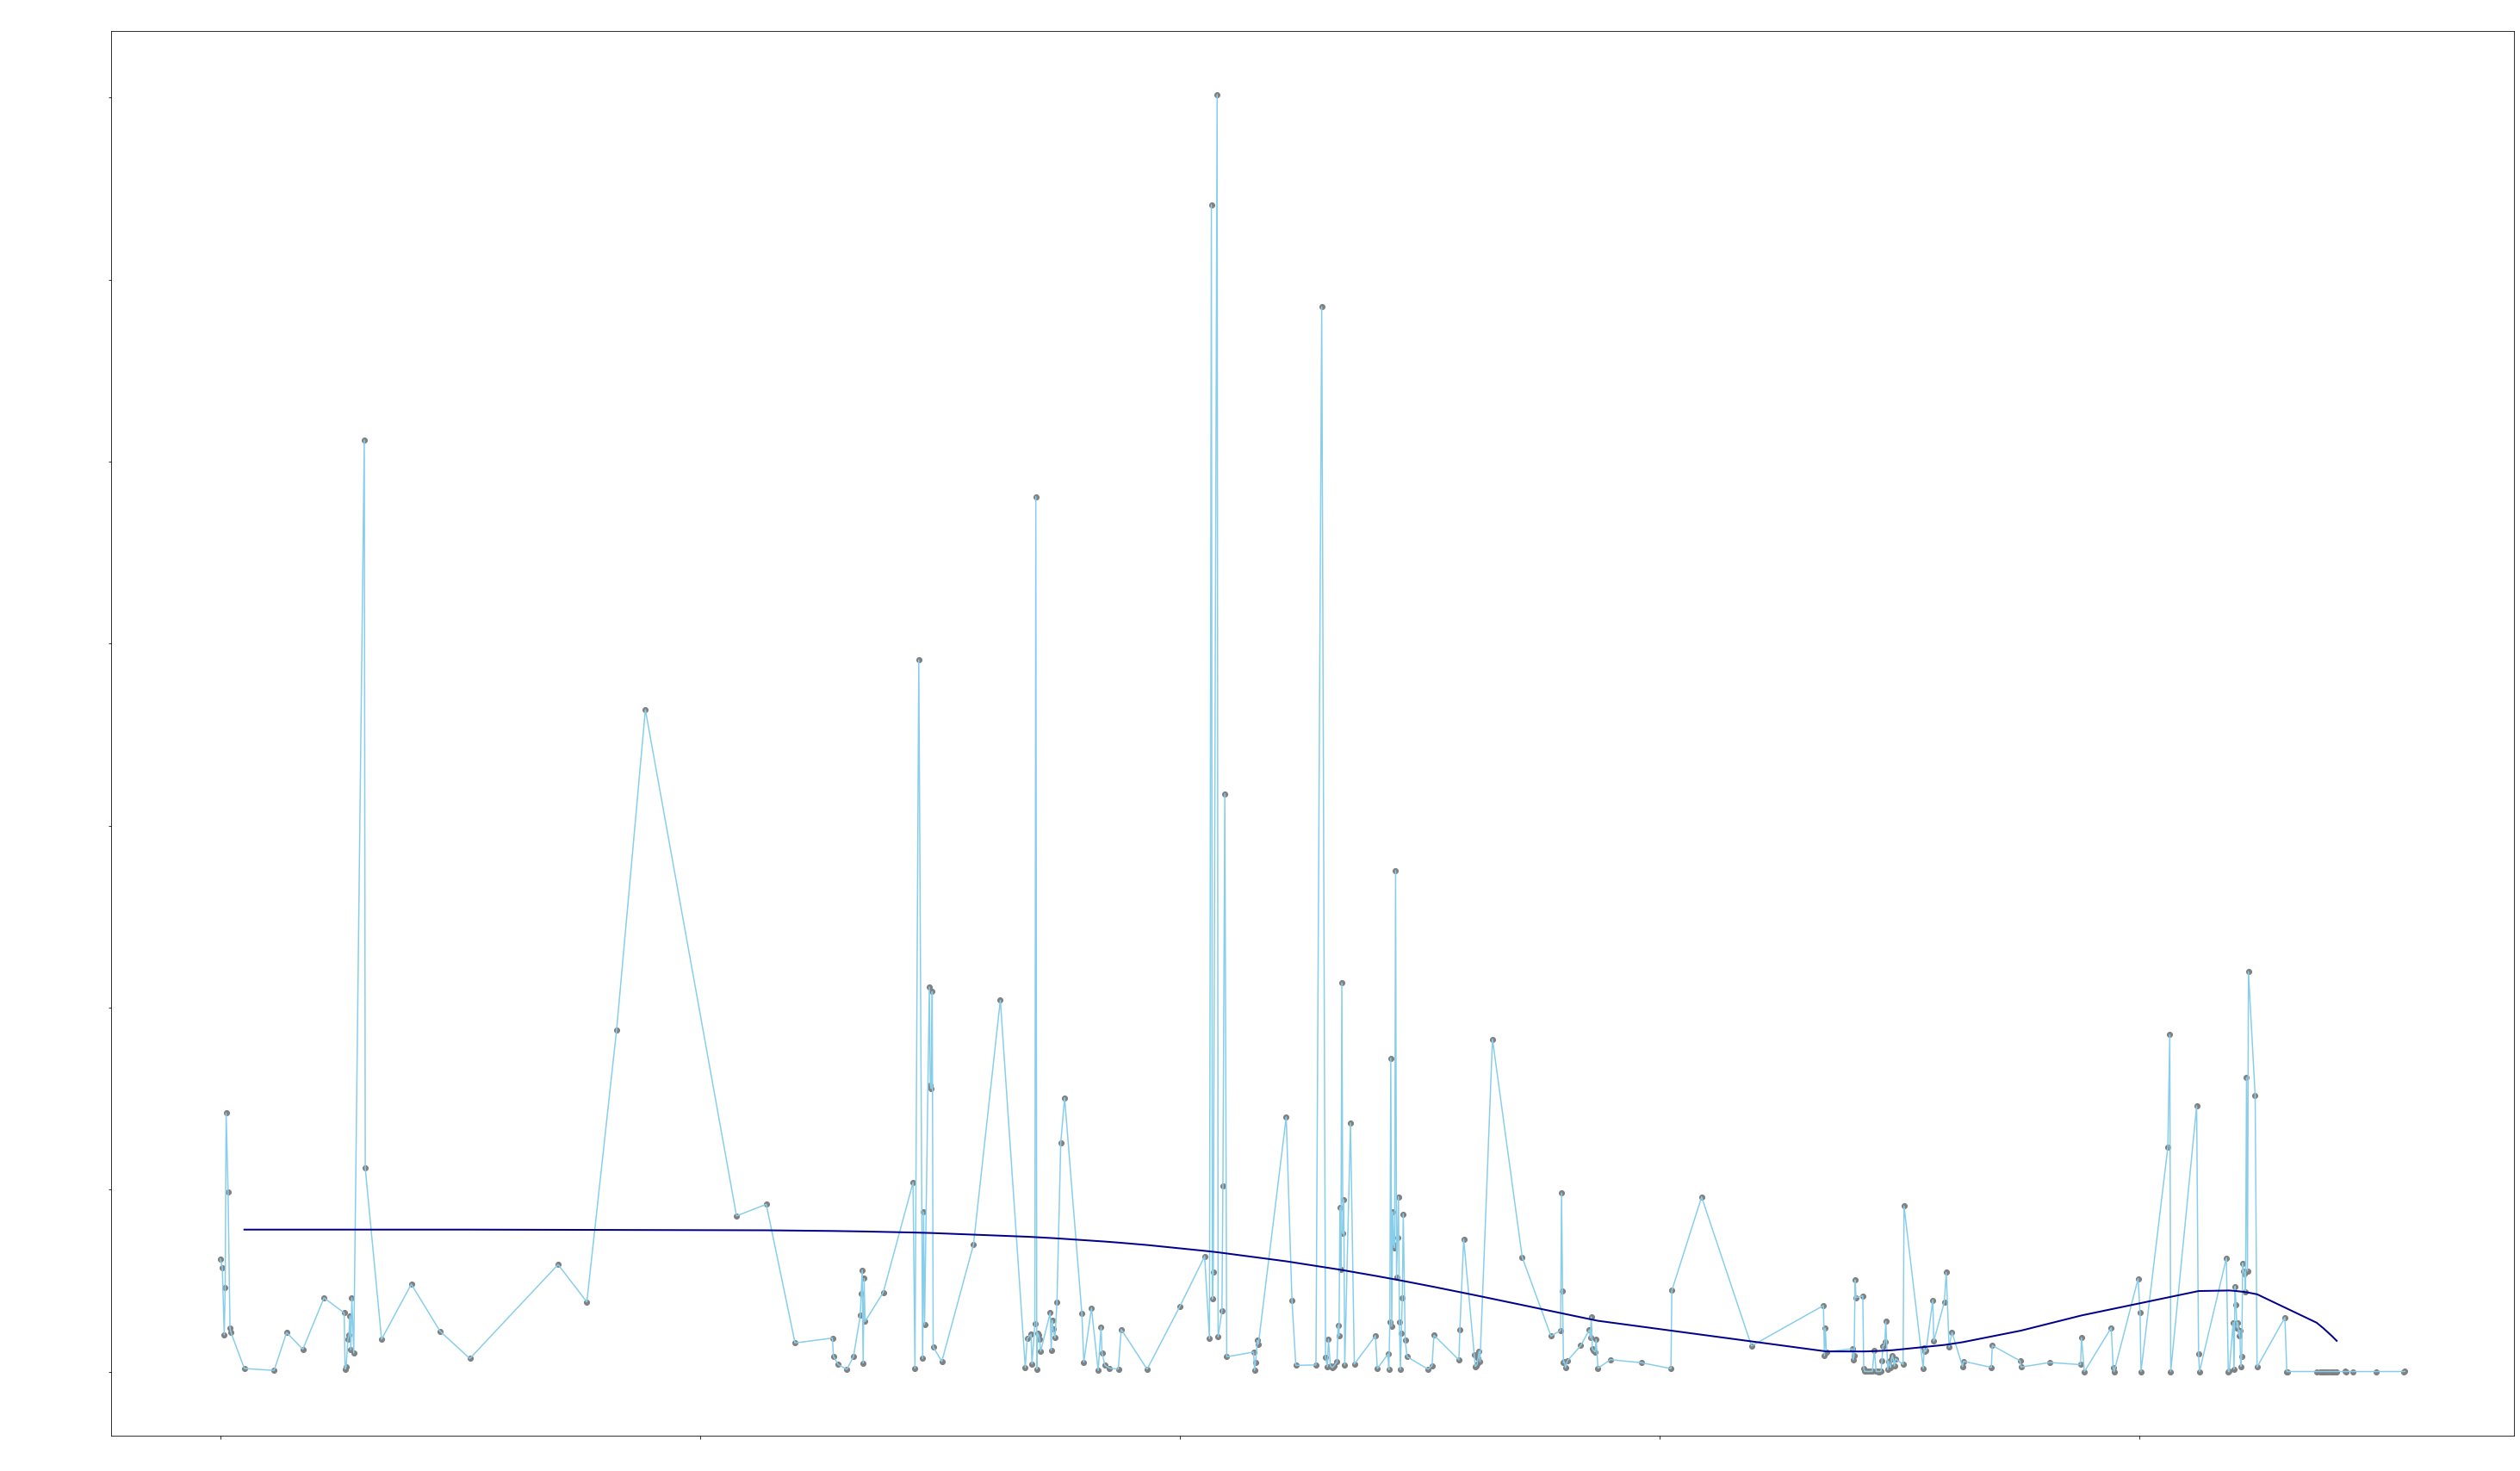

Linear Regressor performance:
Mean absolute error =  13561.82
Mean squared error =  257931466.17
Median absolute error =  13524.3
Explained variance score =  -0.92
R2 score =  -0.95


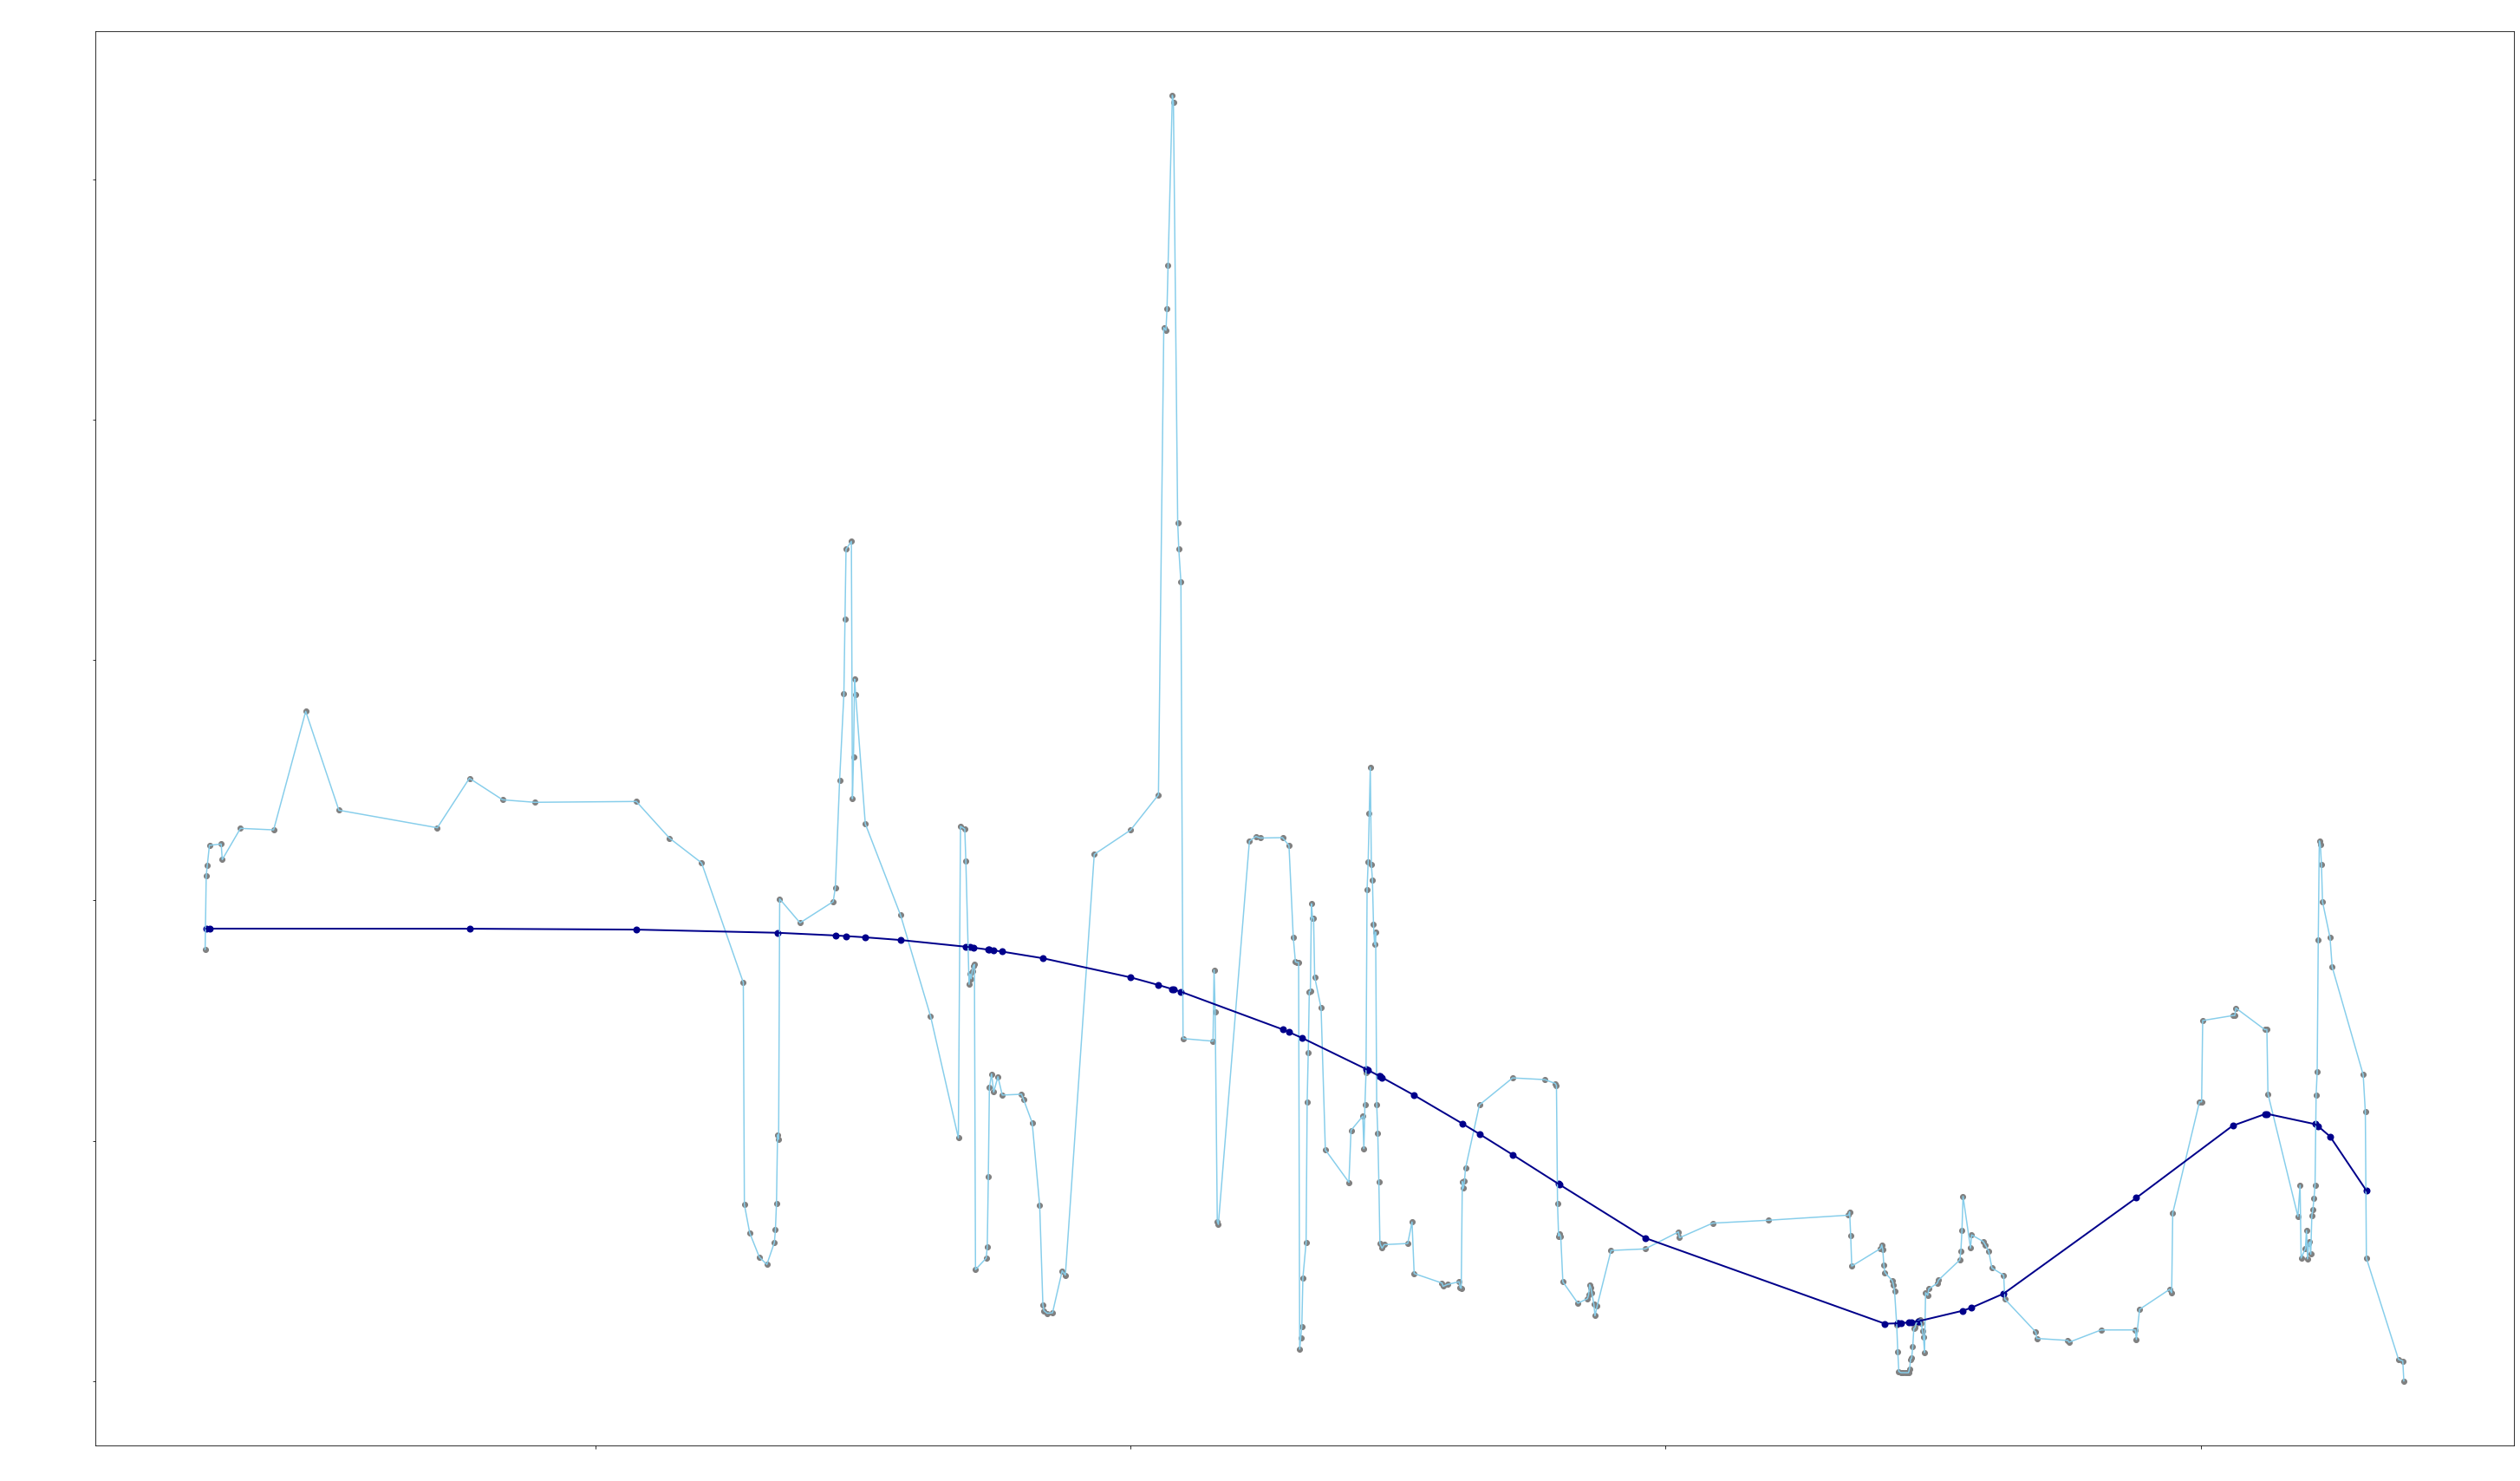

Linear Regressor performance:
Mean absolute error =  12186.9
Mean squared error =  175393436.17
Median absolute error =  13553.44
Explained variance score =  -1.59
R2 score =  -1.62


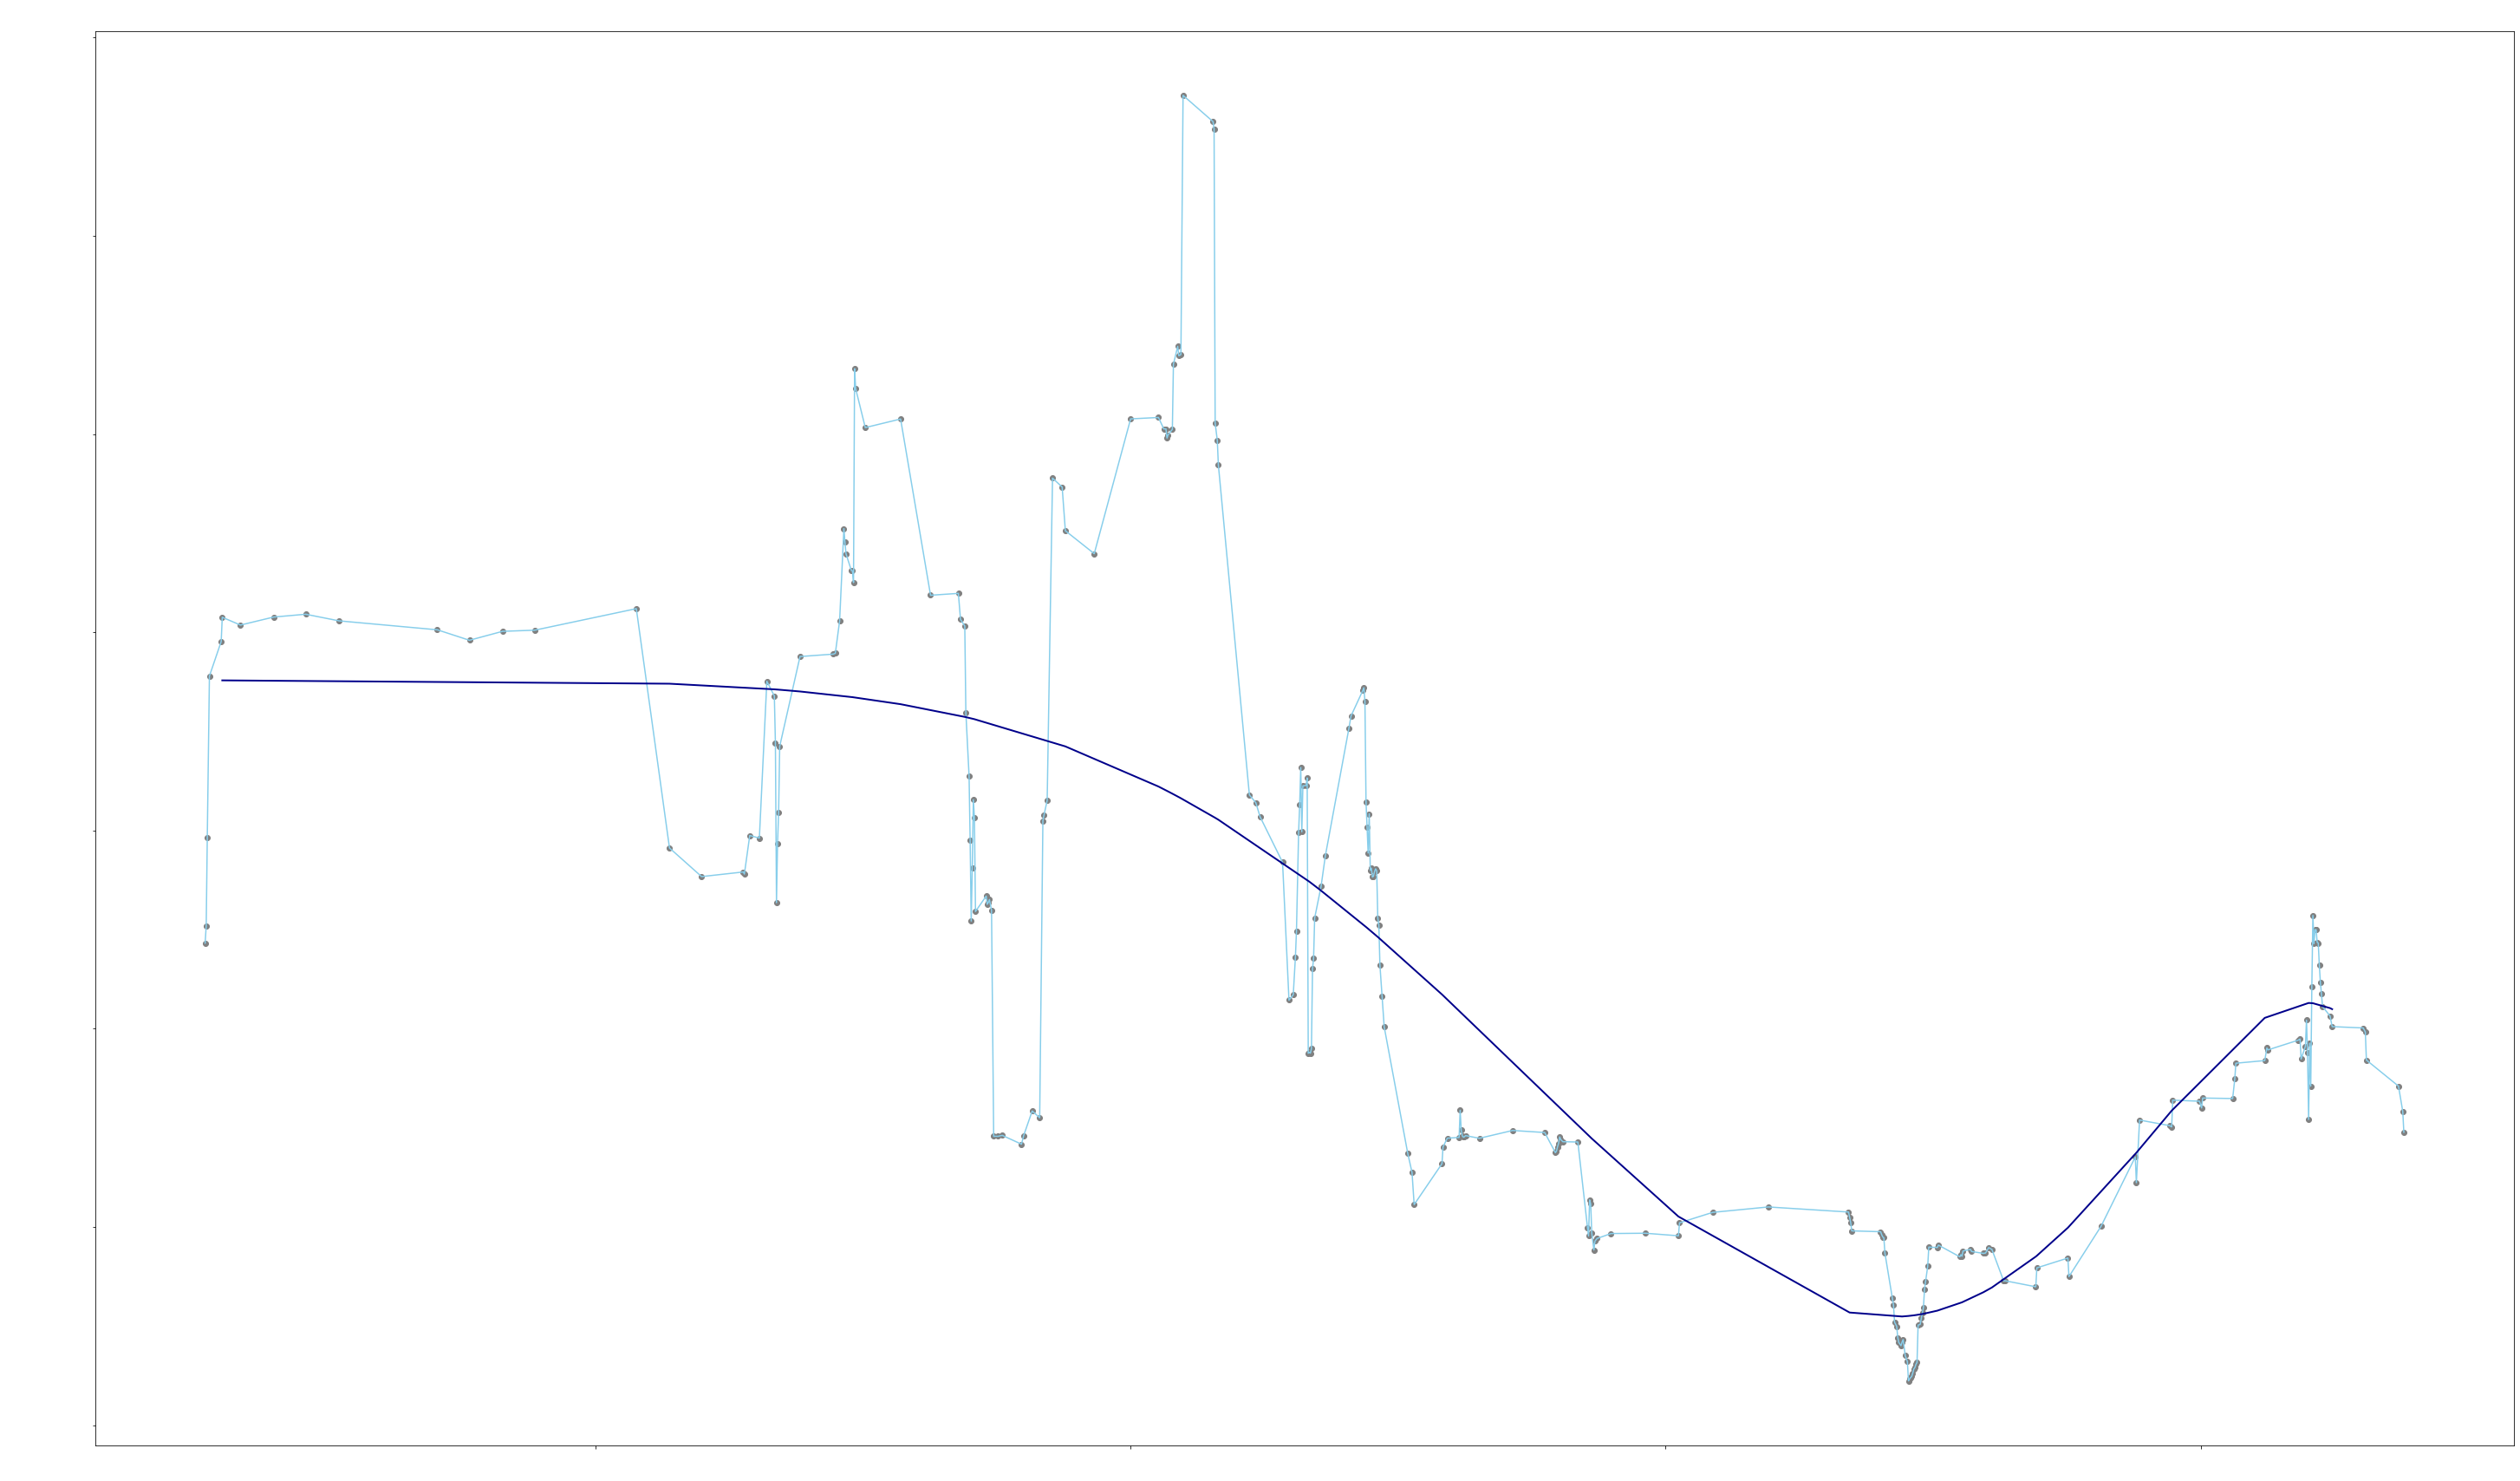

Linear Regressor performance:
Mean absolute error =  9550.12
Mean squared error =  121431806.99
Median absolute error =  11298.07
Explained variance score =  -2.36
R2 score =  -2.36


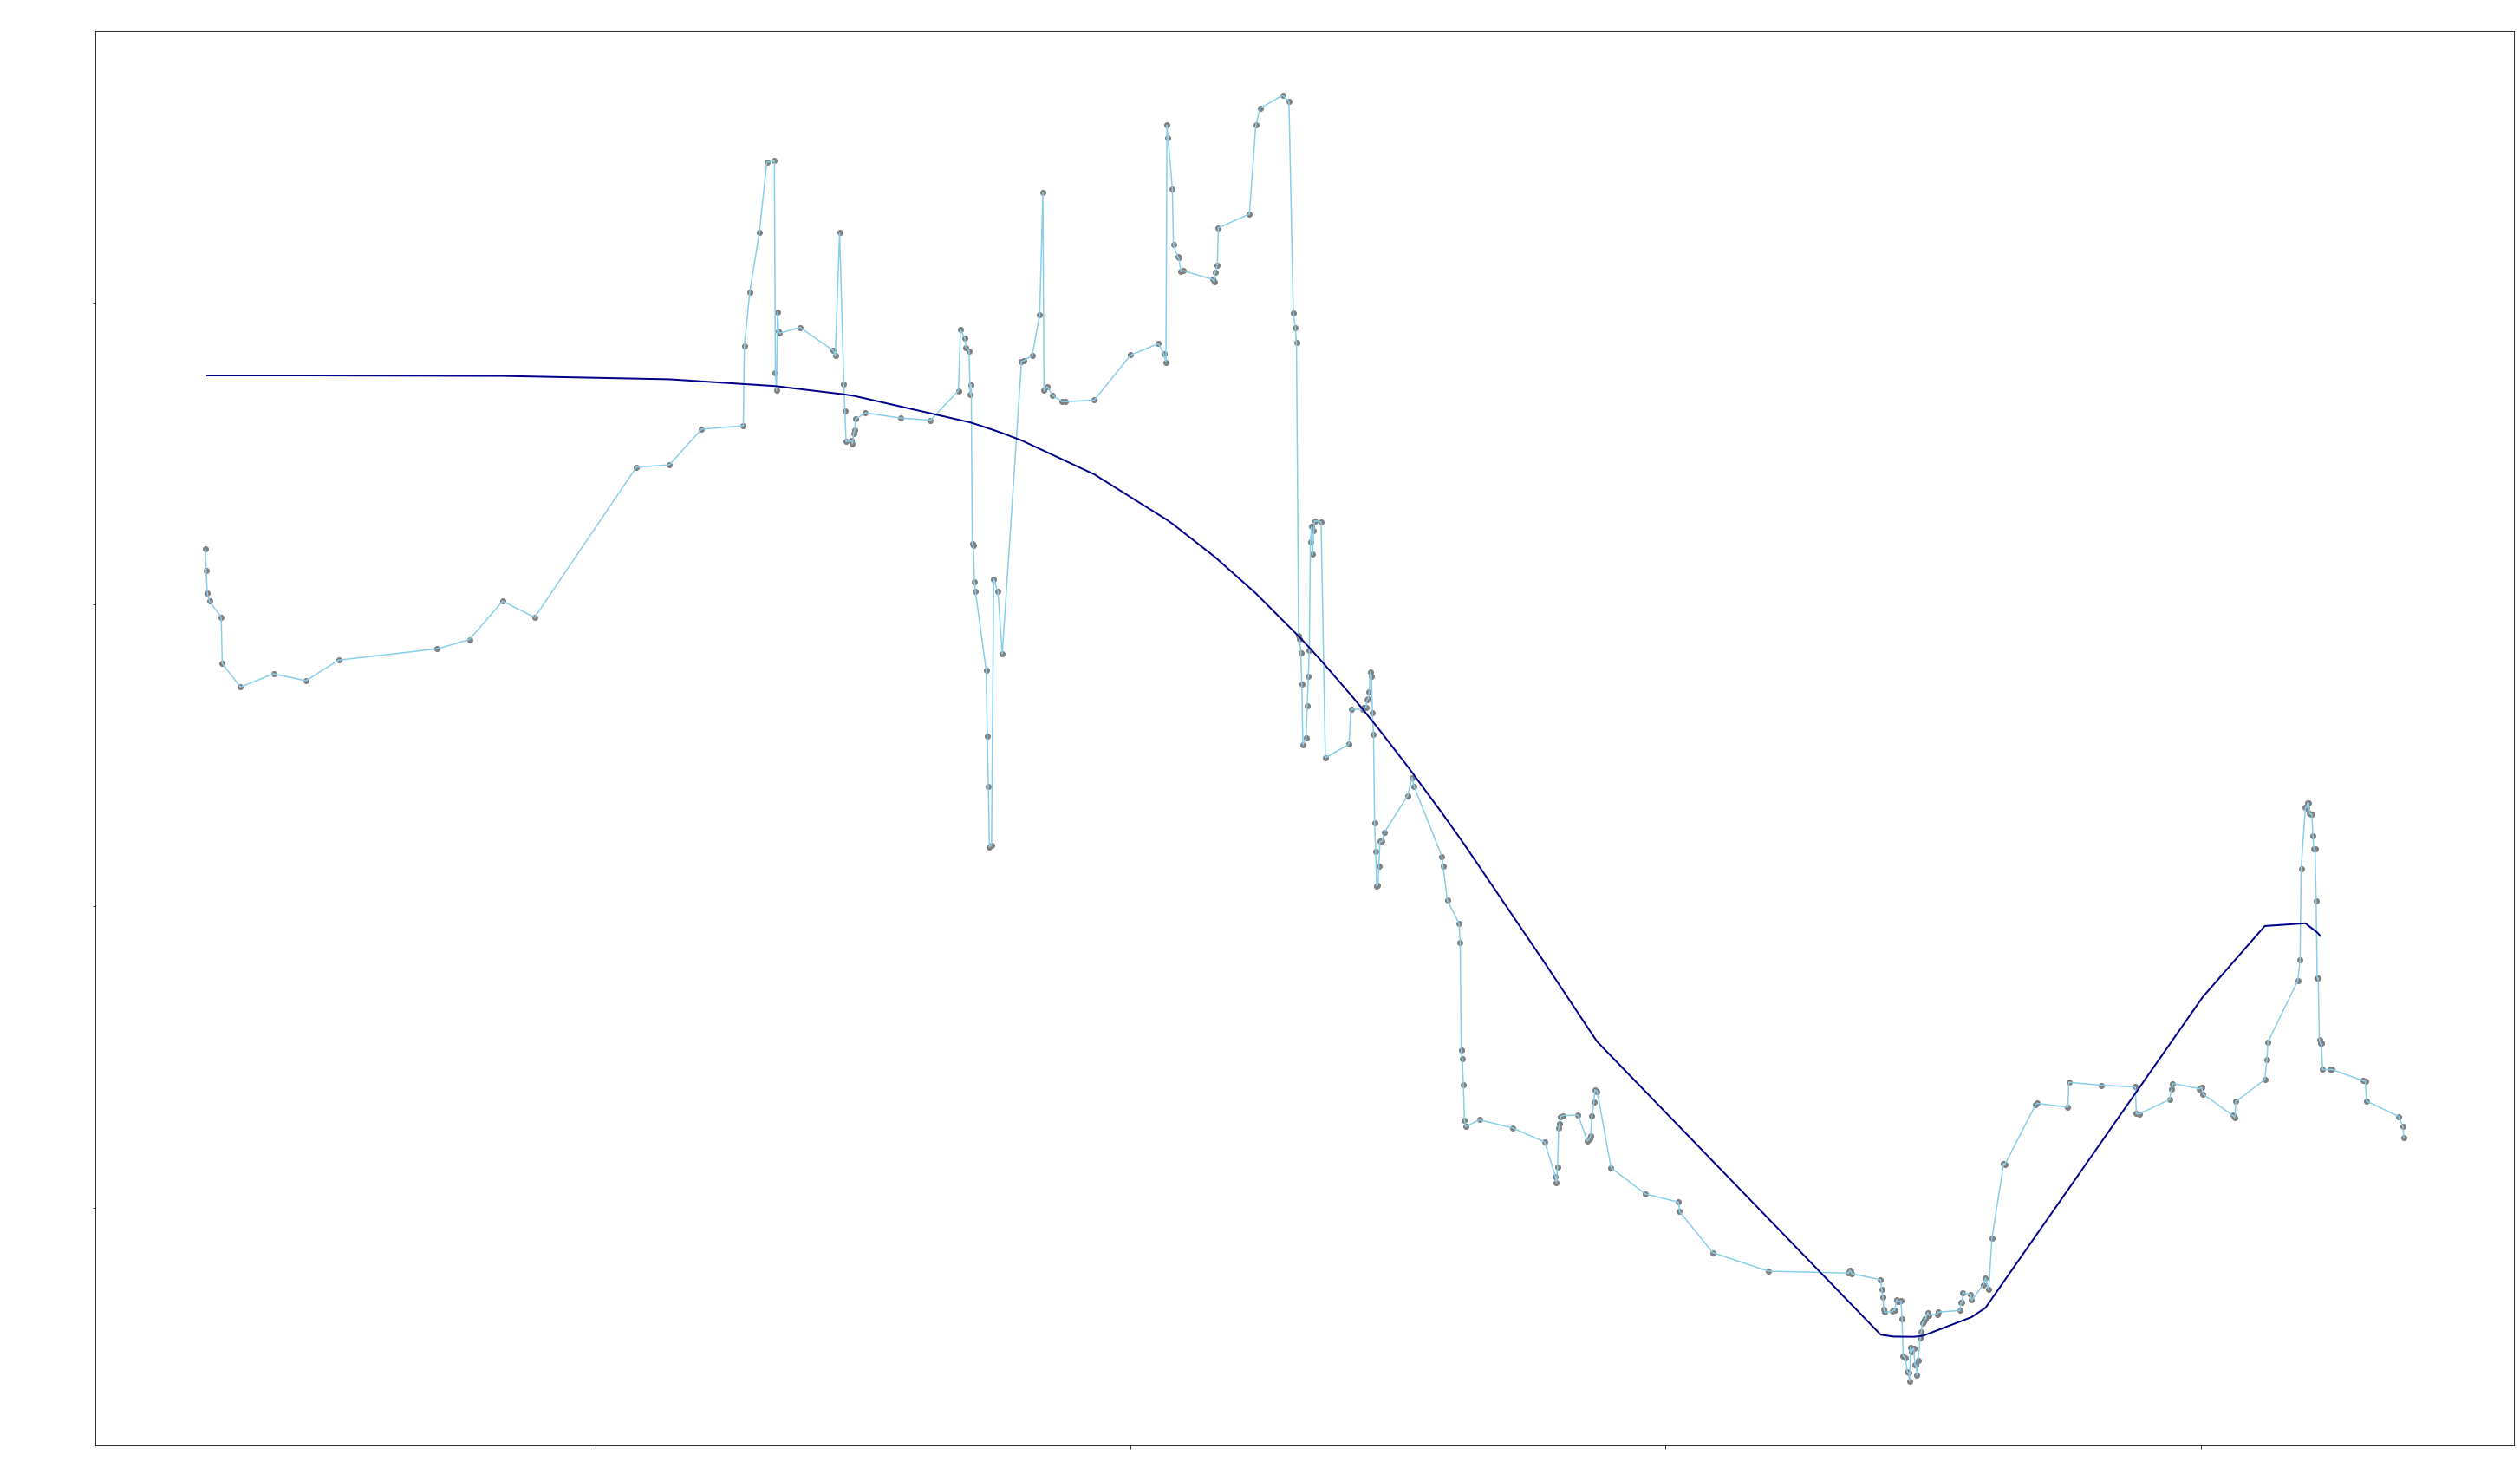

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 10 > ] ##########
polynomial = PolynomialFeatures(degree=10)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 10 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 10 > ] ##########
polynomial = PolynomialFeatures(degree=10)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 10 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')

plt.scatter(X_test, poly_y_predict, color='darkblue', linewidth = '2')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2',)


plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 10 > ] ##########
polynomial = PolynomialFeatures(degree=10)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 10 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 10 > ] ##########
polynomial = PolynomialFeatures(degree=10)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 3 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

THE REGRESSION WITH DEGREE = 30

Linear Regressor performance:
Mean absolute error =  16570.42
Mean squared error =  983572450.4
Median absolute error =  11516.52
Explained variance score =  -0.34
R2 score =  -0.35


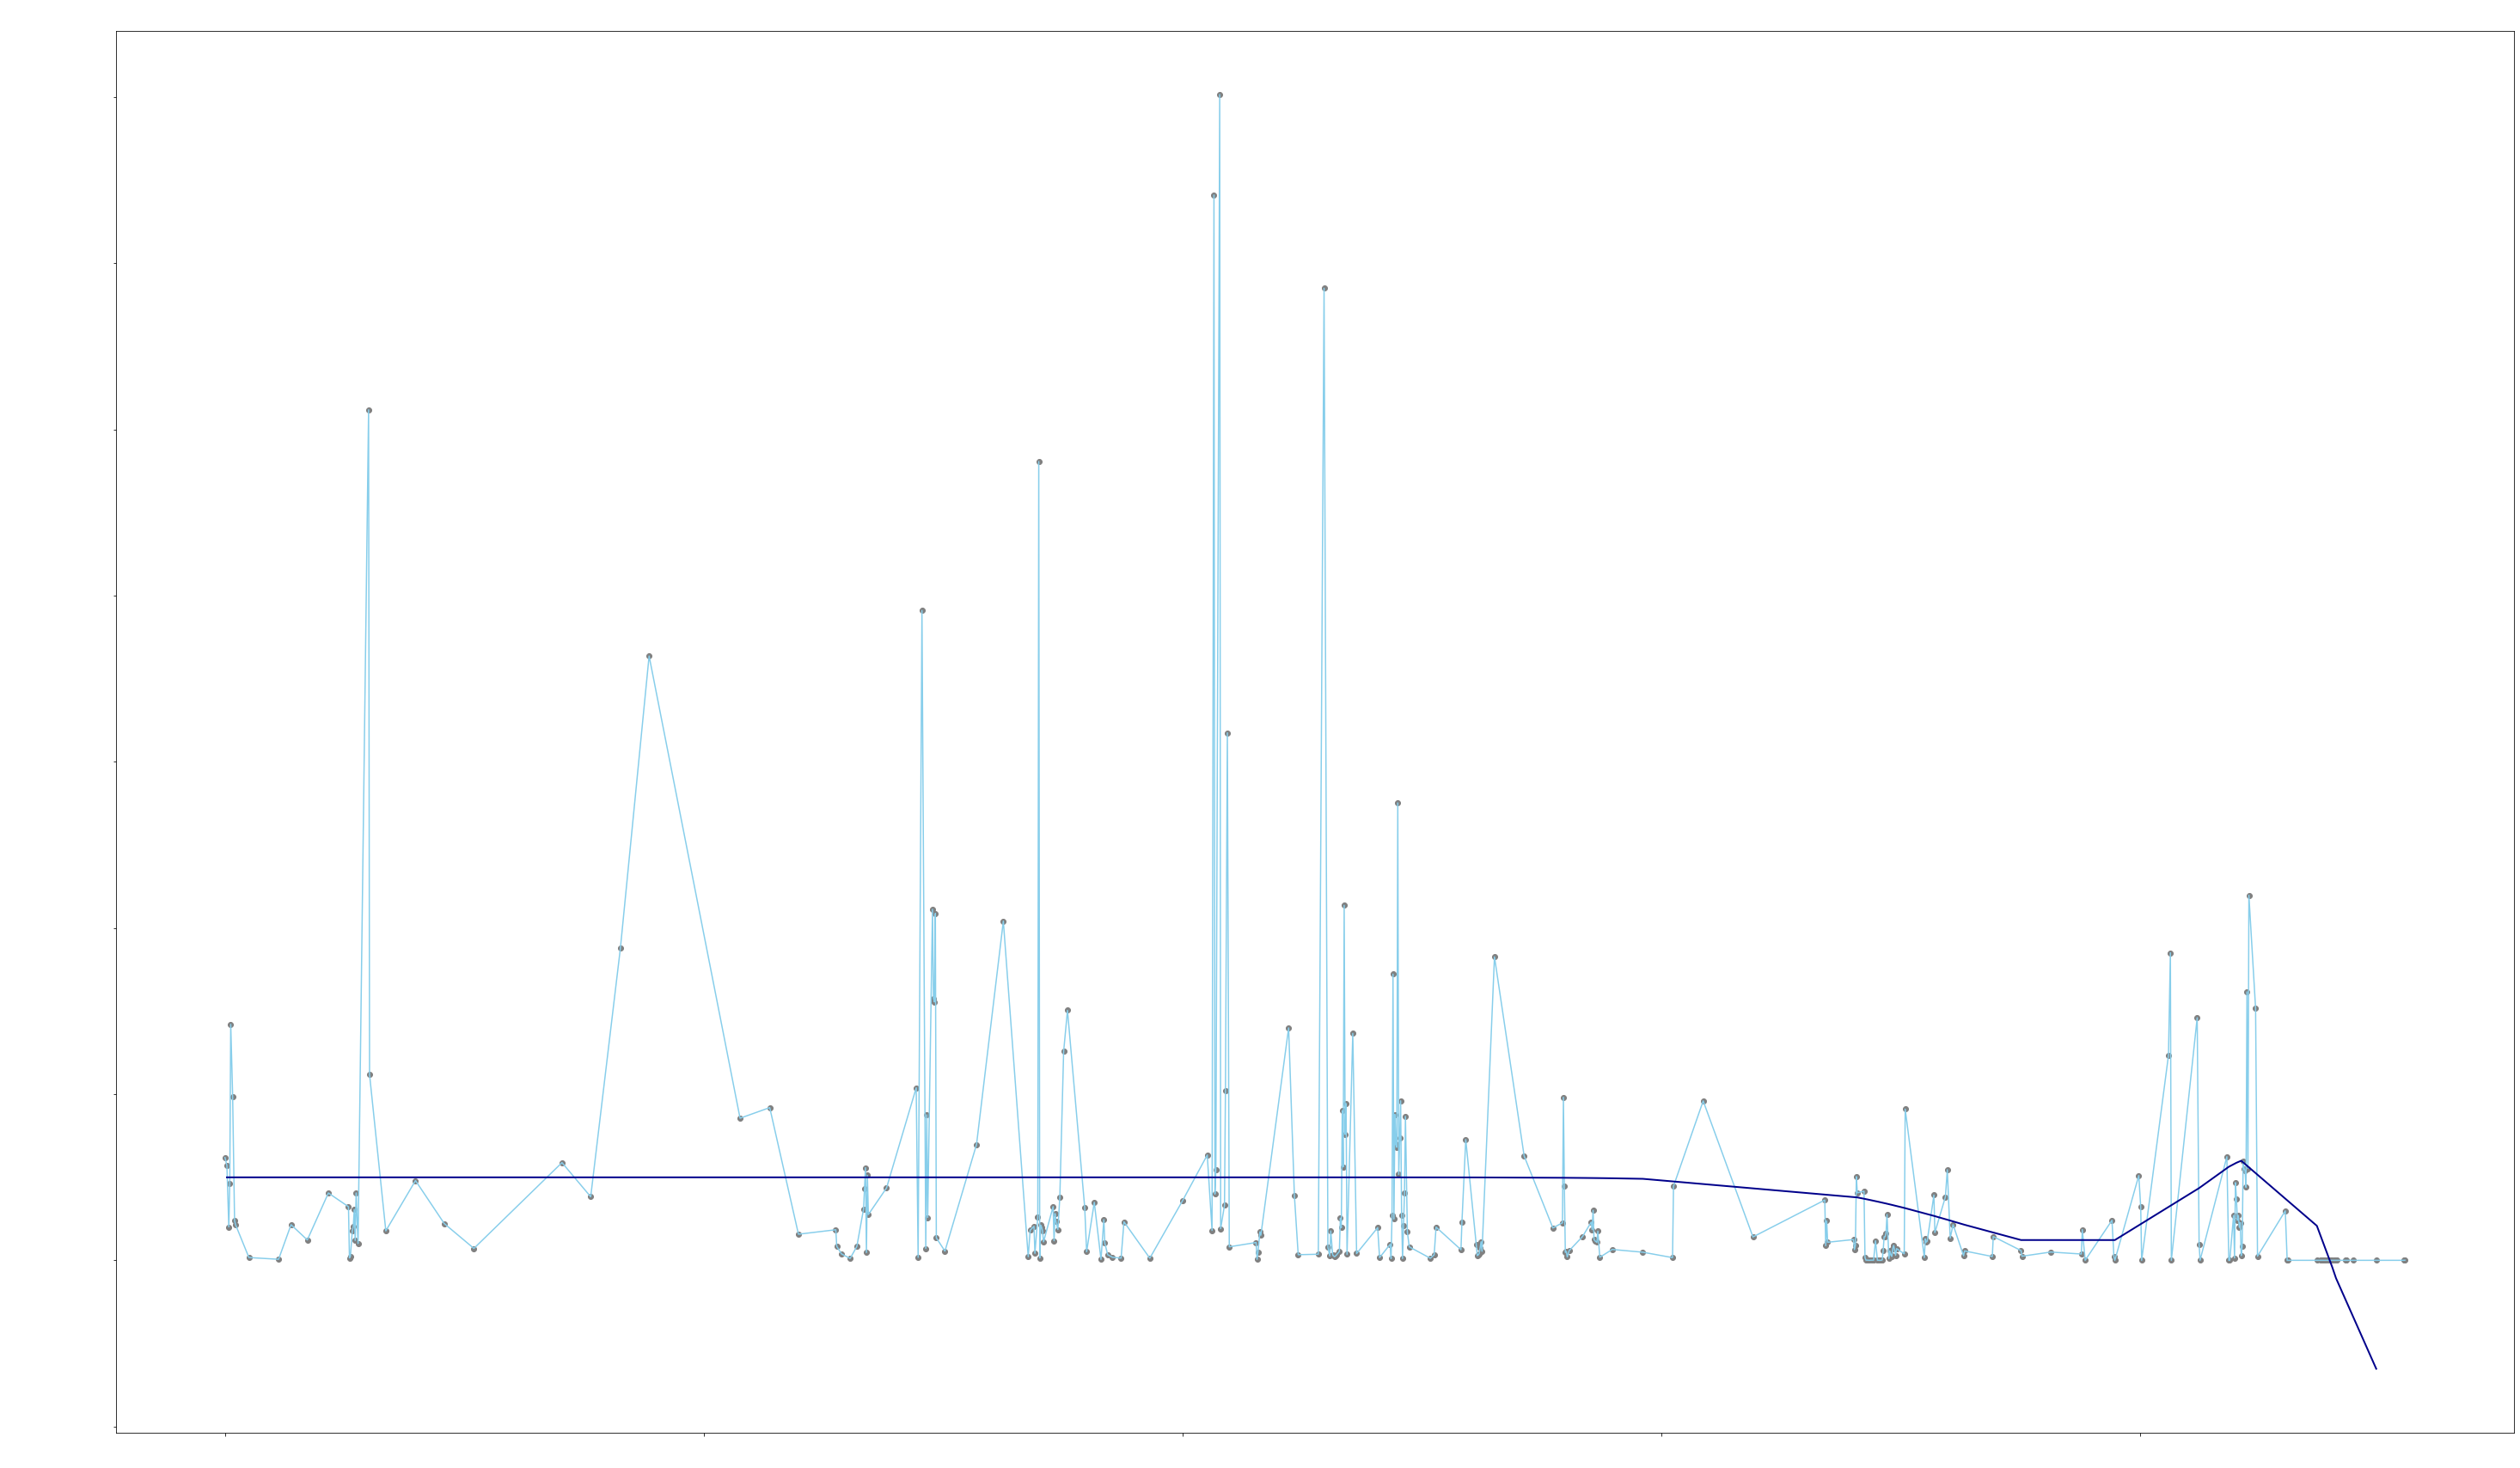

Linear Regressor performance:
Mean absolute error =  12001.04
Mean squared error =  207992359.98
Median absolute error =  9639.75
Explained variance score =  -0.51
R2 score =  -0.53


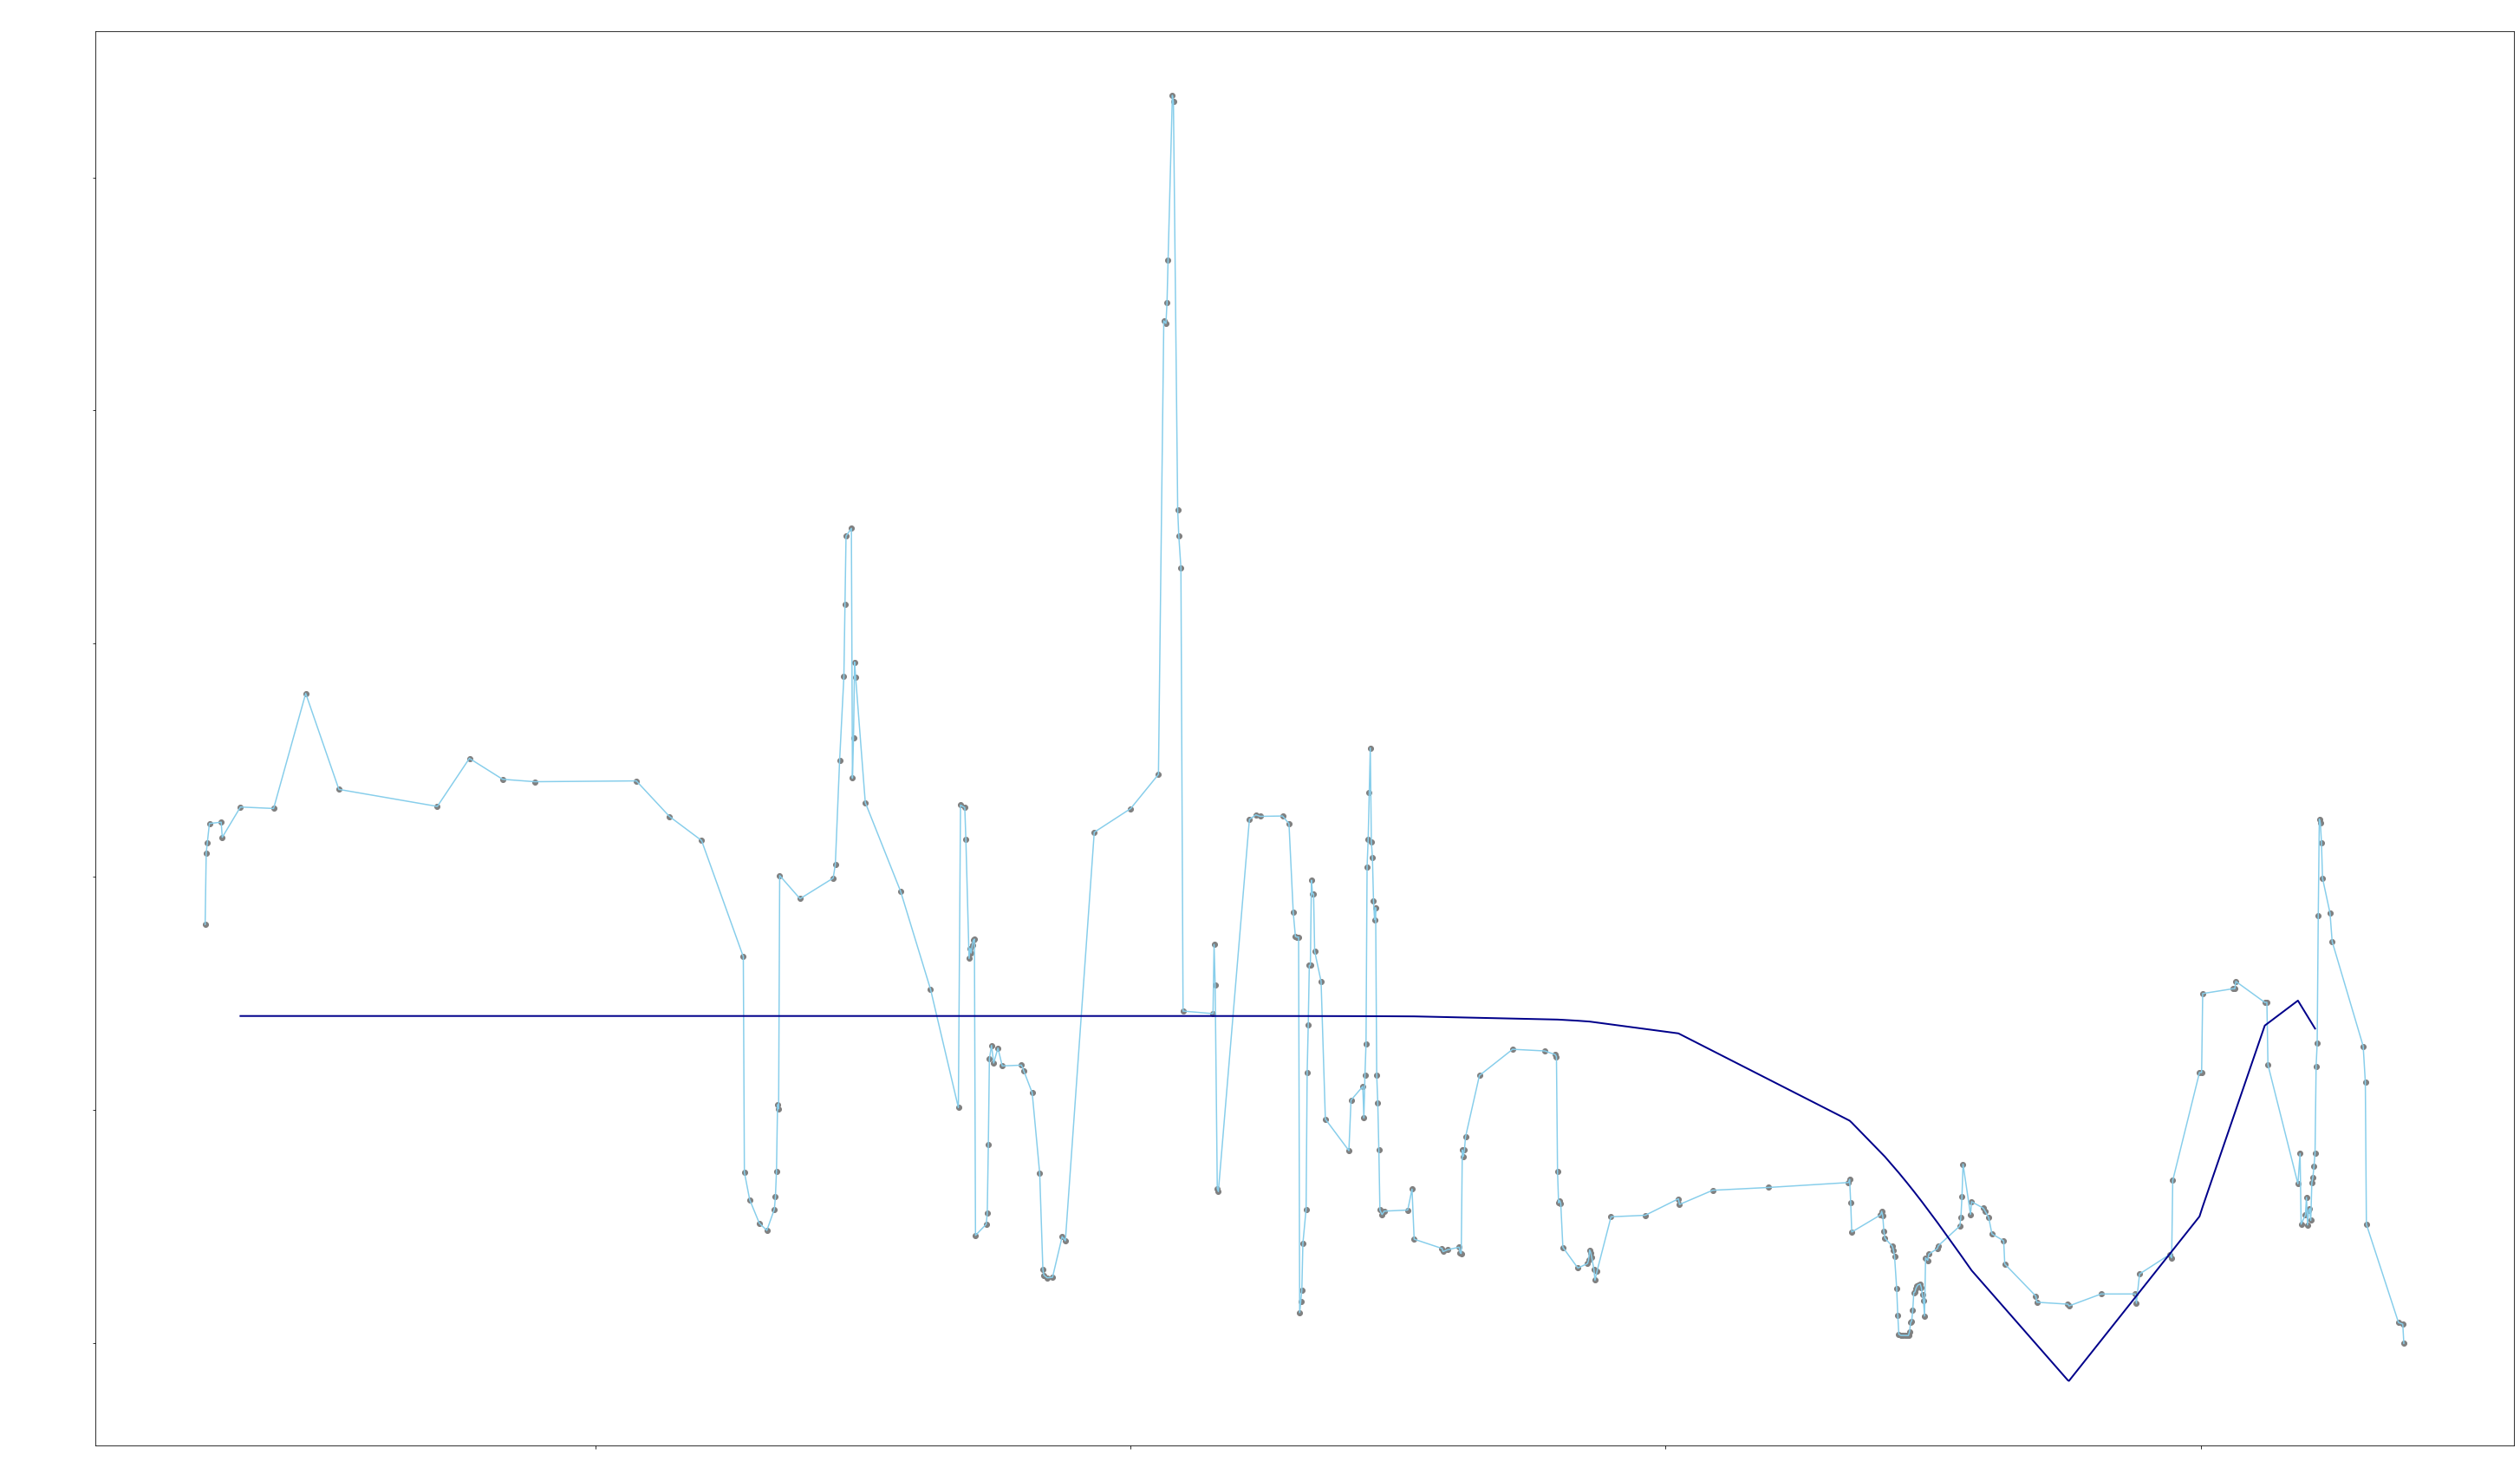

Linear Regressor performance:
Mean absolute error =  8925.26
Mean squared error =  94770710.35
Median absolute error =  10016.07
Explained variance score =  -1.35
R2 score =  -1.42


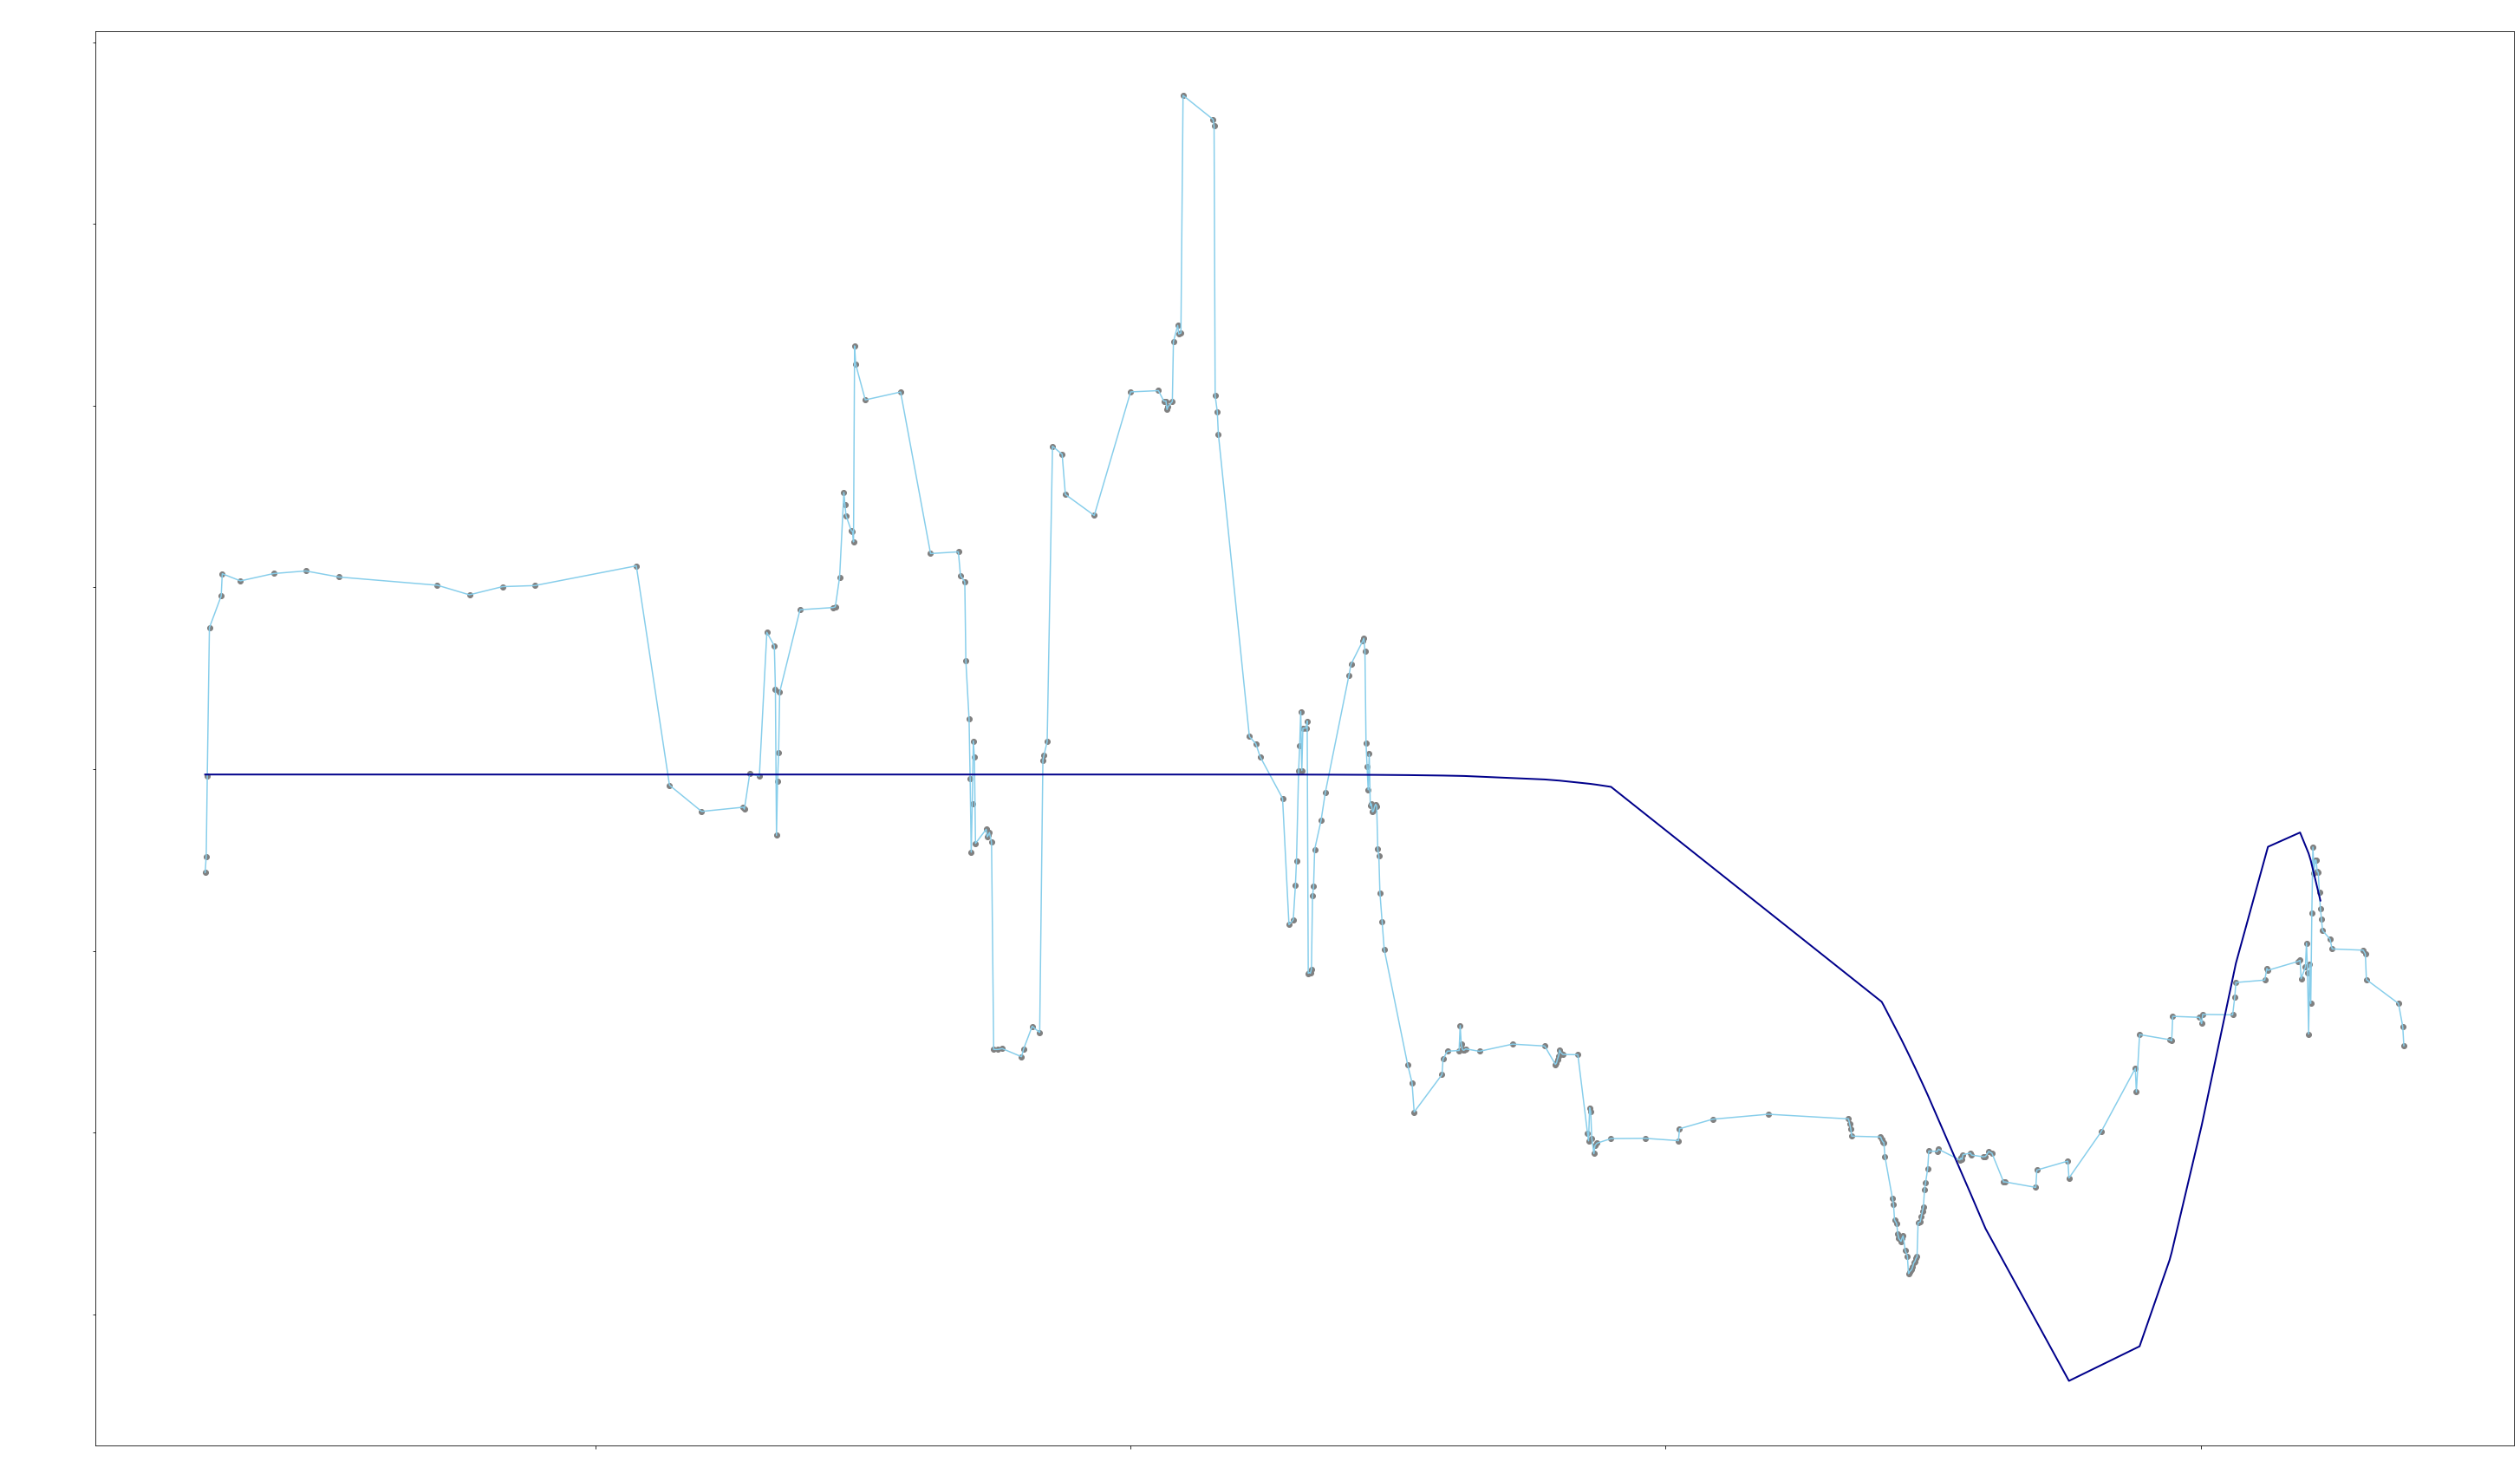

Linear Regressor performance:
Mean absolute error =  8298.65
Mean squared error =  95733019.74
Median absolute error =  9037.13
Explained variance score =  -1.29
R2 score =  -1.3


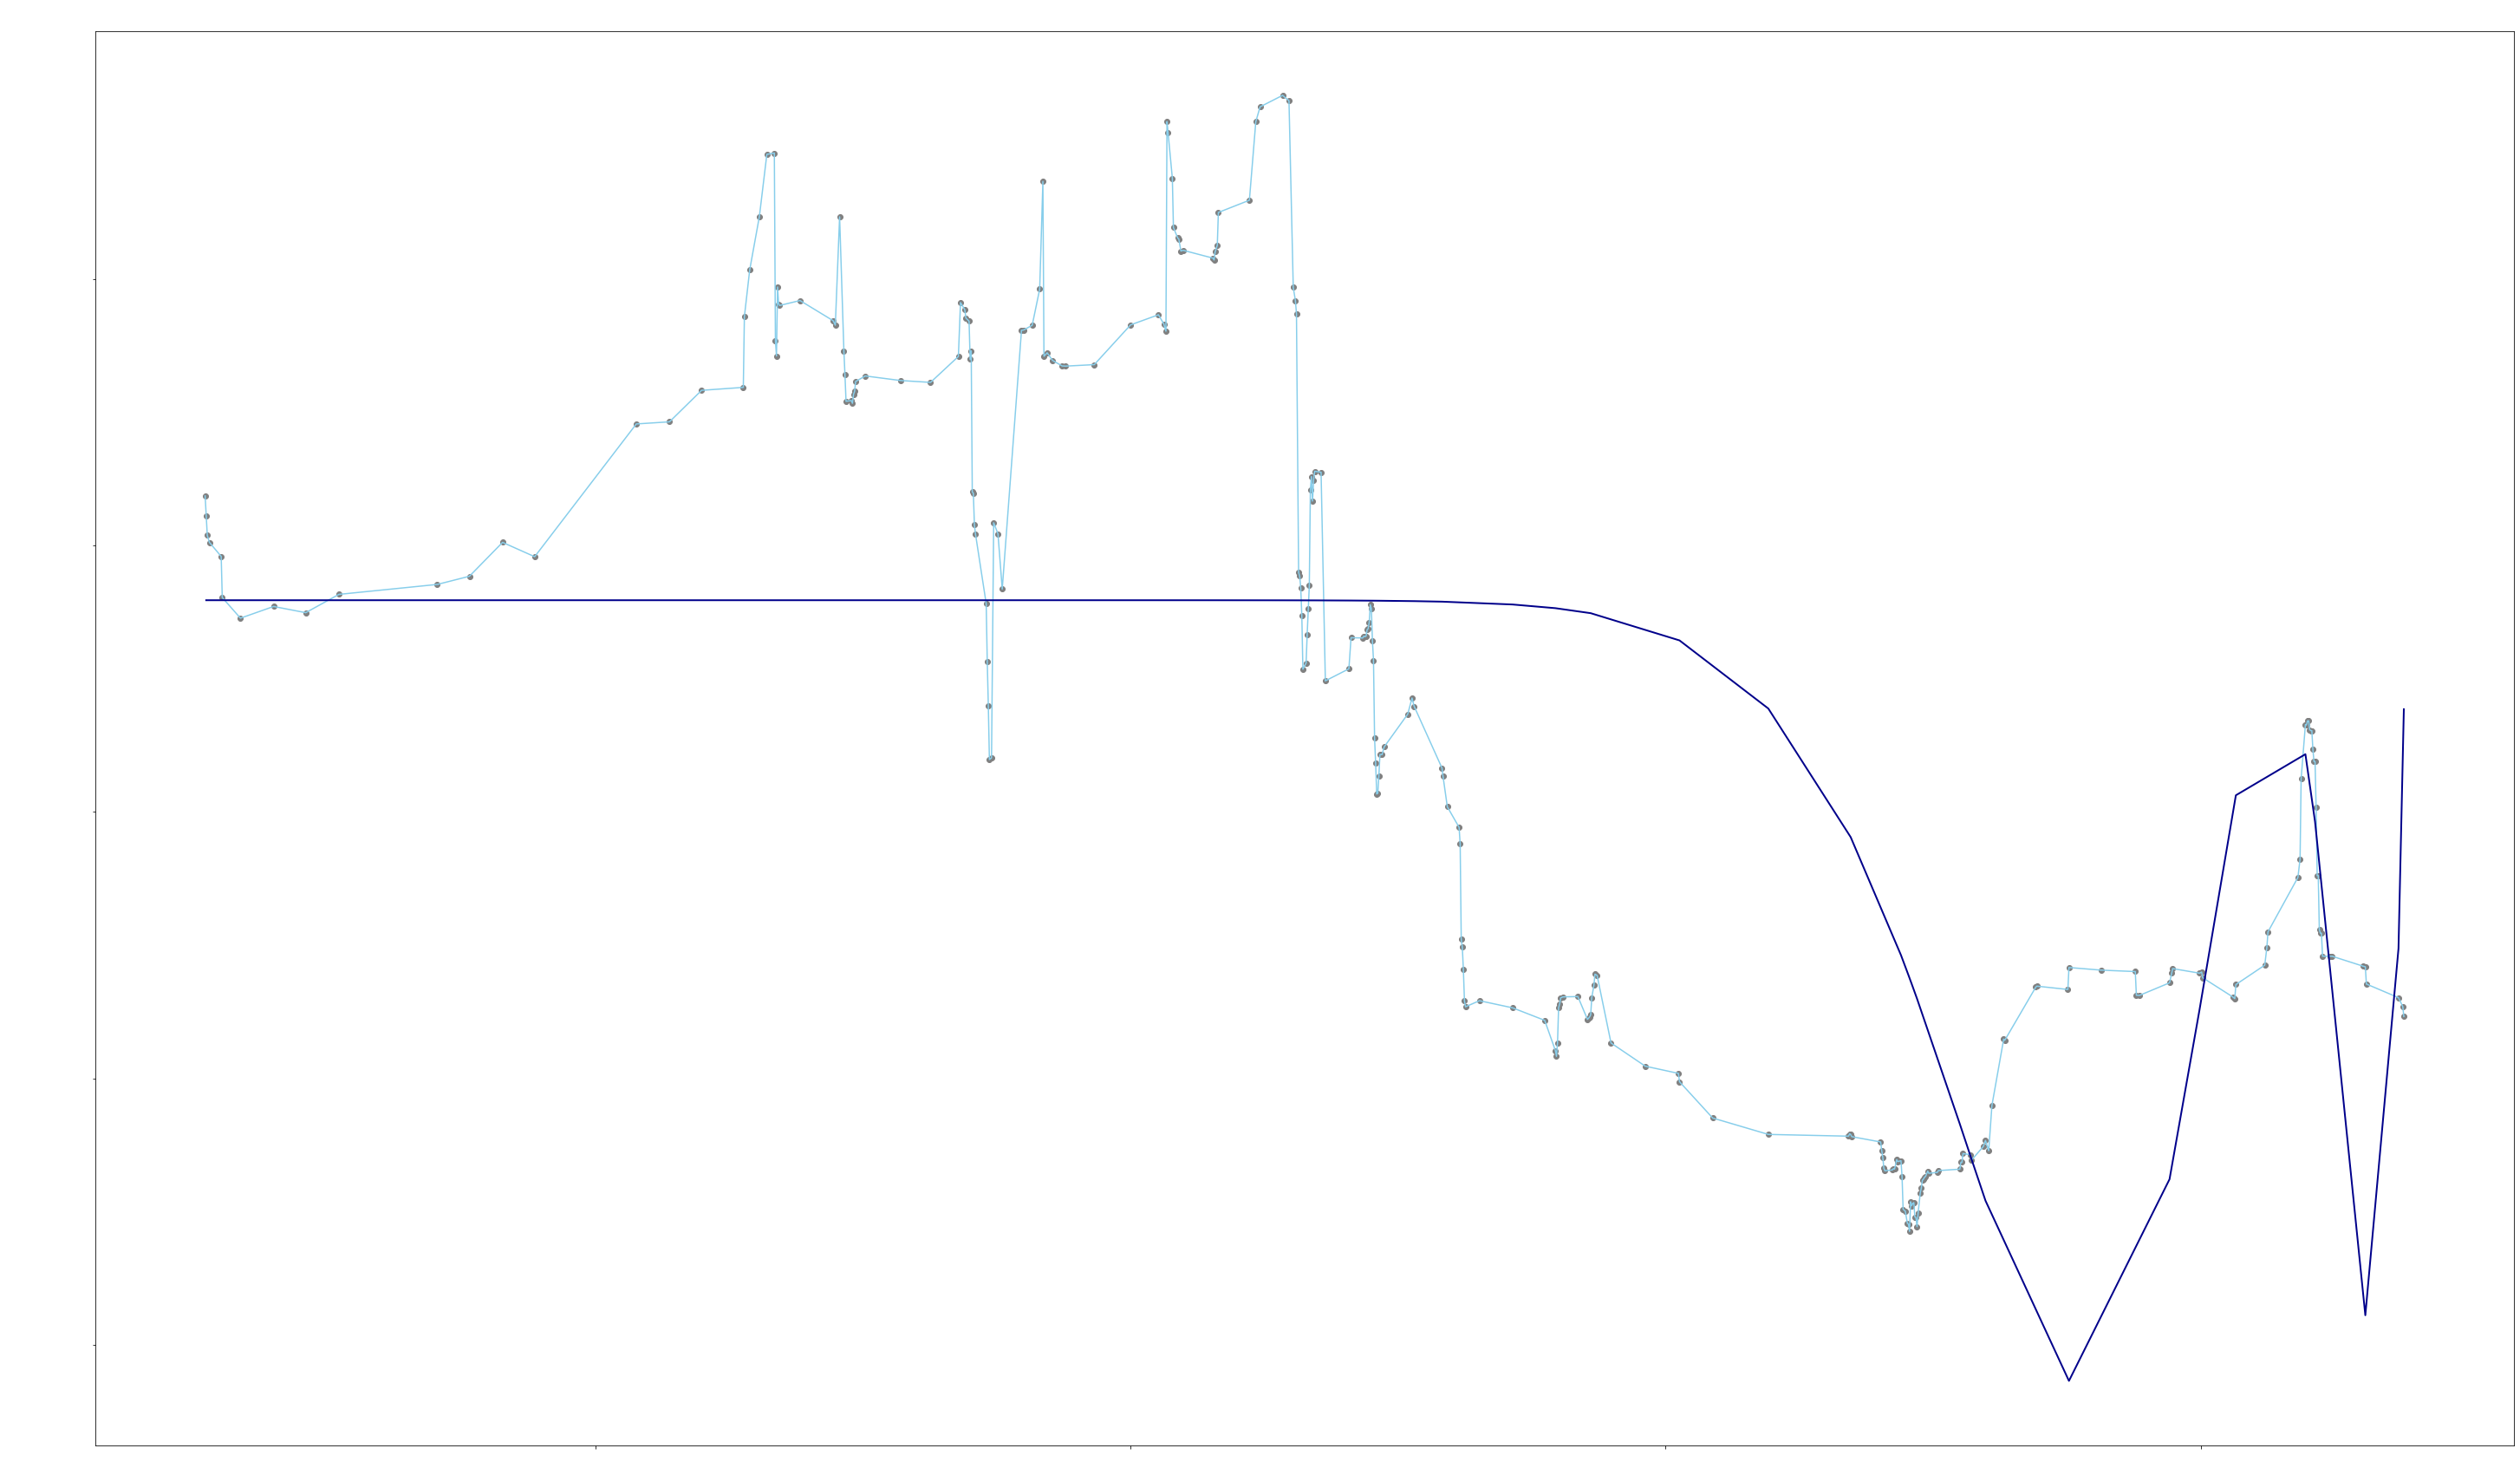

Linear Regressor performance:
Mean absolute error =  21837.11
Mean squared error =  1693749109.56
Median absolute error =  10168.16
Explained variance score =  -0.18
R2 score =  -0.29


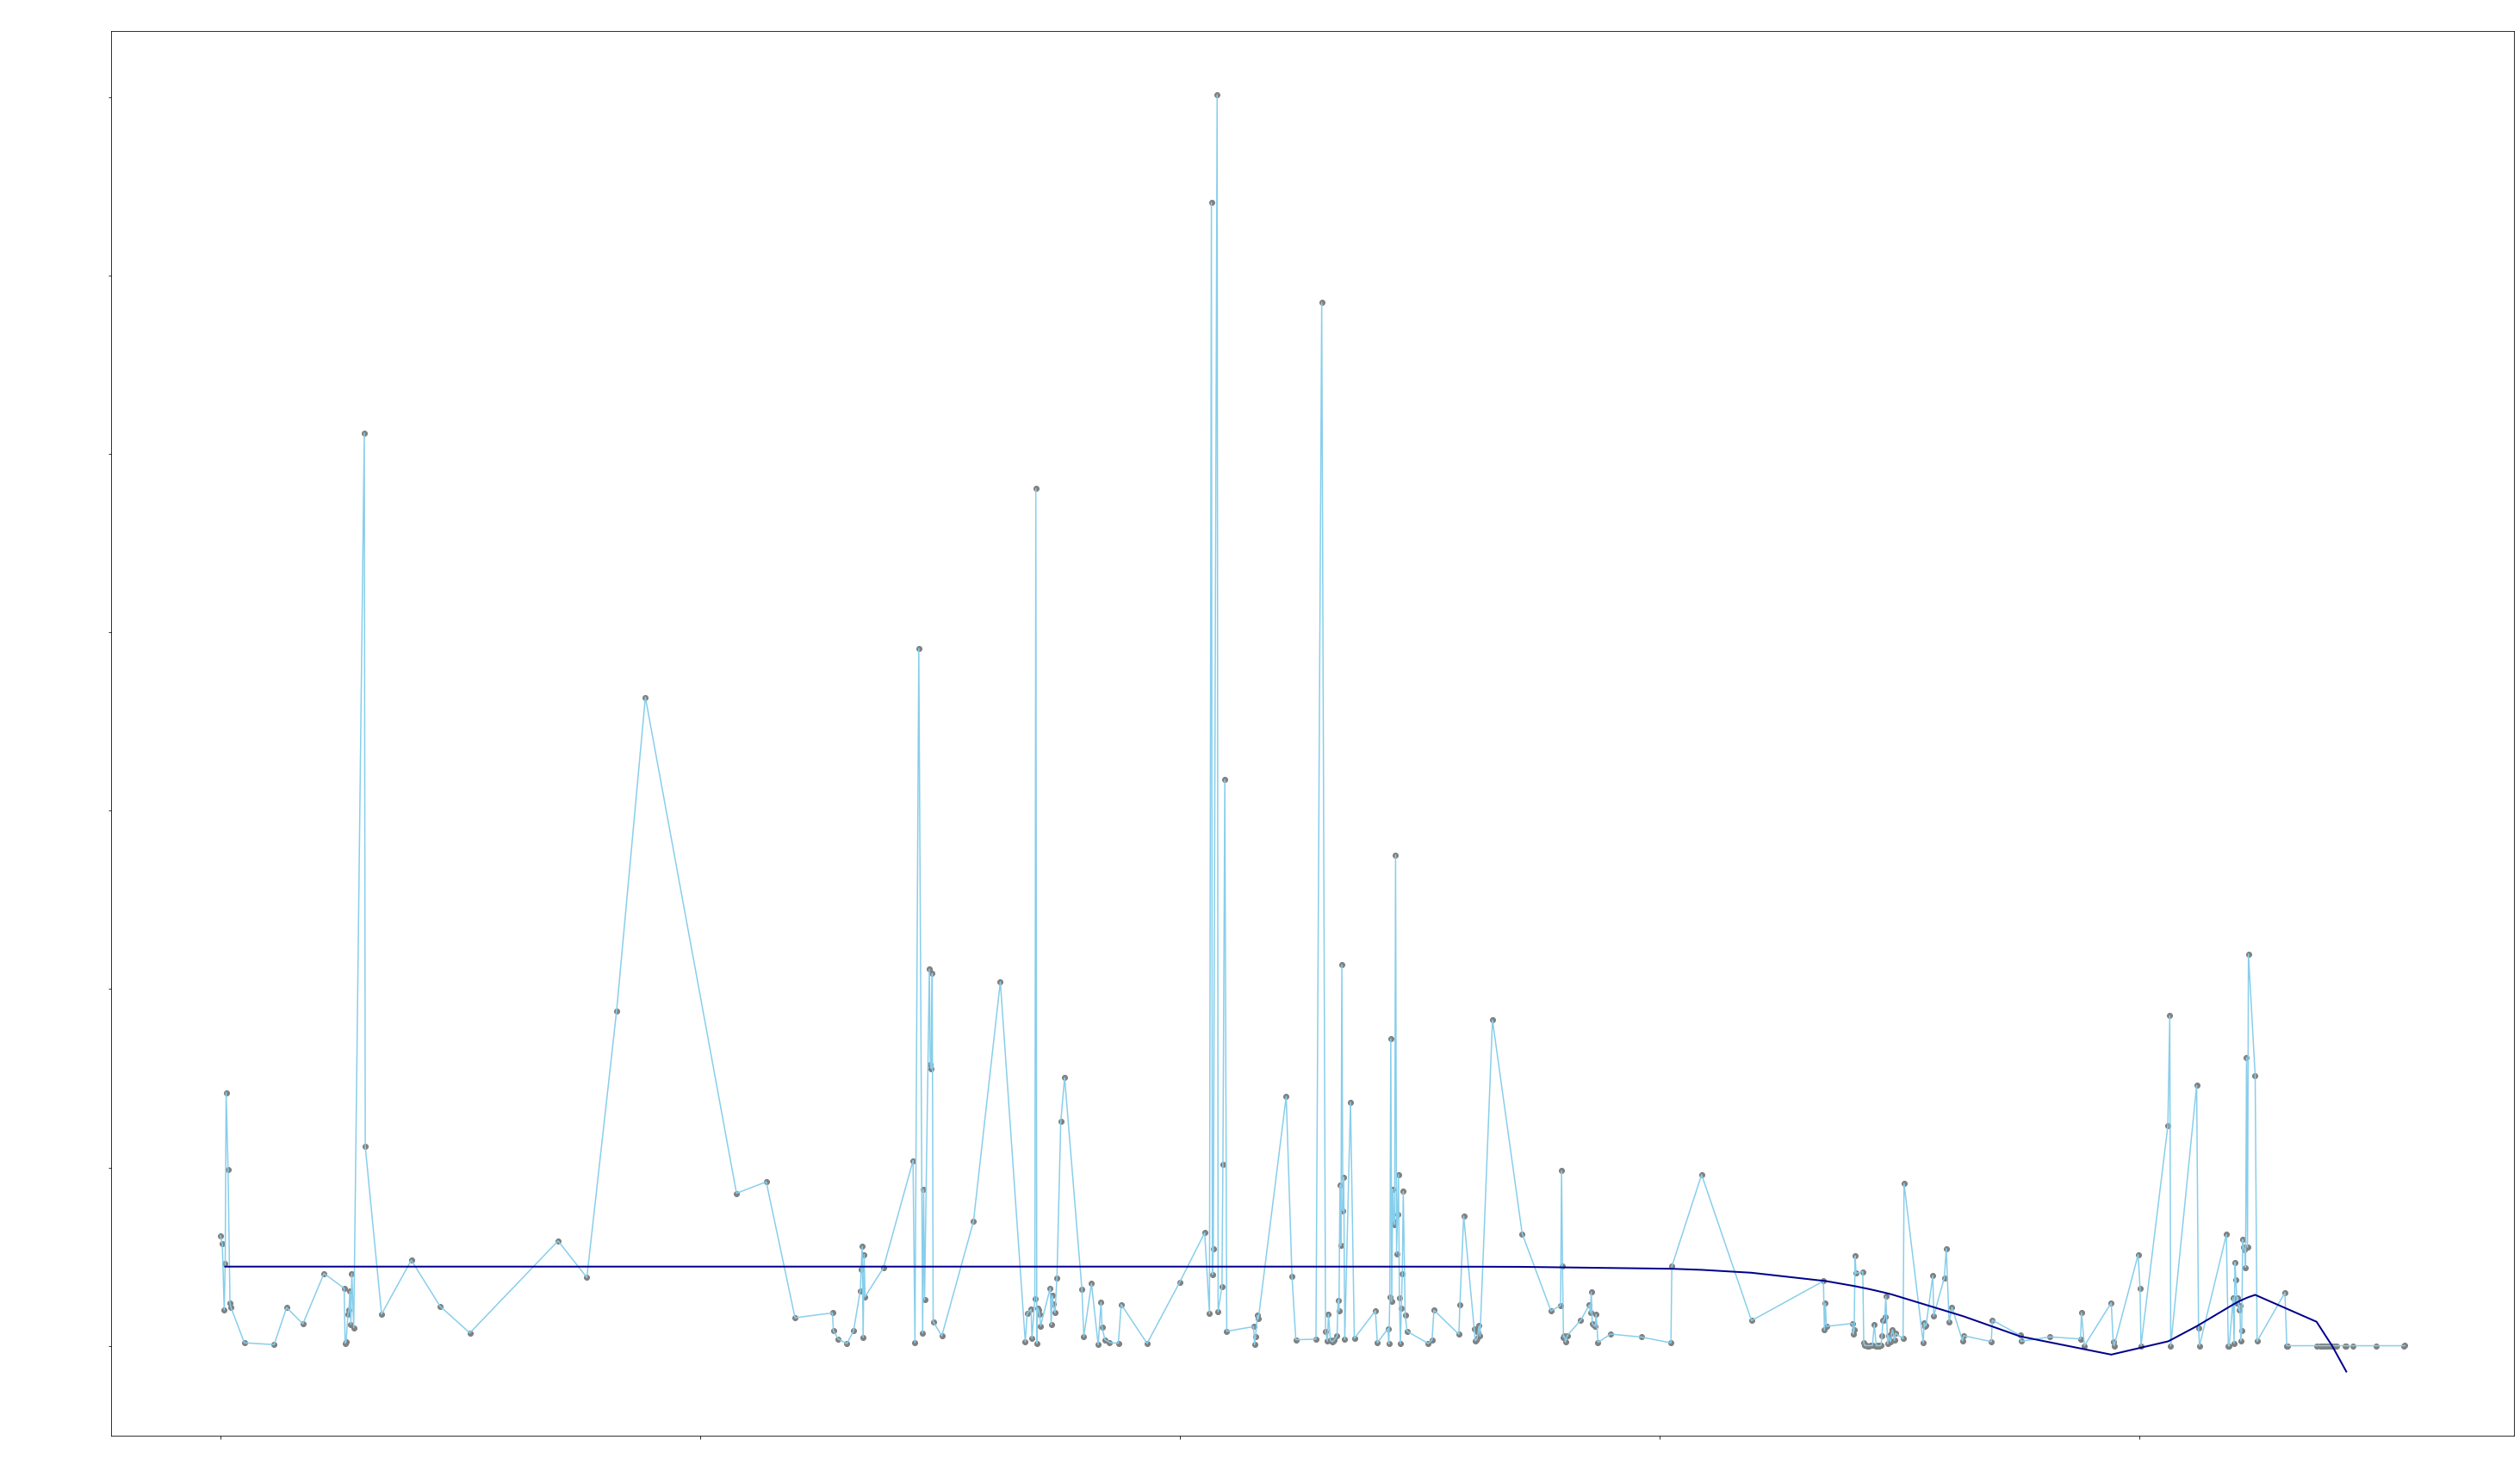

Linear Regressor performance:
Mean absolute error =  10370.39
Mean squared error =  137532411.1
Median absolute error =  10004.38
Explained variance score =  -0.57
R2 score =  -0.58


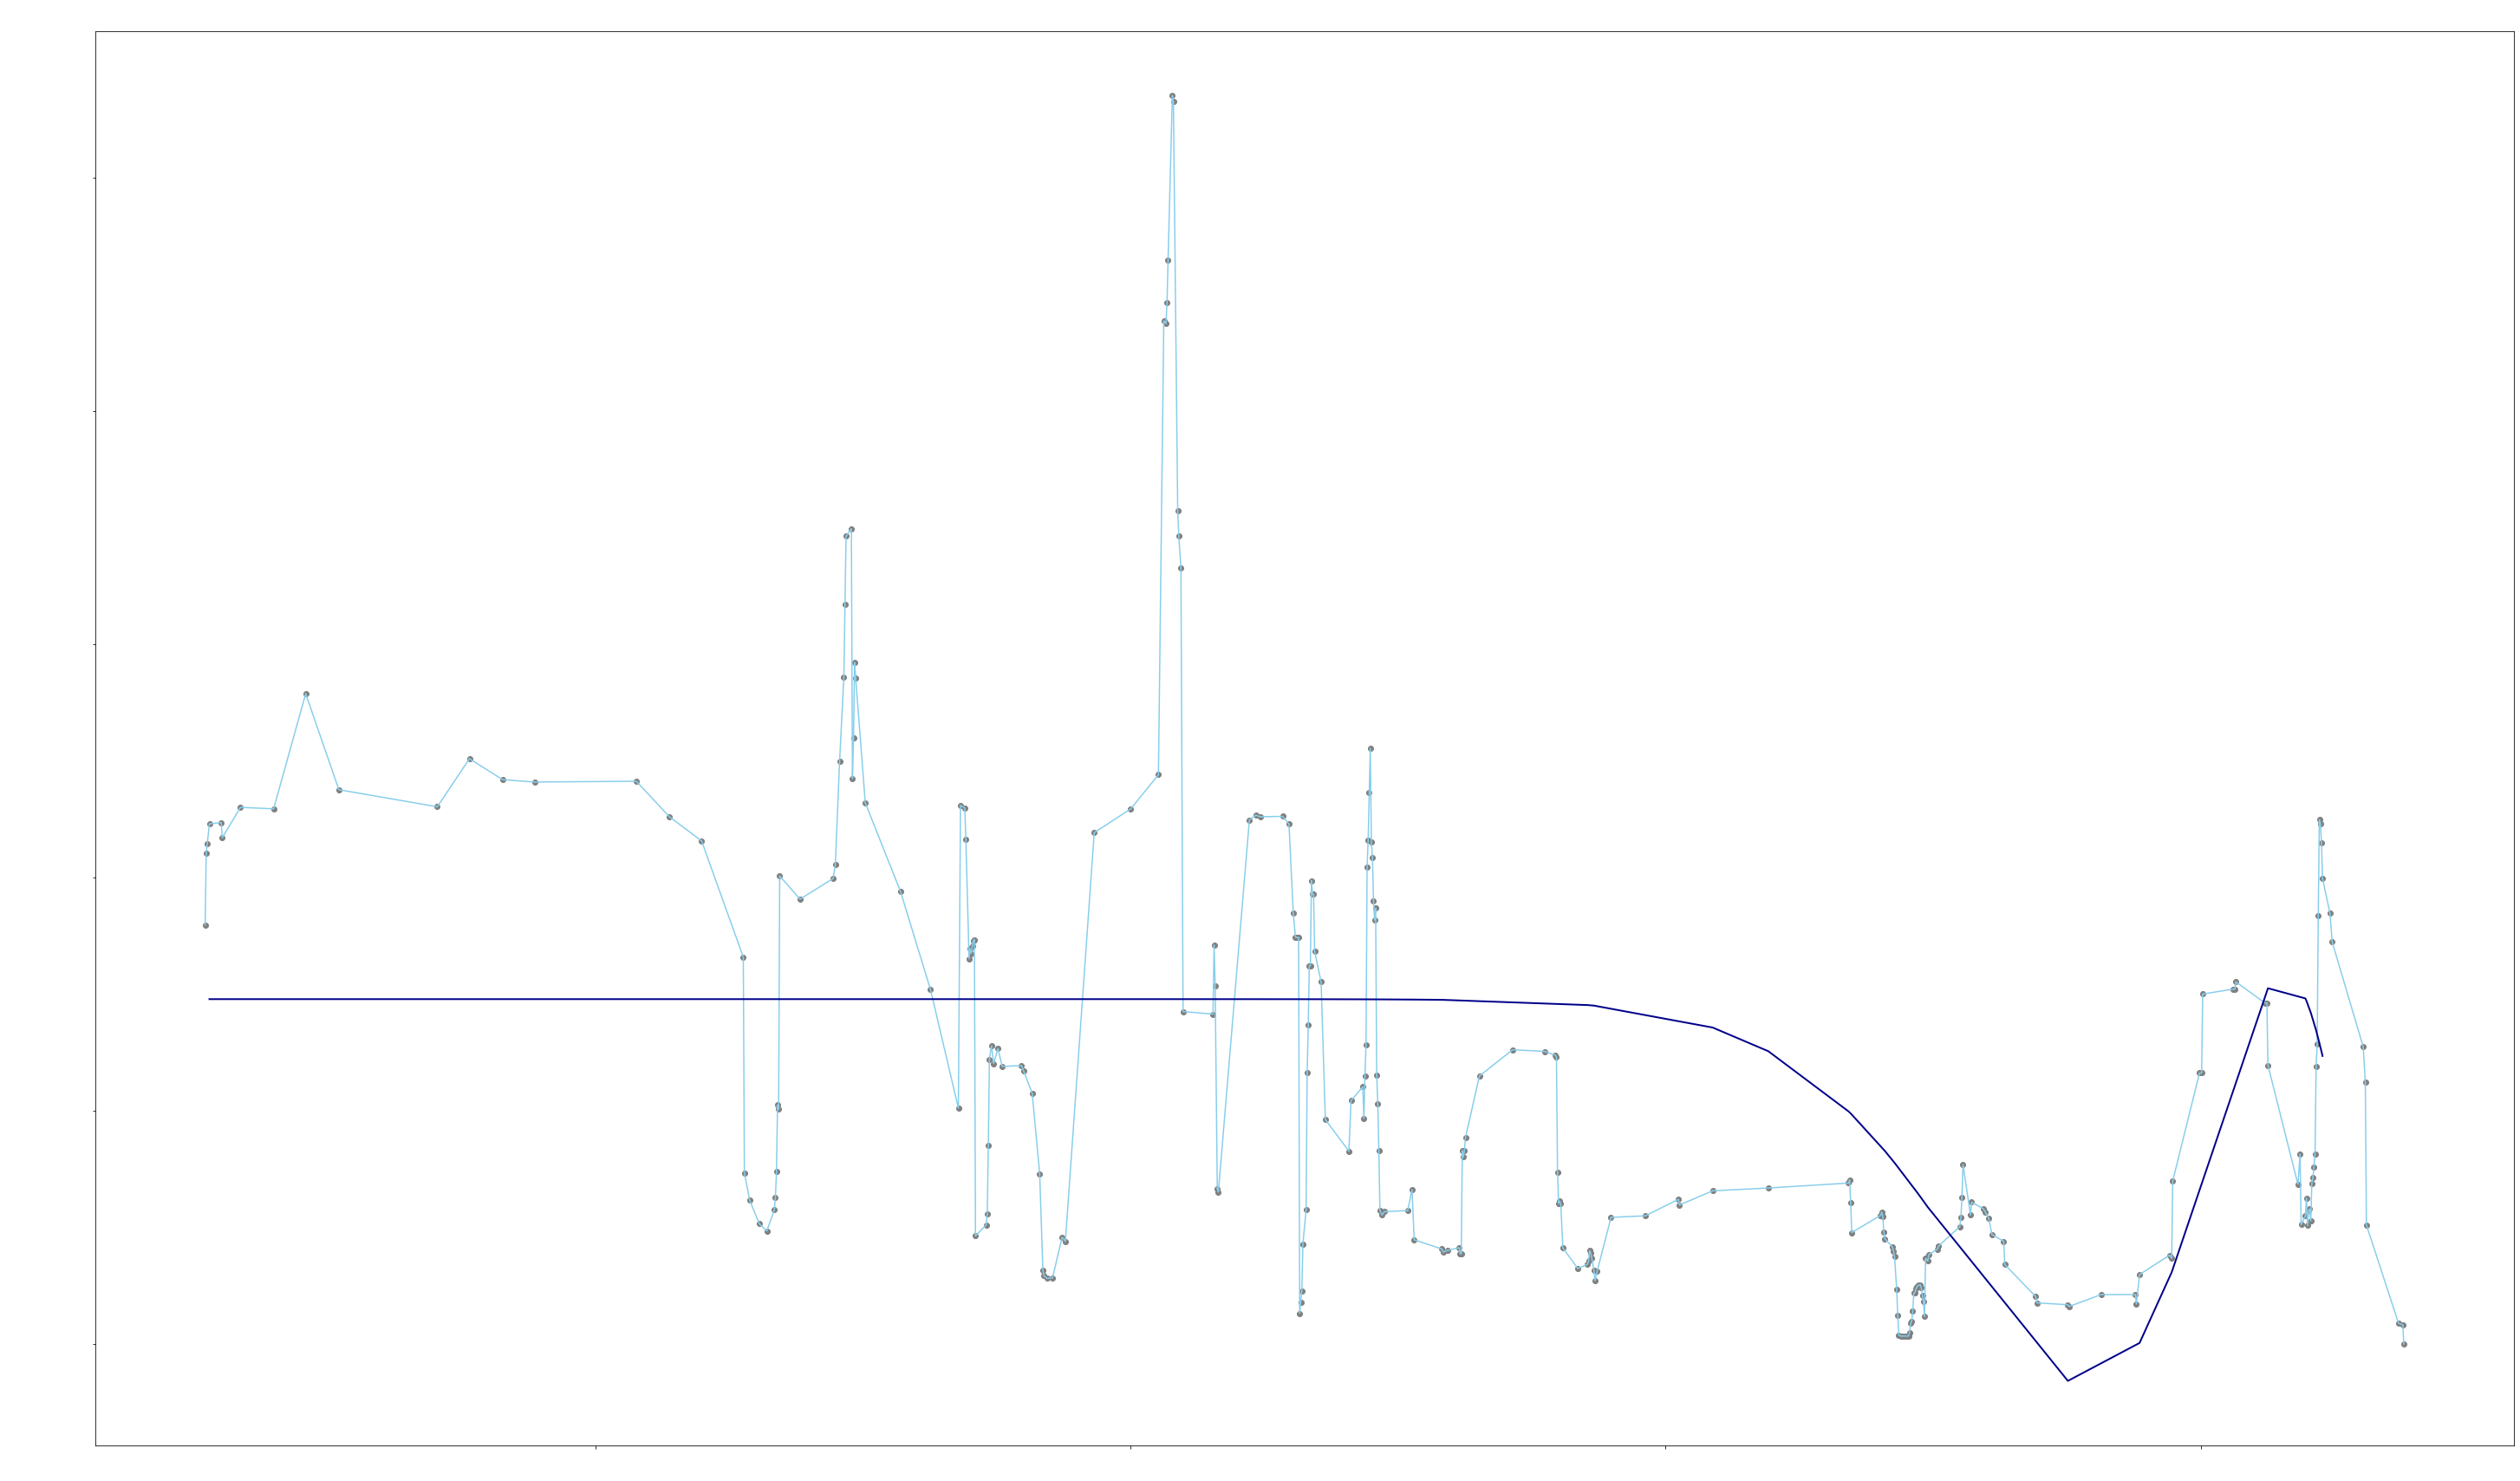

Linear Regressor performance:
Mean absolute error =  9413.67
Mean squared error =  124236033.14
Median absolute error =  8761.35
Explained variance score =  -1.4
R2 score =  -1.41


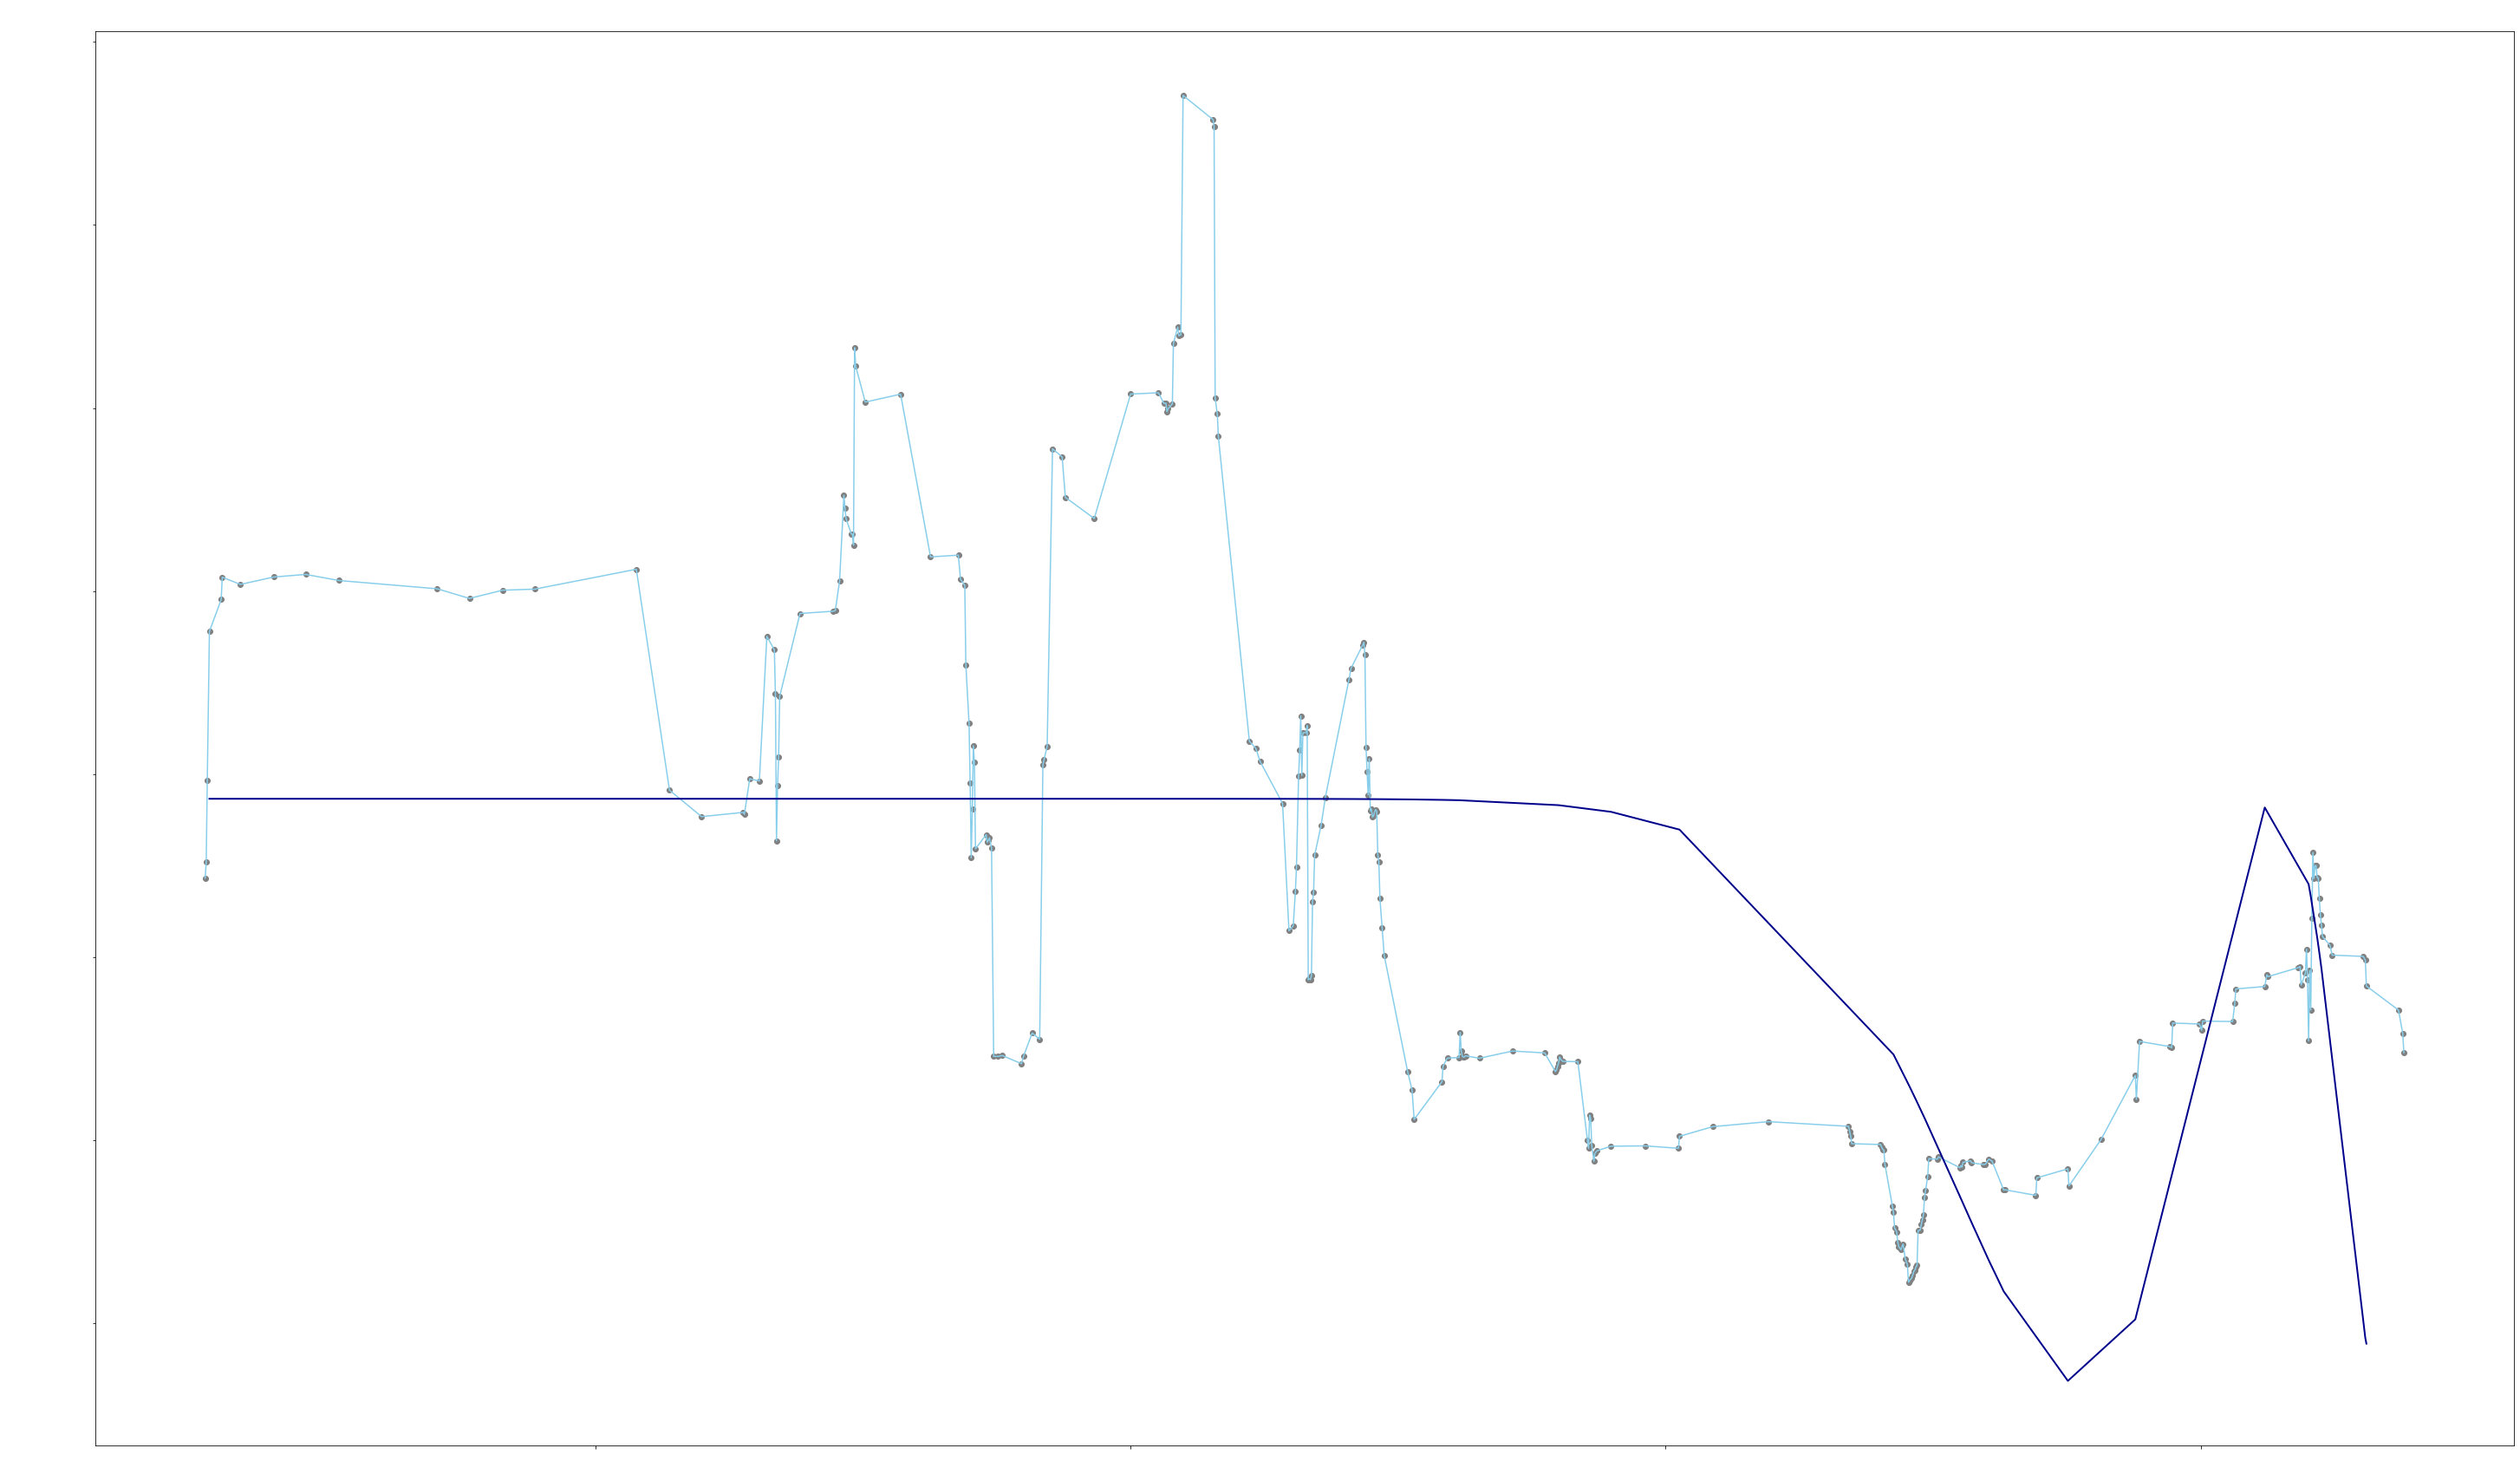

Linear Regressor performance:
Mean absolute error =  6960.64
Mean squared error =  77234510.21
Median absolute error =  6964.21
Explained variance score =  -1.25
R2 score =  -1.29


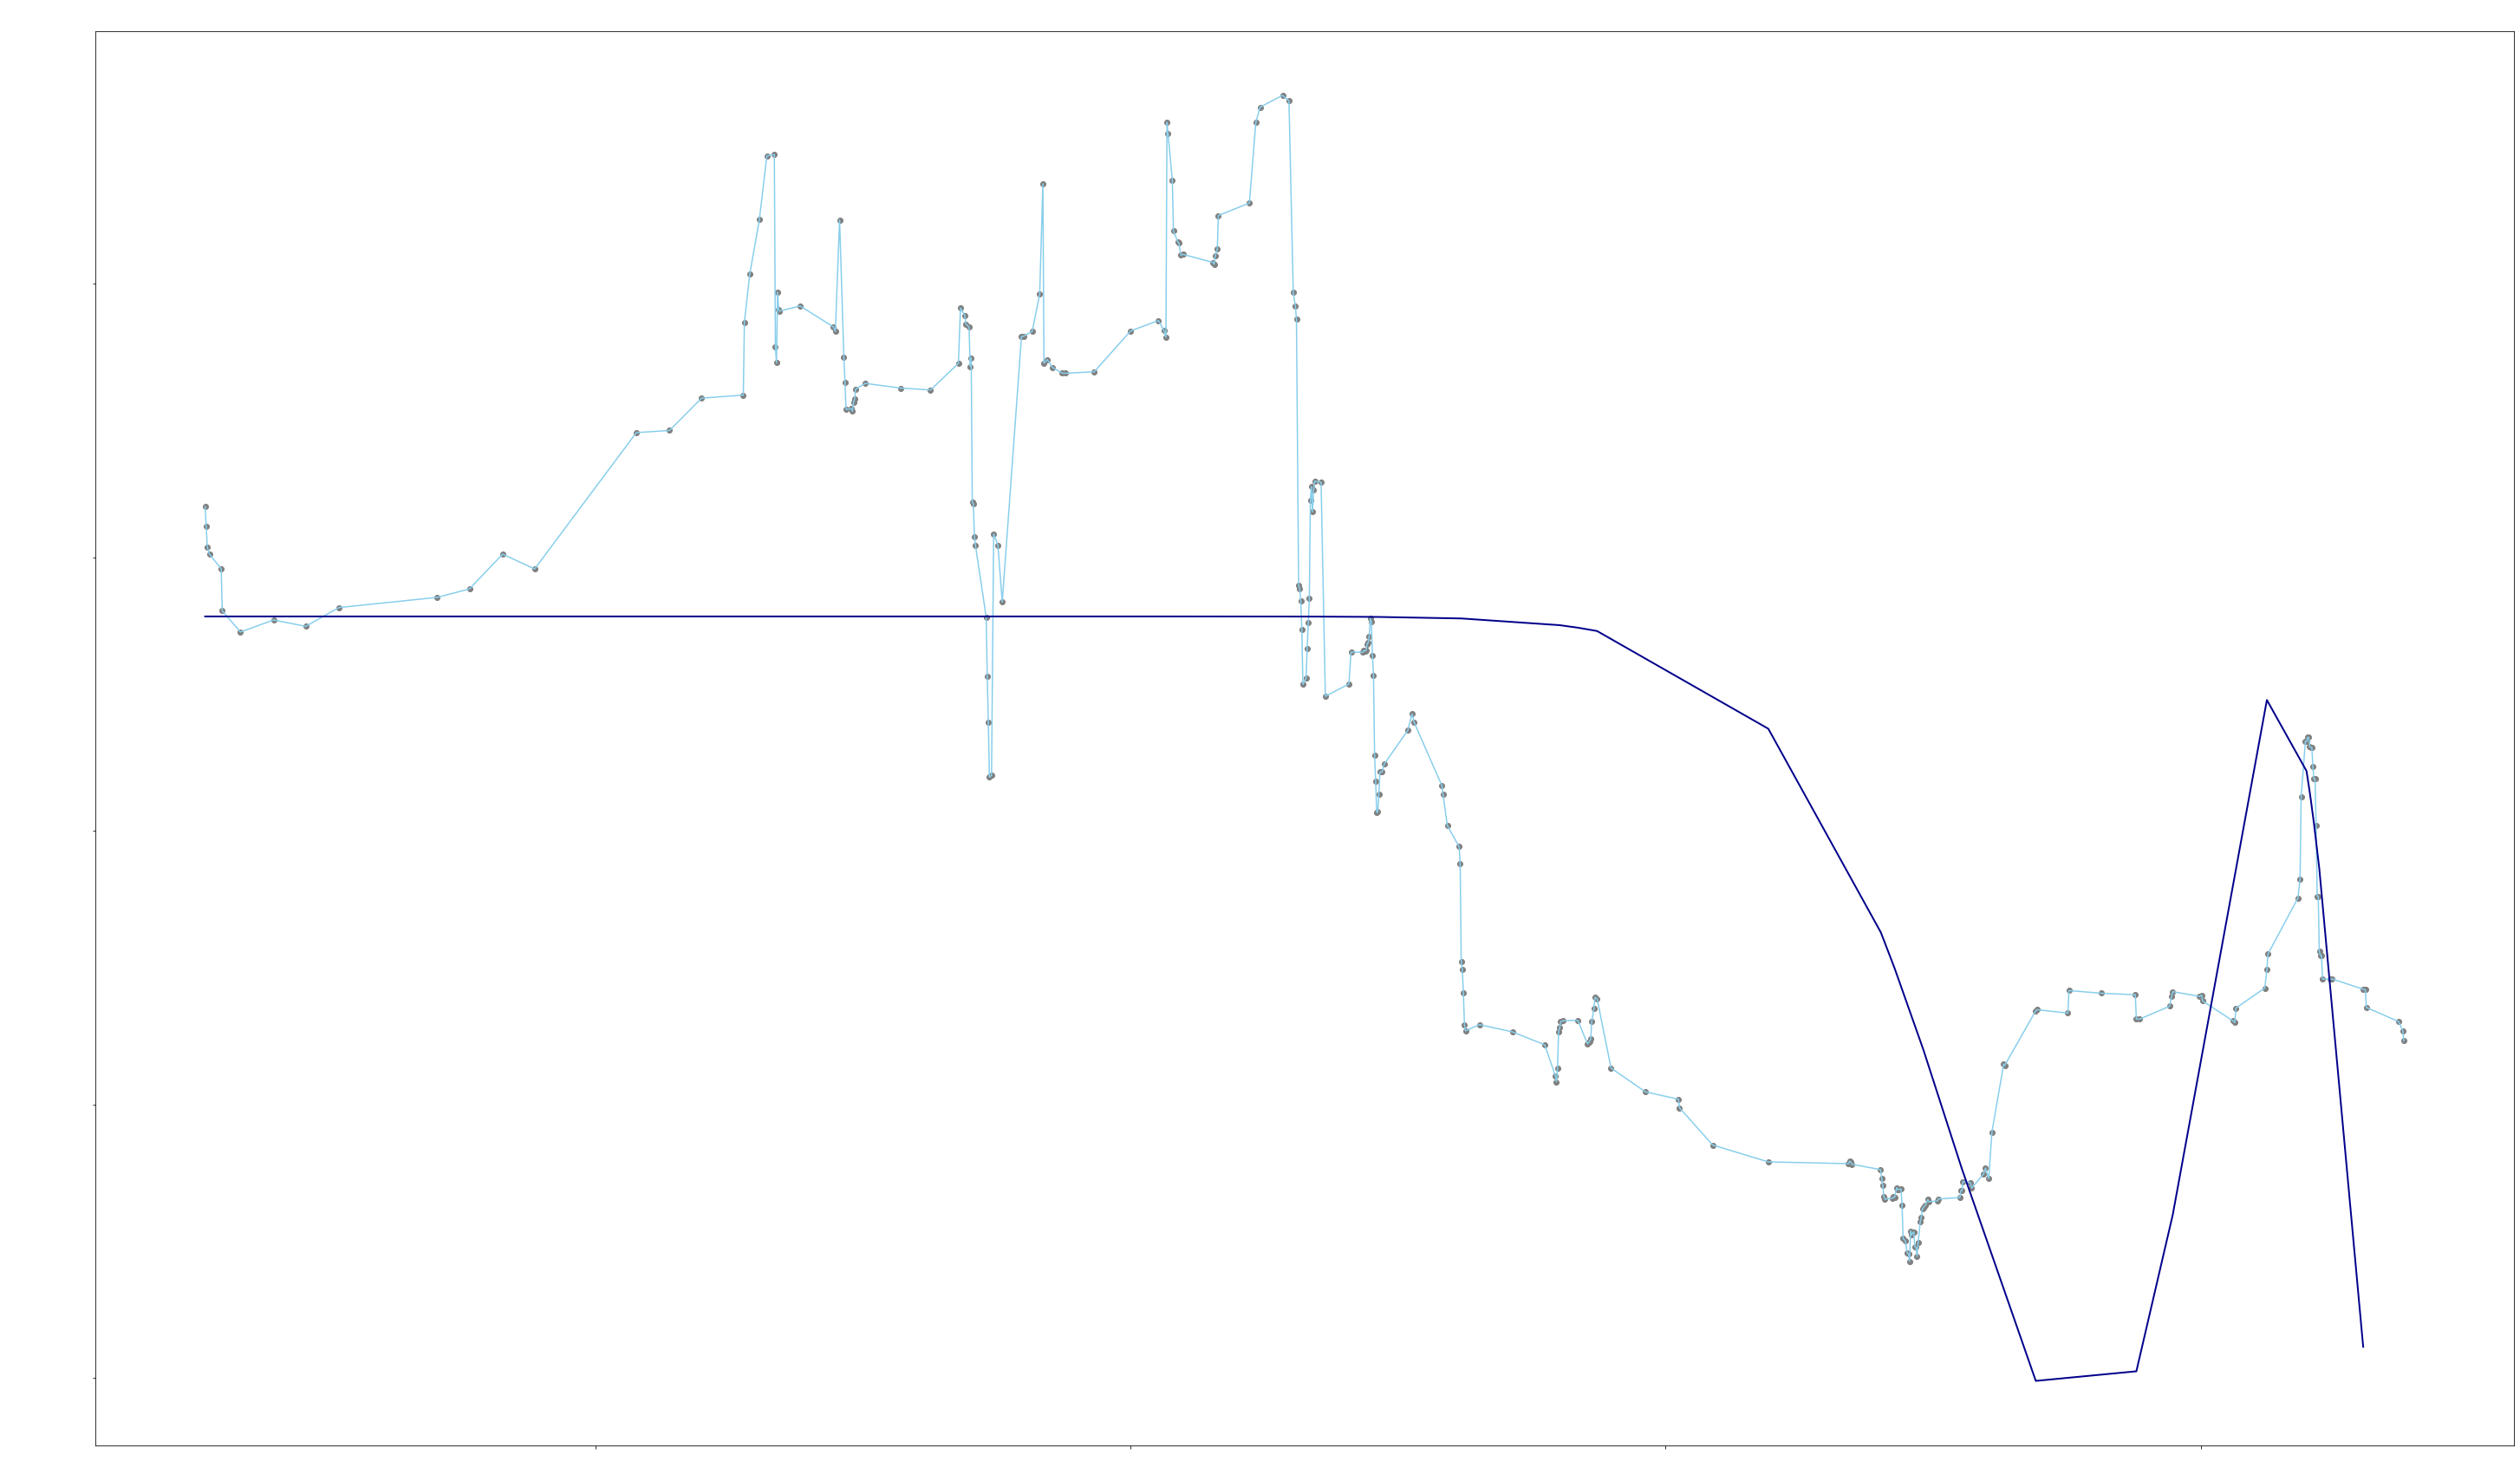

In [0]:
########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_original, y_original, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 30 > ] ##########
polynomial = PolynomialFeatures(degree=30)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 30 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_original, y_original, color='gray')
plt.plot(X_original, y_original, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_9, y_moving_average_9, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 30 > ] ##########
polynomial = PolynomialFeatures(degree=30)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 30 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_9, y_moving_average_9, color='gray')
plt.plot(X_moving_average_9, y_moving_average_9, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_21, y_moving_average_21, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 30 > ] ##########
polynomial = PolynomialFeatures(degree=30)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 30 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_21, y_moving_average_21, color='gray')
plt.plot(X_moving_average_21, y_moving_average_21, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()

########## [SPLITING INTO TRAINING AND TESTING] ##########
X_train, X_test, y_train, y_test = train_test_split (X_moving_average_36, y_moving_average_36, test_size = 0.2)

########## [CONVERTING SERIES INTO ARRAY] ##########
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1,1)

y_train = y_train.to_numpy()

X_test = X_test.sort_values('index')
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

y_test = y_test.sort_values('index')
y_test = y_test.to_numpy()

########## [ DEFINE MODEL AND TRAIN  < Degree = 30 > ] ##########
polynomial = PolynomialFeatures(degree=30)

X_train_transformed_for_poly = polynomial.fit_transform(X_train)

poly_linear_model = linear_model.LinearRegression()

poly_linear_model.fit(X_train_transformed_for_poly, y_train)

########## [ PREDICT < Degree = 30 > ] ##########
X_test_transformed_for_poly = polynomial.fit_transform(X_test)

poly_y_predict = poly_linear_model.predict(X_test_transformed_for_poly)

print("Linear Regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, poly_y_predict), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, poly_y_predict), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, poly_y_predict), 2))
print("Explained variance score = ", round(sm.explained_variance_score(y_test, poly_y_predict), 2))
print("R2 score = ", round(sm.r2_score(y_test, poly_y_predict), 2))

plt.figure(figsize= (50, 30))

plt.title('Count Density', color = 'w', fontsize = '30')

plt.scatter(X_moving_average_36, y_moving_average_36, color='gray')
plt.plot(X_moving_average_36, y_moving_average_36, color='skyblue')
plt.plot(X_test, poly_y_predict, color='darkblue', linewidth = '2')

plt.xticks(color = 'w', fontsize = '15', rotation = 20)
plt.yticks(color = 'w', fontsize = '30')

plt.show()